In [1]:
import os
import sys
import umap.umap_ as umap

import numpy as np
import pandas as pd
import seaborn as sns
import gseapy as gp

from lifelines import KaplanMeierFitter as KM
from lifelines import CoxPHFitter as cox
from matplotlib import pyplot as plt
from pandas import DataFrame as df
from scipy import stats
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib
import matplotlib.font_manager as fm
from matplotlib.ft2font import FT2Font
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def get_font(*args, **kwargs):
    return FT2Font(*args, **kwargs)

fm.get_font = get_font

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import gc
gc.collect()

622

# Global Path

In [3]:
poseidon_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/'
data_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/data/'
gsea_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/GSEA/'
result_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/results/'
panel_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/panels/Figure4/'

In [4]:
gene_sets = {}
with open(gsea_home + '/gene_sets/NREC_REC_91061.gmt', 'r') as f:
    for lines in f:
        lines = lines.rstrip().split('\t')
        gene_sets[lines[0]] = lines[2:]

# Data

In [5]:
# TEC signature infor
TEC_sig = pd.read_csv(poseidon_home + 'EC_signatures/all_NREC_REC_gene_info.csv',
                      index_col=0, header=0, sep=',')

In [6]:
# all shift ability
tmp_shift = []
for c in os.listdir(poseidon_home + 'shift_ability/'):
    # take only compound treatment
    if c.split('.csv')[0].split('_')[-1] == 'cp':
        tmp_shift.append(pd.read_csv(poseidon_home + 'shift_ability/' + c,
                                     index_col=0, header=0, sep=','))
shift_ability = pd.concat(tmp_shift, axis=0)

In [7]:
shift_ability.shape

(41323, 6)

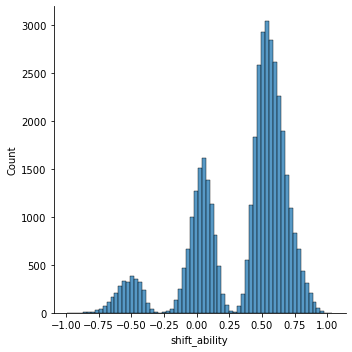

In [8]:
sns.displot(shift_ability['shift_ability'])

In [9]:
shift_S = shift_ability[shift_ability['shift_ability'] >= 0.5]

In [10]:
shift_S.shape

(20174, 6)

In [11]:
shift_S[shift_S['cmap_name'] == 'PF-03758309']

NREC_profile  REC_profile    cmap_name  nearest_dose  \
LJP009_HCC515_24H:D03     -0.380671     0.326676  PF-03758309         1.110   
LJP009_HCC515_24H:D04     -0.322029     0.311327  PF-03758309         0.370   
LJP009_HCC515_24H:D01     -0.326022     0.266973  PF-03758309        10.000   
LJP009_HCC515_24H:D05     -0.331104     0.191921  PF-03758309         0.120   
LJP009_A549_24H:D02       -0.297514     0.213544  PF-03758309         3.330   
REP.A014_HT29_24H:K15     -0.452040     0.363303  PF-03758309         1.110   
REP.A014_HT29_24H:K16     -0.387660     0.348348  PF-03758309         0.370   
REP.A014_HT29_24H:K14     -0.438640     0.288585  PF-03758309         3.330   
REP.A014_HT29_24H:K18     -0.363341     0.293514  PF-03758309         0.040   
LJP009_HT29_24H:D01       -0.324770     0.292656  PF-03758309        10.000   
REP.A014_HT29_24H:K13     -0.438454     0.169966  PF-03758309        10.000   
LJP009_HT29_24H:D03       -0.355668     0.189521  PF-03758309         1.110   
REP.A014_HT29_24H:K17     -0.290121     0.250869  PF-03758309         0.125   
REP.B014_PC3_24H:K15      -0.420736     0.422244  PF-03758309         0.250   
REP.A014_PC3_24H:K15      -0.431607     0.365444  PF-03758309         1.110   
REP.B014_PC3_24H:K13      -0.460567     0.336289  PF-03758309         2.220   
MOAR004_PC3_24H:A17       -0.434371     0.348243  PF-03758309         3.330   
REP.A014_PC3_24H:K17      -0.357591     0.421356  PF-03758309         0.125   
REP.A014_PC3_24H:K14      -0.425009     0.295455  PF-03758309         3.330   
LJP009_PC3_24H:D04        -0.395044     0.319514  PF-03758309         0.370   
REP.A014_PC3_24H:K16      -0.395617     0.315590  PF-03758309         0.370   
REP.B014_PC3_24H:K16      -0.329227     0.335428  PF-03758309         0.080   
REP.B014_PC3_24H:K14      -0.364589     0.285700  PF-03758309         0.740   
LJP009_PC3_24H:D05        -0.393374     0.247948  PF-03758309         0.120   
LJP009_PC3_24H:D02        -0.421273     0.218771  PF-03758309         3.330   
MOAR004_PC3_24H:A18       -0.413250     0.220005  PF-03758309         1.110   
LJP009_PC3_24H:D03        -0.380927     0.248709  PF-03758309         1.110   
REP.A014_PC3_24H:K13      -0.336802     0.270371  PF-03758309        10.000   
LJP009_PC3_24H:D06        -0.382378     0.196939  PF-03758309         0.040   
LJP009_PC3_24H:D01        -0.295718     0.228531  PF-03758309        10.000   
MOAR004_PC3_24H:A16       -0.299140     0.208117  PF-03758309        10.000   
REP.A014_MCF7_24H:K17     -0.395146     0.395726  PF-03758309         0.125   
REP.A014_MCF7_24H:K15     -0.361099     0.288309  PF-03758309         1.110   
REP.B014_MCF7_24H:K13     -0.266355     0.308703  PF-03758309         2.220   
REP.B014_MCF7_24H:K16     -0.265991     0.307735  PF-03758309         0.080   
REP.A014_MCF7_24H:K13     -0.298327     0.273402  PF-03758309        10.000   
REP.A014_YAPC_24H:K14     -0.416973     0.307990  PF-03758309         3.330   
REP.B014_YAPC_24H:K13     -0.343930     0.365076  PF-03758309         2.220   
REP.A014_YAPC_24H:K15     -0.322686     0.275980  PF-03758309         1.110   
REP.A014_YAPC_24H:K16     -0.319973     0.263194  PF-03758309         0.370   
REP.A014_YAPC_24H:K18     -0.240079     0.273944  PF-03758309         0.040   
LJP009_A375_24H:D02       -0.434837     0.357698  PF-03758309         3.330   
MOAR004_A375_24H:A17      -0.489876     0.297044  PF-03758309         3.330   
MOAR004_A375_24H:A18      -0.414818     0.371590  PF-03758309         1.110   
REP.A014_A375_24H:K13     -0.413312     0.301818  PF-03758309        10.000   
MOAR004_A375_24H:A16      -0.398530     0.288550  PF-03758309        10.000   
REP.A014_A375_24H:K14     -0.345250     0.294714  PF-03758309         3.330   
REP.B014_A375_24H:K13     -0.332397     0.225545  PF-03758309         2.220   
REP.B014_A375_24H:K14     -0.345681     0.201222  PF-03758309         0.740   
REP.A014_A375_24H:K16     -0.251660     0.292566  PF-03758309         0.3

In [12]:
sig_info = pd.read_csv(data_home + 'CMAP2020_Cancer/siginfo_beta.txt',
                       header=0, index_col='sig_id', sep='\t')

/home/dyang-server/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,3,4,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
shift_S['cell_line'] = sig_info['cell_iname']

<ipython-input-13-6e6990ae3d74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shift_S['cell_line'] = sig_info['cell_iname']


# Embedding the perturbations to a low dimensional space

In [14]:
# list all pre-rank list
pre_rank_path = os.listdir(gsea_home)
pre_rank_path_direct = {}
for f in pre_rank_path:
    if f not in ['gene_sets', 'NREC_REC_enrichment', 'SKCM_v2']:
        tmp_list = os.listdir(gsea_home + f)
        for t in tmp_list:
            if t in ['trt_cp', 'trt_sh']:
                tmp_pr_list = os.listdir(gsea_home + f + '/' + t)
                for s in tmp_pr_list:
                    pre_rank_path_direct[s] = gsea_home + f + '/' + t + '/' + s

In [15]:
ec_bing_list = []
for p in shift_S.index:
    p_rename = '__'.join(p.split(':'))
    tmp_p = pd.read_csv(pre_rank_path_direct[p_rename + '.rnk'], header=None, index_col=0, sep='\t')
    tmp_p = tmp_p.rename(columns={1: p})
    ec_bing_list.append(tmp_p)
ec_bing_matrix = pd.concat(ec_bing_list, axis=1)

In [ ]:
ec_bing_matrix.shape

In [614]:
ec_bing_matrix.to_csv(data_home + 'lv5_shift_S_0.7_matrix.csv', sep=',')

In [14]:
ec_bing_matrix = pd.read_csv(data_home + 'lv5_shift_S_0.5_matrix.csv',
                             header=0, index_col=0, sep=',')

In [16]:
ec_bing_matrix_hi = pd.read_csv(data_home + 'lv5_shift_S_0.7_matrix.csv',
                                header=0, index_col=0, sep=',')

In [17]:
shift_S['CXCL10'] = ec_bing_matrix.T['CXCL10']

<ipython-input-17-df8358e218ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shift_S['CXCL10'] = ec_bing_matrix.T['CXCL10']


In [18]:
shift_S[shift_S['cmap_name'] == 'PF-03758309']

NREC_profile  REC_profile    cmap_name  nearest_dose  \
LJP009_HCC515_24H:D03     -0.380671     0.326676  PF-03758309         1.110   
LJP009_HCC515_24H:D04     -0.322029     0.311327  PF-03758309         0.370   
LJP009_HCC515_24H:D01     -0.326022     0.266973  PF-03758309        10.000   
LJP009_HCC515_24H:D05     -0.331104     0.191921  PF-03758309         0.120   
LJP009_A549_24H:D02       -0.297514     0.213544  PF-03758309         3.330   
REP.A014_HT29_24H:K15     -0.452040     0.363303  PF-03758309         1.110   
REP.A014_HT29_24H:K16     -0.387660     0.348348  PF-03758309         0.370   
REP.A014_HT29_24H:K14     -0.438640     0.288585  PF-03758309         3.330   
REP.A014_HT29_24H:K18     -0.363341     0.293514  PF-03758309         0.040   
LJP009_HT29_24H:D01       -0.324770     0.292656  PF-03758309        10.000   
REP.A014_HT29_24H:K13     -0.438454     0.169966  PF-03758309        10.000   
LJP009_HT29_24H:D03       -0.355668     0.189521  PF-03758309         1.110   
REP.A014_HT29_24H:K17     -0.290121     0.250869  PF-03758309         0.125   
REP.B014_PC3_24H:K15      -0.420736     0.422244  PF-03758309         0.250   
REP.A014_PC3_24H:K15      -0.431607     0.365444  PF-03758309         1.110   
REP.B014_PC3_24H:K13      -0.460567     0.336289  PF-03758309         2.220   
MOAR004_PC3_24H:A17       -0.434371     0.348243  PF-03758309         3.330   
REP.A014_PC3_24H:K17      -0.357591     0.421356  PF-03758309         0.125   
REP.A014_PC3_24H:K14      -0.425009     0.295455  PF-03758309         3.330   
LJP009_PC3_24H:D04        -0.395044     0.319514  PF-03758309         0.370   
REP.A014_PC3_24H:K16      -0.395617     0.315590  PF-03758309         0.370   
REP.B014_PC3_24H:K16      -0.329227     0.335428  PF-03758309         0.080   
REP.B014_PC3_24H:K14      -0.364589     0.285700  PF-03758309         0.740   
LJP009_PC3_24H:D05        -0.393374     0.247948  PF-03758309         0.120   
LJP009_PC3_24H:D02        -0.421273     0.218771  PF-03758309         3.330   
MOAR004_PC3_24H:A18       -0.413250     0.220005  PF-03758309         1.110   
LJP009_PC3_24H:D03        -0.380927     0.248709  PF-03758309         1.110   
REP.A014_PC3_24H:K13      -0.336802     0.270371  PF-03758309        10.000   
LJP009_PC3_24H:D06        -0.382378     0.196939  PF-03758309         0.040   
LJP009_PC3_24H:D01        -0.295718     0.228531  PF-03758309        10.000   
MOAR004_PC3_24H:A16       -0.299140     0.208117  PF-03758309        10.000   
REP.A014_MCF7_24H:K17     -0.395146     0.395726  PF-03758309         0.125   
REP.A014_MCF7_24H:K15     -0.361099     0.288309  PF-03758309         1.110   
REP.B014_MCF7_24H:K13     -0.266355     0.308703  PF-03758309         2.220   
REP.B014_MCF7_24H:K16     -0.265991     0.307735  PF-03758309         0.080   
REP.A014_MCF7_24H:K13     -0.298327     0.273402  PF-03758309        10.000   
REP.A014_YAPC_24H:K14     -0.416973     0.307990  PF-03758309         3.330   
REP.B014_YAPC_24H:K13     -0.343930     0.365076  PF-03758309         2.220   
REP.A014_YAPC_24H:K15     -0.322686     0.275980  PF-03758309         1.110   
REP.A014_YAPC_24H:K16     -0.319973     0.263194  PF-03758309         0.370   
REP.A014_YAPC_24H:K18     -0.240079     0.273944  PF-03758309         0.040   
LJP009_A375_24H:D02       -0.434837     0.357698  PF-03758309         3.330   
MOAR004_A375_24H:A17      -0.489876     0.297044  PF-03758309         3.330   
MOAR004_A375_24H:A18      -0.414818     0.371590  PF-03758309         1.110   
REP.A014_A375_24H:K13     -0.413312     0.301818  PF-03758309        10.000   
MOAR004_A375_24H:A16      -0.398530     0.288550  PF-03758309        10.000   
REP.A014_A375_24H:K14     -0.345250     0.294714  PF-03758309         3.330   
REP.B014_A375_24H:K13     -0.332397     0.225545  PF-03758309         2.220   
REP.B014_A375_24H:K14     -0.345681     0.201222  PF-03758309         0.740   
REP.A014_A375_24H:K16     -0.251660     0.292566  PF-03758309         0.3

## 0. PCA

In [691]:
scaler = MinMaxScaler()
scaler.fit(ec_bing_matrix.T)
ec_bing_scaled = df(scaler.transform(ec_bing_matrix.T), index=ec_bing_matrix.columns, columns=ec_bing_matrix.index)

In [692]:
pca_fit = PCA(n_components=15, random_state=0)
ec_bing_pca = df(pca_fit.fit_transform(ec_bing_scaled), columns=[i for i in range(15)], index=ec_bing_scaled.index)

In [693]:
ec_bing_pca

0         1         2   \
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10 -3.266026 -2.292598 -0.680945   
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10 -2.001533 -2.011815 -1.283384   
CPC006_RMUGS_6H:H17                       -4.516359  0.442746  0.166866   
CPC006_EFO27_6H:BRD-K15025317-001-05-2:10  1.971787  1.959827 -2.467846   
CPC006_EFO27_6H:BRD-K64890080-001-03-9:10 -1.387606 -0.411767  0.235487   
...                                             ...       ...       ...   
REP.B001_HELA_24H:O03                      7.026695 -6.066587  1.405591   
REP.A022_HELA_24H:C21                      1.879578 -6.932534 -0.501561   
REP.A016_HELA_24H:C23                      3.974436 -6.295216 -0.128841   
REP.A003_HELA_24H:C20                      8.734420 -6.321933  0.870445   
REP.B016_HELA_24H:K07                      2.300425 -5.369189 -0.033204   

                                                 3         4         5   \
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10 -1.402833  0.424278  1.500577   
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10 -0.996926  1.336910  0.507697   
CPC006_RMUGS_6H:H17                       -2.082681 -0.732243 -1.279850   
CPC006_EFO27_6H:BRD-K15025317-001-05-2:10 -0.860200  0.363463 -0.728255   
CPC006_EFO27_6H:BRD-K64890080-001-03-9:10 -1.472882  0.564674 -1.464788   
...                                             ...       ...       ...   
REP.B001_HELA_24H:O03                      0.204126 -2.339421  3.296830   
REP.A022_HELA_24H:C21                     -1.077746 -2.009456  2.971082   
REP.A016_HELA_24H:C23                      0.179730 -0.982145  1.991504   
REP.A003_HELA_24H:C20                      0.305730 -1.947780  2.254901   
REP.B016_HELA_24H:K07                     -0.297520 -1.180938  1.813401   

                                                 6         7         8   \
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10 -1.561000 -1.523889 -0.152635   
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10  1.213092 -0.810211 -1.014779   
CPC006_RMUGS_6H:H17                       -0.916783 -0.745195  0.713691   
CPC006_EFO27_6H:BRD-K15025317-001-05-2:10  1.184416  0.282323 -0.555101   
CPC006_EFO27_6H:BRD-K64890080-001-03-9:10 -0.868771 -0.571018 -1.004076   
...                                             ...       ...       ...   
REP.B001_HELA_24H:O03                      1.538731  1.434015 -0.118279   
REP.A022_HELA_24H:C21                      0.220927  0.709396 -0.694109   
REP.A016_HELA_24H:C23                      0.226066  0.102271 -1.040398   
REP.A003_HELA_24H:C20                      0.955117  0.302759  0.284189   
REP.B016_HELA_24H:K07                      0.059980  1.237966 -0.943526   

                                                 9         10        11  \
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10 -0.569771  1.583246  0.235443   
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10 -0.490783  0.004030  2.154668   
CPC006_RMUGS_6H:H17                       -0.150931  1.890860 -0.605238   
CPC006_EFO27_6H:BRD-K15025317-001-05-2:10  0.441735  0.004851 -0.074150   
CPC006_EFO27_6H:BRD-K64890080-001-03-9:10  0.554468  1.199919 -0.259174   
...                                             ...       ...       ...   
REP.B001_HELA_24H:O03                      2.236565 -0.559410 -1.846058   
REP.A022_HELA_24H:C21                      0.914362 -1.020844 -0.777201   
REP.A016_HELA_24H:C23                      0.519796 -1.102372 -2.135280   
REP.A003_HELA_24H:C20                      2.451007  0.417700 -2.350950   
REP.B016_HELA_24H:K07                     -0.112706 -0.961626 -2.039321   

                                                 12        13        14  
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10 -1.190340 -0.902341  0.027410  
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10  1.525418  1.178949  1.376613  
CPC006_RMUGS_6H:H17                       -0.573352  0.015836  0.058370  
CPC006_EFO27_6H:BRD-K15025317-001-05-2:10  0.259824  0.304893  0.489603  
CPC006_EFO27_6H:BRD-K64890080-001-03-9:10 -0.369793  0.178952 -0.510439  
.

In [694]:
def color_scatter_drug(x_feature, y_feature, hue_feature, data, vmin, vmax, drug=None):
    fig, ax = plt.subplots(figsize=(5, 5))
    if drug is not None:
        ax.scatter(x=x_feature, y=y_feature,
                   alpha=0.5, s=5,
                   c=hue_feature, cmap='seismic',
                   vmin=vmin, vmax=vmax,
                   data=data[data['drug_name'] == drug])
    else:
        ax.scatter(x=x_feature, y=y_feature,
                   alpha=0.5, s=5, c=hue_feature,
                   cmap='seismic', vmin=vmin, vmax=vmax,
                   data=data)
    plt.xlim(0, 1)
    plt.ylim(0, 1)

## 1. TSNE

In [695]:
tsne_fit = TSNE(n_components=2, perplexity=50,
                early_exaggeration=10, n_jobs=16,
                random_state=0, init='random',
                learning_rate='auto', n_iter=1000,
                n_iter_without_progress=300)
ec_bing_tsne = df(tsne_fit.fit_transform(ec_bing_pca), index=ec_bing_matrix.columns, columns=['TSNE-1', 'TSNE-2'])

In [696]:
scaler = MinMaxScaler()
scaler.fit(ec_bing_tsne)
ec_bing_tsne_scaled = df(scaler.transform(ec_bing_tsne), index=ec_bing_tsne.index, columns=ec_bing_tsne.columns)

In [718]:
ec_bing_tsne_scaled['shift_ability'] = shift_ability['shift_ability']
ec_bing_tsne_scaled['CXCL10'] = ec_bing_matrix.T['CXCL10']
ec_bing_tsne_scaled['drug_name'] = shift_ability['cmap_name']

<AxesSubplot:xlabel='TSNE-1', ylabel='TSNE-2'>

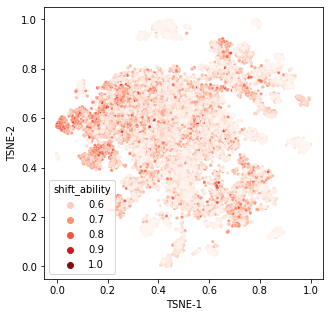

In [719]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='TSNE-1', y='TSNE-2',
                alpha=0.8, s=10,
                hue='shift_ability', palette='Reds',
                data=ec_bing_tsne_scaled)

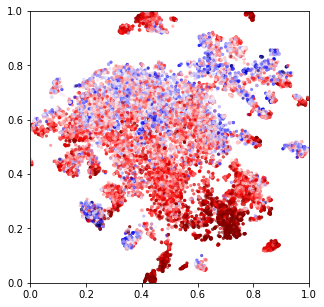

In [720]:
color_scatter_drug(x_feature='TSNE-1', y_feature='TSNE-2', hue_feature='CXCL10',
                   vmin=-3., vmax=3., drug=None, data=ec_bing_tsne_scaled)

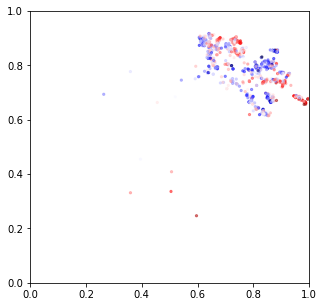

In [721]:
color_scatter_drug(x_feature='TSNE-1', y_feature='TSNE-2', hue_feature='CXCL10',
                   vmin=-3., vmax=3., drug='vorinostat', data=ec_bing_tsne_scaled)

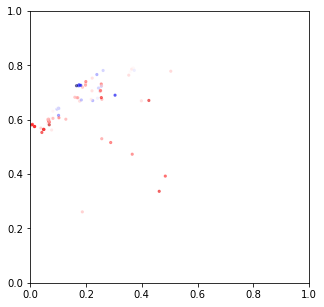

In [722]:
color_scatter_drug(x_feature='TSNE-1', y_feature='TSNE-2', hue_feature='CXCL10',
                   vmin=-3., vmax=3., drug='selumetinib', data=ec_bing_tsne_scaled)

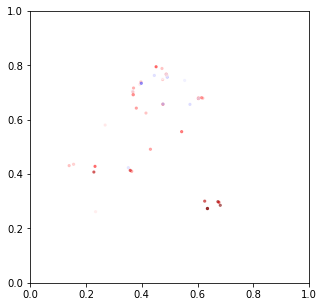

In [723]:
color_scatter_drug(x_feature='TSNE-1', y_feature='TSNE-2', hue_feature='CXCL10',
                   vmin=-3., vmax=3., drug='PF-03758309', data=ec_bing_tsne_scaled)

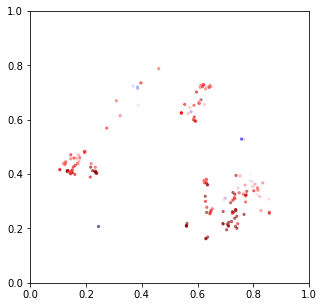

In [724]:
color_scatter_drug(x_feature='TSNE-1', y_feature='TSNE-2', hue_feature='CXCL10',
                   vmin=-3., vmax=3., drug='doxorubicin', data=ec_bing_tsne_scaled)

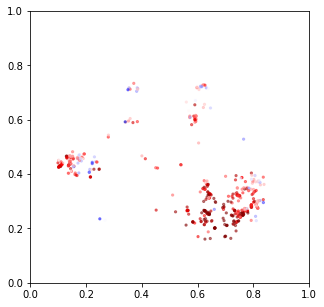

In [725]:
color_scatter_drug(x_feature='TSNE-1', y_feature='TSNE-2', hue_feature='CXCL10',
                   vmin=-3., vmax=3., drug='mitoxantrone', data=ec_bing_tsne_scaled)

## 2. UMAP

<AxesSubplot:xlabel='UMAP-1', ylabel='UMAP-2'>

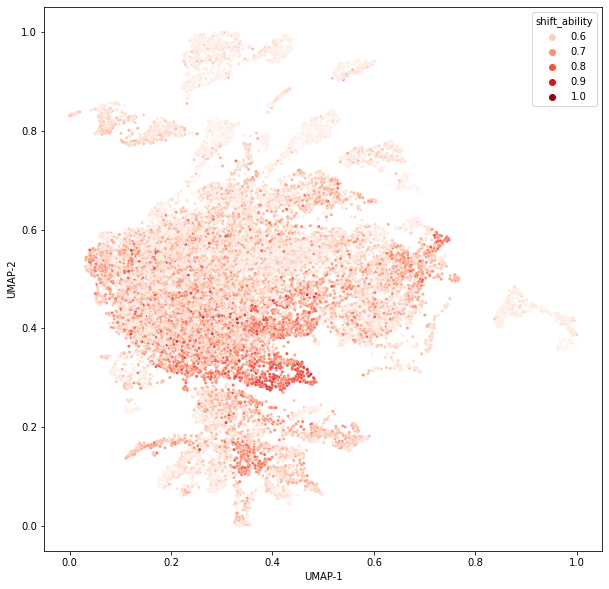

In [747]:
umap_fit = umap.UMAP(n_components=2, n_jobs=16, n_neighbors=10, metric='minkowski', min_dist=0.5)
ec_bing_umap = df(umap_fit.fit_transform(ec_bing_pca), index=ec_bing_matrix.columns, columns=['UMAP-1', 'UMAP-2'])

scaler = MinMaxScaler()
scaler.fit(ec_bing_umap)
ec_bing_umap_scaled = df(scaler.transform(ec_bing_umap), index=ec_bing_umap.index, columns=ec_bing_umap.columns)

ec_bing_umap_scaled['shift_ability'] = shift_ability['shift_ability']
ec_bing_umap_scaled['CXCL10'] = ec_bing_matrix.T['CXCL10']
ec_bing_umap_scaled['drug_name'] = shift_ability['cmap_name']

plt.figure(figsize=(10, 10))
sns.scatterplot(x='UMAP-1', y='UMAP-2',
                alpha=0.8, s=10,
                hue='shift_ability', palette='Reds',
                data=ec_bing_umap_scaled)

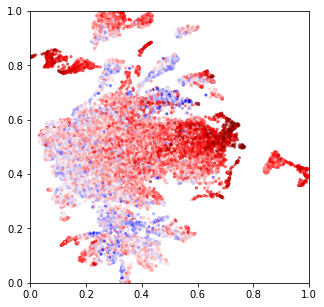

In [748]:
color_scatter_drug(x_feature='UMAP-1', y_feature='UMAP-2', hue_feature='CXCL10',
                   vmin=-5., vmax=5., drug=None, data=ec_bing_umap_scaled)

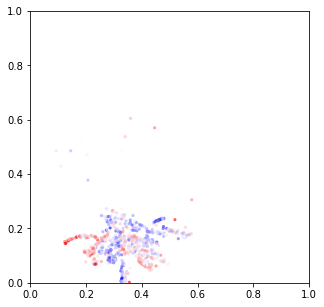

In [749]:
color_scatter_drug(x_feature='UMAP-1', y_feature='UMAP-2', hue_feature='CXCL10',
                   vmin=-5., vmax=5., drug='vorinostat', data=ec_bing_umap_scaled)

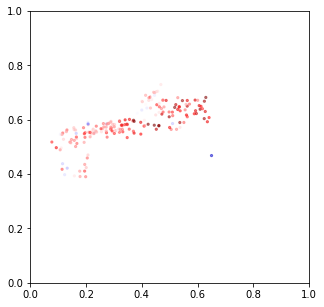

In [739]:
color_scatter_drug(x_feature='UMAP-1', y_feature='UMAP-2', hue_feature='CXCL10',
                   vmin=-5., vmax=5., drug='doxorubicin', data=ec_bing_umap_scaled)

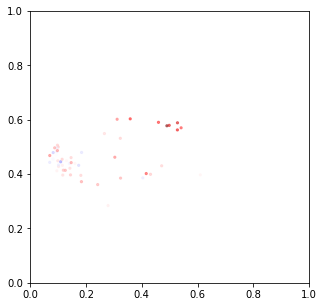

In [740]:
color_scatter_drug(x_feature='UMAP-1', y_feature='UMAP-2', hue_feature='CXCL10',
                   vmin=-5., vmax=5., drug='PF-03758309', data=ec_bing_umap_scaled)

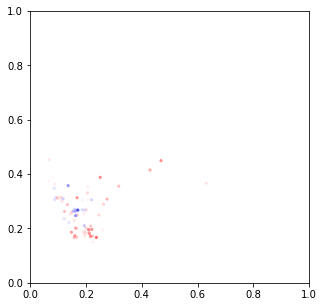

In [741]:
color_scatter_drug(x_feature='UMAP-1', y_feature='UMAP-2', hue_feature='CXCL10',
                   vmin=-5., vmax=5., drug='selumetinib', data=ec_bing_umap_scaled)

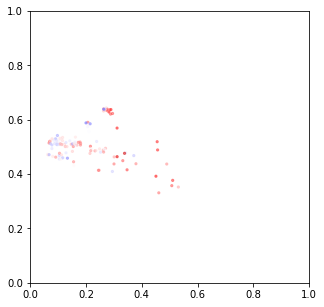

In [742]:
color_scatter_drug(x_feature='UMAP-1', y_feature='UMAP-2', hue_feature='CXCL10',
                   vmin=-5., vmax=5., drug='gemcitabine', data=ec_bing_umap_scaled)

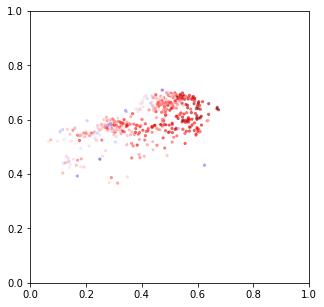

In [743]:
color_scatter_drug(x_feature='UMAP-1', y_feature='UMAP-2', hue_feature='CXCL10',
                   vmin=-5., vmax=5., drug='mitoxantrone', data=ec_bing_umap_scaled)

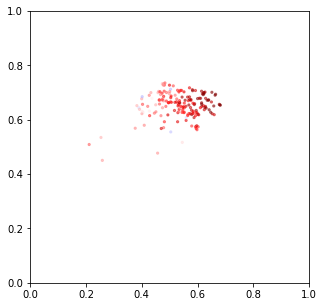

In [744]:
color_scatter_drug(x_feature='UMAP-1', y_feature='UMAP-2', hue_feature='CXCL10',
                   vmin=-5., vmax=5., drug='alvocidib', data=ec_bing_umap_scaled)

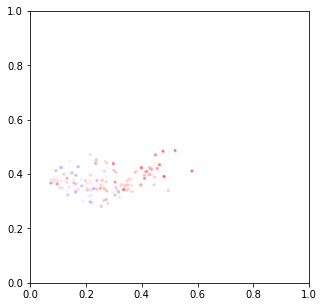

In [745]:
color_scatter_drug(x_feature='UMAP-1', y_feature='UMAP-2', hue_feature='CXCL10',
                   vmin=-5., vmax=5., drug='sirolimus', data=ec_bing_umap_scaled)

## 3. DBSCAN on UMAP

<AxesSubplot:xlabel='UMAP-1', ylabel='UMAP-2'>

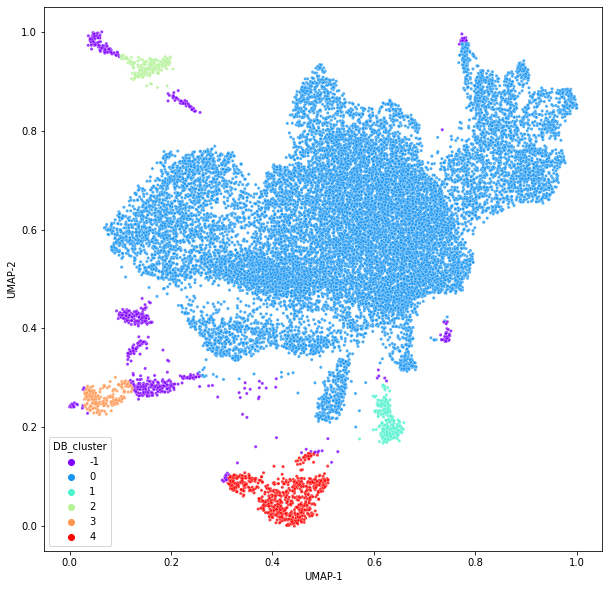

In [587]:
from sklearn.cluster import DBSCAN
db_cluster = DBSCAN(eps=.95, min_samples=200,
                    metric='euclidean', algorithm='ball_tree',
                    leaf_size=20, n_jobs=16).fit(ec_bing_umap[['UMAP-1', 'UMAP-2']])
db_label = df(db_cluster.labels_, index=ec_bing_umap.index, columns=['DB_cluster'])
db_label['UMAP-1'] = ec_bing_umap_scaled['UMAP-1']
db_label['UMAP-2'] = ec_bing_umap_scaled['UMAP-2']

# visualize
plt.figure(figsize=(10, 10))
sns.scatterplot(x='UMAP-1', y='UMAP-2',
                alpha=0.8, s=10,
                hue='DB_cluster', palette='rainbow',
                data=db_label)

## 4. Agglomerative Clustering on UMAP

<AxesSubplot:xlabel='UMAP-1', ylabel='UMAP-2'>

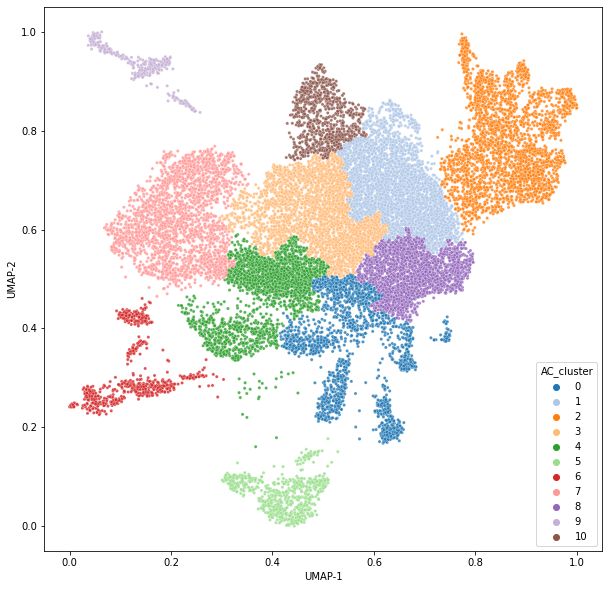

In [601]:
from sklearn.cluster import AgglomerativeClustering as AC
ac_cluster = AC(n_clusters=None, affinity='euclidean', linkage='ward',
                distance_threshold=7).fit(ec_bing_umap_scaled[['UMAP-1', 'UMAP-2']])
ac_label = df(ac_cluster.labels_, index=ec_bing_umap_scaled.index, columns=['AC_cluster'])
ac_label['UMAP-1'] = ec_bing_umap_scaled['UMAP-1']
ac_label['UMAP-2'] = ec_bing_umap_scaled['UMAP-2']

# visualize
plt.figure(figsize=(10, 10))
sns.scatterplot(x='UMAP-1', y='UMAP-2',
                alpha=0.8, s=10,
                hue='AC_cluster', palette='tab20',
                data=ac_label)

# Direct clustering

In [19]:
ec_bing_matrix_hi

CPC006_EFO27_6H:BRD-K92317137-001-04-0:10  \
KLHL21                                   10.000000   
MMP1                                      9.341949   
RGS2                                      8.918900   
INSIG1                                    8.578950   
HSPA1A                                    8.239650   
...                                            ...   
ACAT2                                    -6.768500   
ELAC2                                    -6.782250   
C2CD5                                    -7.004500   
PLK1                                     -7.193000   
SUV39H1                                  -7.884750   

         CPC006_EFO27_6H:BRD-K06792661-001-01-9:10  CPC006_RMUGS_6H:H17  \
KLHL21                                     2.88645              3.31375   
MMP1                                      -0.35515              1.23920   
RGS2                                       5.89750              5.59530   
INSIG1                                     2.06455              3.73680   
HSPA1A                                    -0.33205              0.53315   
...                                            ...                  ...   
ACAT2                                     -2.06300              1.57885   
ELAC2                                     -2.71810              1.63950   
C2CD5                                      0.42095             -2.91210   
PLK1                                      -2.47720             -1.61770   
SUV39H1                                   -1.26620             -5.64715   

         ASG003_A549_24H:K19  DPK.CP001_A549_24H:BRD-A12230535:10  \
KLHL21             -1.810632                             0.224005   
MMP1                0.689376                             1.368765   
RGS2                0.052903                             0.486148   
INSIG1             -0.747121                             0.574568   
HSPA1A             -1.707182                            -0.784140   
...                      ...                                  ...   
ACAT2               2.920269                            -0.301646   
ELAC2              -1.472492                            -2.441083   
C2CD5               1.600716                            -1.102817   
PLK1               -4.022735                           -10.000000   
SUV39H1            -1.551958                            -9.992019   

         HOG002_A549_24H:BRD-A68009927-003-02-9:0.3704  REP.A018_A549_24H:J19  \
KLHL21                                        0.760992                1.26095   
MMP1                                          0.772916                0.21135   
RGS2                                         -5.129492                0.96605   
INSIG1                                       -0.999715               -1.27055   
HSPA1A                                        0.630172               -3.60740   
...                                                ...                    ...   
ACAT2                                        -1.440423                0.99725   
ELAC2                                        -1.046757               -4.14380   
C2CD5                                        -2.149980               -2.49395   
PLK1                                         -7.512629              -10.00000   
SUV39H1                                      -7.375328              -10.00000   

         ASG003_A549_24H:L16  REP.A018_A549_24H:J20  PBIOA015_A549_24H:O19  \
KLHL21             -0.736466                1.32105                0.36045   
MMP1               -0.388389                0.20580               -0.23400   
RGS2                0.152337                2.30600               -3.37660   
INSIG1              1.727886               -2.00595                1.38510   
HSPA1A             -0.551486               -0.97395               -0.84455   
...                      ...                    ...                    ...   
ACAT2               0.131630               -4.27925                0.44785   
ELAC2              -1.307251     

/home/dyang-server/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


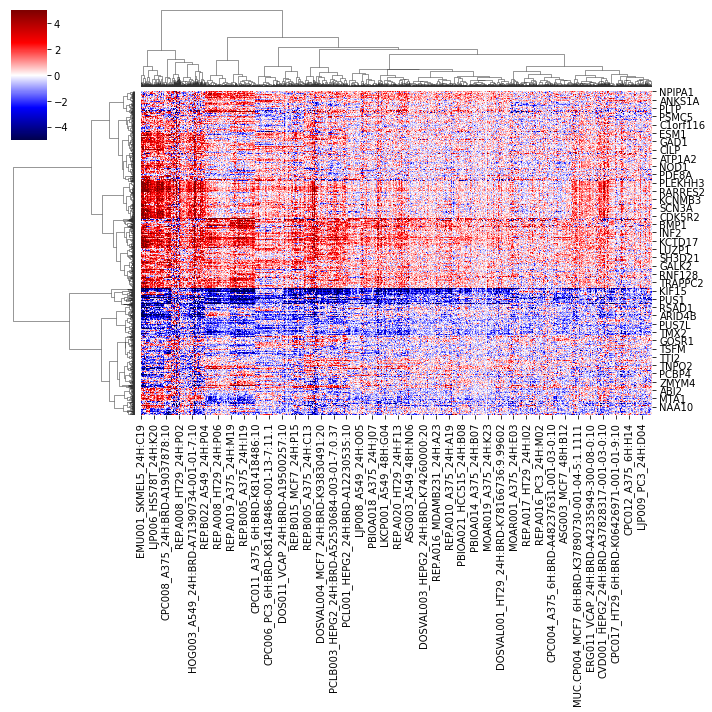

In [20]:
g = sns.clustermap(ec_bing_matrix_hi,
                   method='ward', metric='euclidean', 
                   vmin=-5, vmax=5, cmap='seismic')

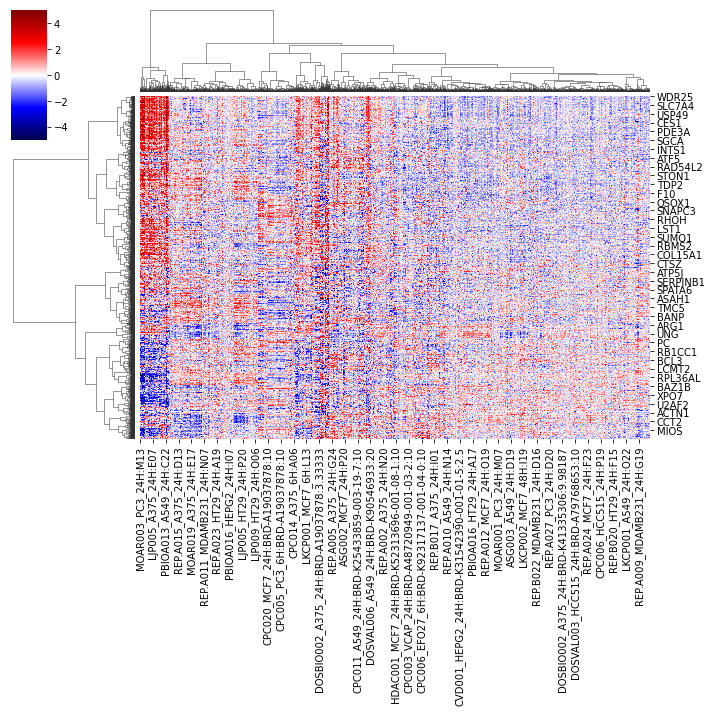

In [21]:
g1 = sns.clustermap(ec_bing_matrix_hi, z_score=0,
                   method='ward', metric='euclidean', 
                   vmin=-5, vmax=5, cmap='seismic')

In [22]:
# dichotomized: -1, 0, 1
ec_hi_sign = np.sign(ec_bing_matrix_hi)
ec_hi_indicator = ec_hi_sign[abs(ec_bing_matrix_hi) >= 1].dropna(axis=0, how='all').fillna(0)

In [23]:
ec_hi_indicator

CPC006_EFO27_6H:BRD-K92317137-001-04-0:10  \
KLHL21                                         1.0   
MMP1                                           1.0   
RGS2                                           1.0   
INSIG1                                         1.0   
HSPA1A                                         1.0   
...                                            ...   
ACAT2                                         -1.0   
ELAC2                                         -1.0   
C2CD5                                         -1.0   
PLK1                                          -1.0   
SUV39H1                                       -1.0   

         CPC006_EFO27_6H:BRD-K06792661-001-01-9:10  CPC006_RMUGS_6H:H17  \
KLHL21                                         1.0                  1.0   
MMP1                                           0.0                  1.0   
RGS2                                           1.0                  1.0   
INSIG1                                         1.0                  1.0   
HSPA1A                                         0.0                  0.0   
...                                            ...                  ...   
ACAT2                                         -1.0                  1.0   
ELAC2                                         -1.0                  1.0   
C2CD5                                          0.0                 -1.0   
PLK1                                          -1.0                 -1.0   
SUV39H1                                       -1.0                 -1.0   

         ASG003_A549_24H:K19  DPK.CP001_A549_24H:BRD-A12230535:10  \
KLHL21                  -1.0                                  0.0   
MMP1                     0.0                                  1.0   
RGS2                     0.0                                  0.0   
INSIG1                   0.0                                  0.0   
HSPA1A                  -1.0                                  0.0   
...                      ...                                  ...   
ACAT2                    1.0                                  0.0   
ELAC2                   -1.0                                 -1.0   
C2CD5                    1.0                                 -1.0   
PLK1                    -1.0                                 -1.0   
SUV39H1                 -1.0                                 -1.0   

         HOG002_A549_24H:BRD-A68009927-003-02-9:0.3704  REP.A018_A549_24H:J19  \
KLHL21                                             0.0                    1.0   
MMP1                                               0.0                    0.0   
RGS2                                              -1.0                    0.0   
INSIG1                                             0.0                   -1.0   
HSPA1A                                             0.0                   -1.0   
...                                                ...                    ...   
ACAT2                                             -1.0                    0.0   
ELAC2                                             -1.0                   -1.0   
C2CD5                                             -1.0                   -1.0   
PLK1                                              -1.0                   -1.0   
SUV39H1                                           -1.0                   -1.0   

         ASG003_A549_24H:L16  REP.A018_A549_24H:J20  PBIOA015_A549_24H:O19  \
KLHL21                   0.0                    1.0                    0.0   
MMP1                     0.0                    0.0                    0.0   
RGS2                     0.0                    1.0                   -1.0   
INSIG1                   1.0                   -1.0                    1.0   
HSPA1A                   0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
ACAT2                    0.0                   -1.0                    0.0   
ELAC2                   -1.0     

In [24]:
ec_hind_corr = ec_hi_indicator.corr(method='pearson')

/home/dyang-server/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


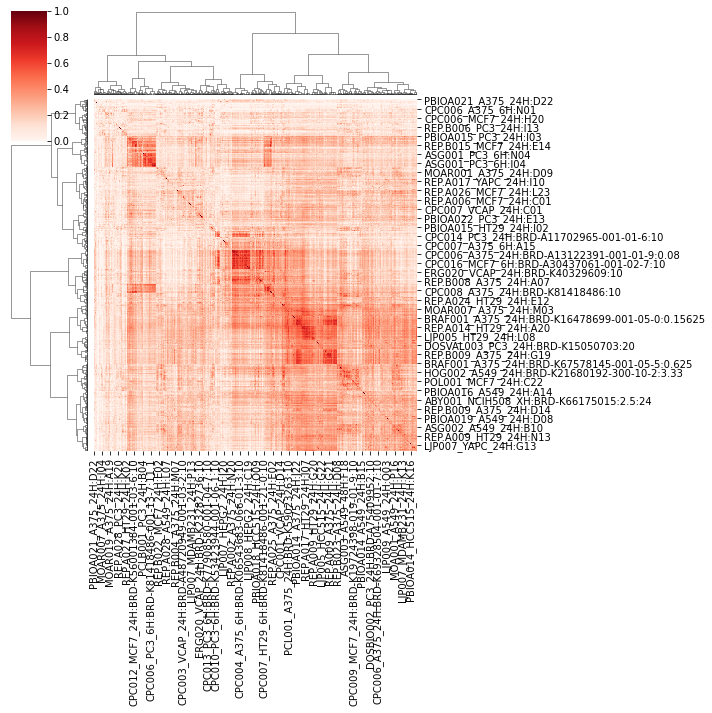

In [25]:
sns.clustermap(ec_hind_corr, method='ward', metric='euclidean',
               vmin=0, vmax=1.0, cmap='Reds')

In [26]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster import hierarchy

In [27]:
ec_bing_matrix

CPC006_EFO27_6H:BRD-K92317137-001-04-0:10  \
KLHL21                                   10.000000   
MMP1                                      9.341949   
RGS2                                      8.918900   
INSIG1                                    8.578950   
HSPA1A                                    8.239650   
...                                            ...   
ACAT2                                    -6.768500   
ELAC2                                    -6.782250   
C2CD5                                    -7.004500   
PLK1                                     -7.193000   
SUV39H1                                  -7.884750   

         CPC006_EFO27_6H:BRD-K06792661-001-01-9:10  CPC006_RMUGS_6H:H17  \
KLHL21                                     2.88645              3.31375   
MMP1                                      -0.35515              1.23920   
RGS2                                       5.89750              5.59530   
INSIG1                                     2.06455              3.73680   
HSPA1A                                    -0.33205              0.53315   
...                                            ...                  ...   
ACAT2                                     -2.06300              1.57885   
ELAC2                                     -2.71810              1.63950   
C2CD5                                      0.42095             -2.91210   
PLK1                                      -2.47720             -1.61770   
SUV39H1                                   -1.26620             -5.64715   

         CPC006_EFO27_6H:BRD-K15025317-001-05-2:10  \
KLHL21                                     0.47215   
MMP1                                       1.07310   
RGS2                                       4.48580   
INSIG1                                    -0.06540   
HSPA1A                                     2.18025   
...                                            ...   
ACAT2                                      2.65415   
ELAC2                                      1.81915   
C2CD5                                     -2.12830   
PLK1                                      -3.48790   
SUV39H1                                    0.93960   

         CPC006_EFO27_6H:BRD-K64890080-001-03-9:10  \
KLHL21                                     2.37285   
MMP1                                       0.30885   
RGS2                                       3.24185   
INSIG1                                     3.02225   
HSPA1A                                    -0.04760   
...                                            ...   
ACAT2                                      1.69845   
ELAC2                                      0.55865   
C2CD5                                     -3.44720   
PLK1                                      -3.09980   
SUV39H1                                   -5.22415   

         CPC006_EFO27_6H:BRD-K74402642-003-01-2:10  \
KLHL21                                    7.365450   
MMP1                                      3.387250   
RGS2                                      8.303801   
INSIG1                                    4.241050   
HSPA1A                                   10.000000   
...                                            ...   
ACAT2                                    -0.467700   
ELAC2                                    -3.906750   
C2CD5                                    -1.821700   
PLK1                                     -6.709950   
SUV39H1                                  -5.545450   

         CPC006_EFO27_6H:BRD-K67868012-003-01-5:11.1  CPC006_RMUGS_6H:L07  \
KLHL21                                       5.00000              1.65010   
MMP1                                         1.43675              1.26100   
RGS2                                         0.35730              9.71910   
INSIG1                                       0.59055              3.56460   
HSPA1A                                       1.79935              1.78135   
...                                              .

In [28]:
distanceMatrix = pdist(ec_bing_matrix_hi.T, metric='cosine')

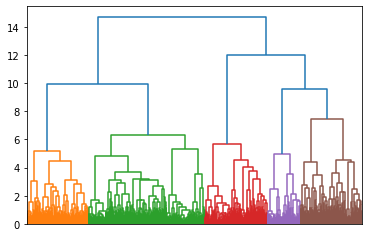

In [29]:
dend = dendrogram(linkage(distanceMatrix, method='ward'), 
                  color_threshold=8,
                  no_labels=True,
                  leaf_font_size=1)

In [30]:
# correlation as distance
distanceMatrix_1 = pdist(ec_bing_matrix_hi.T, metric='correlation')

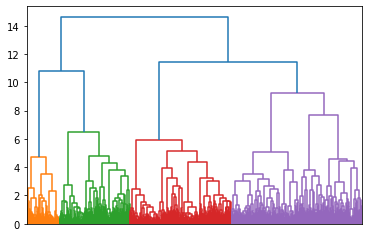

In [31]:
dend_1 = dendrogram(linkage(distanceMatrix_1, method='ward'), 
                  color_threshold=10,
                  no_labels=True,
                  leaf_font_size=1)

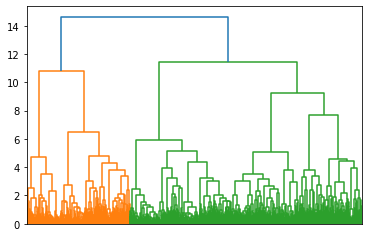

In [32]:
# super cluster
hierarchy.set_link_color_palette(None)
dend_super = dendrogram(linkage(distanceMatrix_1, method='ward'), 
                  color_threshold=12,
                  no_labels=True,
                  leaf_font_size=1)

In [33]:
cluster_super_size = {}
for c in set(dend_super['color_list']):
    print(c)
    print(len([i for i in dend_super['color_list'] if i == c]) + 1)
    cluster_super_size[c] = len([i for i in dend_super['color_list'] if i == c]) + 1

C0
2
C2
2753
C1
1230


In [34]:
# assign super cluster
ec_hind_cluster_super = df(index=ec_hind_corr.index, columns=['cluster'])
tmp_ind = 0
for i in range(2):
    tmp_c = i + 1
    tmp_c_name = 'C' + str(tmp_c)

    for j in range(cluster_super_size[tmp_c_name]):
        ec_hind_cluster_super.at[ec_hind_cluster_super.index[dend_super['leaves'][tmp_ind + j]], 'cluster'] = 'super_' + tmp_c_name
    tmp_ind = tmp_ind + cluster_super_size[tmp_c_name]

In [35]:
ec_hind_cluster_super

cluster
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10  super_C2
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10  super_C2
CPC006_RMUGS_6H:H17                        super_C1
ASG003_A549_24H:K19                        super_C2
DPK.CP001_A549_24H:BRD-A12230535:10        super_C2
...                                             ...
REP.A022_HELA_24H:K19                      super_C2
REP.B008_HELA_24H:O13                      super_C2
REP.B005_HELA_24H:G19                      super_C2
REP.A010_HELA_24H:P10                      super_C2
REP.B001_HELA_24H:P03                      super_C1

[3983 rows x 1 columns]

In [36]:
cluster_size = {}
for c in set(dend_1['color_list']):
    print(c)
    print(len([i for i in dend_1['color_list'] if i == c]) + 1)
    cluster_size[c] = len([i for i in dend_1['color_list'] if i == c]) + 1

C4
1547
C1
394
C2
836
C0
4
C3
1206


In [37]:
set(dend_1['color_list'])

{'C0', 'C1', 'C2', 'C3', 'C4'}

In [38]:
# assign cluster
ec_hind_cluster = df(index=ec_hind_corr.index, columns=['cluster'])
tmp_ind = 0
for i in range(4):
    tmp_c = i + 1
    tmp_c_name = 'C' + str(tmp_c)

    for j in range(cluster_size[tmp_c_name]):
        ec_hind_cluster.at[ec_hind_cluster.index[dend_1['leaves'][tmp_ind + j]], 'cluster'] = tmp_c_name
    tmp_ind = tmp_ind + cluster_size[tmp_c_name]

ec_hind_cluster['cmap_name'] = sig_info['cmap_name']
ec_hind_cluster['shift_ability'] = shift_ability['shift_ability']
ec_hind_cluster['CXCL10'] = ec_bing_matrix_hi.T['CXCL10']

In [40]:
ec_hind_cluster['cluster'].value_counts()

C4    1547
C3    1206
C2     836
C1     394
Name: cluster, dtype: int64

In [41]:
ec_hind_cluster

cluster               cmap_name  \
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10      C4           BRD-K92317137   
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10      C4            narciclasine   
CPC006_RMUGS_6H:H17                            C2                 BI-2536   
ASG003_A549_24H:K19                            C4           BRD-K63750851   
DPK.CP001_A549_24H:BRD-A12230535:10            C4                nutlin-3   
...                                           ...                     ...   
REP.A022_HELA_24H:K19                          C4                MLN-4924   
REP.B008_HELA_24H:O13                          C4                   SN-38   
REP.B005_HELA_24H:G19                          C4                 TAS-103   
REP.A010_HELA_24H:P10                          C4  fluocinolone-acetonide   
REP.B001_HELA_24H:P03                          C2                amikacin   

                                           shift_ability    CXCL10  
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10       0.801968 -0.952700  
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10       0.719976  1.381000  
CPC006_RMUGS_6H:H17                             0.705704  0.249750  
ASG003_A549_24H:K19                             1.039512 -0.509247  
DPK.CP001_A549_24H:BRD-A12230535:10             0.999257  0.956595  
...                                                  ...       ...  
REP.A022_HELA_24H:K19                           0.707637  0.325247  
REP.B008_HELA_24H:O13                           0.705767  1.932700  
REP.B005_HELA_24H:G19                           0.704492  3.083677  
REP.A010_HELA_24H:P10                           0.704172  0.310154  
REP.B001_HELA_24H:P03                           0.704060  1.428591  

[3983 rows x 4 columns]

In [41]:
ec_hind_cluster[ec_hind_cluster['cmap_name'] == 'PF-03758309']['cluster'].value_counts()

C4    17
C2     2
Name: cluster, dtype: int64

In [385]:
ec_hind_cluster[ec_hind_cluster['cmap_name'] == 'doxorubicin']['cluster'].value_counts()

C4    55
C2    41
Name: cluster, dtype: int64

In [386]:
ec_hind_cluster[ec_hind_cluster['cmap_name'] == 'selumetinib']['cluster'].value_counts()

C3    53
Name: cluster, dtype: int64

In [387]:
ec_hind_cluster[ec_hind_cluster['cmap_name'] == 'mitoxantrone']['cluster'].value_counts()

C4    104
C2     61
Name: cluster, dtype: int64

In [388]:
ec_hind_cluster[ec_hind_cluster['cmap_name'] == 'vorinostat']['cluster'].value_counts()

C1    103
C2     32
C4      8
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='shift_ability'>

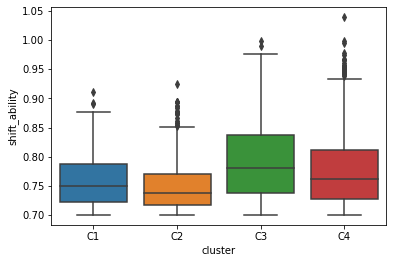

In [42]:
sns.boxplot(x='cluster', y='shift_ability', order=['C' + str(i + 1) for i in range(4)], data=ec_hind_cluster)

<AxesSubplot:xlabel='cluster', ylabel='CXCL10'>

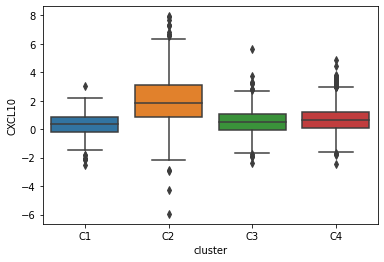

In [43]:
sns.boxplot(x='cluster', y='CXCL10', order=['C' + str(i + 1) for i in range(4)], data=ec_hind_cluster)

<AxesSubplot:xlabel='cluster', ylabel='CXCL10'>

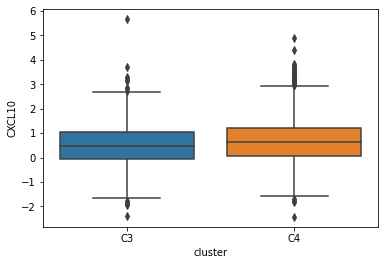

In [44]:
sns.boxplot(x='cluster', y='CXCL10', order=['C3', 'C4'], data=ec_hind_cluster)

In [145]:
# assign compound info
compound_info = pd.read_csv(data_home + '/CMAP2020_Cancer/compoundinfo_beta.txt',
                            header=0, index_col=1, sep='\t')
compound_info = compound_info.groupby(level=0).first()

In [43]:
ec_hind_cluster['moa'] = 'Not available'
for s in ec_hind_cluster.index:
    ec_hind_cluster.at[s, 'moa'] = compound_info.loc[ec_hind_cluster.loc[s, 'cmap_name'], 'moa']
ec_hind_cluster['moa'] = ec_hind_cluster['moa'].fillna('Not available')

cluster_moa = pd.crosstab(ec_hind_cluster['cluster'], ec_hind_cluster['moa'])

# exlude moa with too few entries
moa_count = df(ec_hind_cluster['moa'].value_counts())
moa_count_10 = moa_count[moa_count['moa'] >= 10]
moa_count_10 = moa_count_10.drop(index='Not available')
print(moa_count_10.shape)

cluster_moa_selected = cluster_moa[moa_count_10.index]

cluster_moa_se_percent = cluster_moa_selected / cluster_moa_selected.sum(axis=0)
sns.clustermap(cluster_moa_se_percent, figsize=(12, 10),
               cmap='Reds', method='ward', vmin=0, vmax=1)

# assign cluster color
color_cluster = {'C1': 'salmon',
                 'C2': 'bisque',
                 'C3': 'powderblue',
                 'C4': 'plum'}
# arrange
cl_arrg = []
for c in cluster_moa_se_percent.index:
    tmp_c = df(cluster_moa_se_percent.loc[c, :])
    tmp_c = tmp_c[tmp_c[c] > .5].sort_values(by=c, ascending=False).index
    for i in tmp_c:
        if i not in cl_arrg:
            cl_arrg.append(i)

# add the rest
for i in cluster_moa_se_percent.columns:
    if i not in cl_arrg:
        cl_arrg.append(i)

# visualize by stack bars
tmp_sum = 0
plt.figure(figsize=(10, 6))
stacked_percent = cluster_moa_se_percent.copy().T
for c in ['C' + str(i + 1) for i in range(4)]:
    tmp_sum = tmp_sum +  cluster_moa_se_percent.T[c]
    stacked_percent[c] = tmp_sum
for c in ['C' + str(4 - i) for i in range(4)]:
    sns.barplot(x=stacked_percent.index, y=stacked_percent[c], order=cl_arrg,
                color=color_cluster[c], label=c, saturation=0.9)
plt.xticks(rotation=90)
plt.ylabel('percentage')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'moa_by_cluster_shift_0.7.pdf', transparent=True)
fig.savefig(panel_home + 'moa_by_cluster_shift_0.7.png', dpi=300, transparent=True)

In [401]:
ec_hind_cluster[ec_hind_cluster['moa'] == 'CLK inhibitor']

cluster cmap_name  shift_ability  \
LJP005_HCC515_24H:D19                             C2   WZ-3105       0.774814   
LJP005_HCC515_24H:D21                             C2   WZ-3105       0.758388   
LJP005_HCC515_24H:D20                             C2   WZ-3105       0.755240   
LJP005_HCC515_24H:D22                             C2   WZ-3105       0.739018   
LJP005_PC3_24H:D19                                C2   WZ-3105       0.723613   
LJP005_HS578T_24H:D22                             C2   WZ-3105       0.779374   
LJP005_HS578T_24H:D21                             C2   WZ-3105       0.769858   
LJP001_MCF7_24H:BRD-K92571446-001-01-4:2          C2   WZ-3105       0.753308   
LJP005_MDAMB231_24H:D23                           C2   WZ-3105       0.744891   
LJP001_MDAMB231_24H:BRD-K92571446-001-01-4:2      C2   WZ-3105       0.741000   
LJP005_MDAMB231_24H:D20                           C2   WZ-3105       0.724965   
LJP001_MCF7_6H:BRD-K92571446-001-01-4:0.4         C2   WZ-3105       0.716183   
LJP005_MDAMB231_24H:D21                           C2   WZ-3105       0.703779   
LJP005_A375_24H:D20                               C2   WZ-3105       0.737228   
LJP005_A375_24H:D21                               C2   WZ-3105       0.727623   
LJP005_A375_24H:D22                               C2   WZ-3105       0.727131   

                                                CXCL10            moa  
LJP005_HCC515_24H:D19                         3.883716  CLK inhibitor  
LJP005_HCC515_24H:D21                         3.976261  CLK inhibitor  
LJP005_HCC515_24H:D20                         5.623177  CLK inhibitor  
LJP005_HCC515_24H:D22                         2.165763  CLK inhibitor  
LJP005_PC3_24H:D19                            5.576900  CLK inhibitor  
LJP005_HS578T_24H:D22                         2.672146  CLK inhibitor  
LJP005_HS578T_24H:D21                         2.719750  CLK inhibitor  
LJP001_MCF7_24H:BRD-K92571446-001-01-4:2      2.607550  CLK inhibitor  
LJP005_MDAMB231_24H:D23                       4.825100  CLK inhibitor  
LJP001_MDAMB231_24H:BRD-K92571446-001-01-4:2  5.417850  CLK inhibitor  
LJP005_MDAMB231_24H:D20                       3.061500  CLK inhibitor  
LJP001_MCF7_6H:BRD-K92571446-001-01-4:0.4    -0.021624  CLK inhibitor  
LJP005_MDAMB231_24H:D21                       5.691500  CLK inhibitor  
LJP005_A375_24H:D20                           4.277650  CLK inhibitor  
LJP005_A375_24H:D21                           5.458300  CLK inhibitor  
LJP005_A375_24H:D22                           3.668950  CLK inhibitor

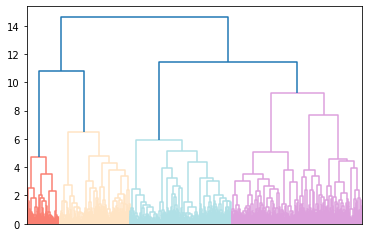

In [48]:
color_p_assigned = {}
for p in ec_hind_cluster.index:
    color_p_assigned[p] = color_cluster[ec_hind_cluster.loc[p, 'cluster']]

from matplotlib.pyplot import cm
from scipy.cluster import hierarchy

cmap = ['salmon', 'bisque', 'powderblue', 'plum']
hierarchy.set_link_color_palette(cmap)

dend_colored = dendrogram(linkage(distanceMatrix_1, method='ward'), 
                          color_threshold=10,
                          no_labels=True,
                          leaf_font_size=1)
fig = plt.gcf()
fig.savefig(panel_home + 'clustering_shift_0.7.pdf', transparent=True)
fig.savefig(panel_home + 'clustering_shift_0.7.png', dpi=300, transparent=True)

In [49]:
ec_hind_cluster

cluster               cmap_name  \
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10      C4           BRD-K92317137   
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10      C4            narciclasine   
CPC006_RMUGS_6H:H17                            C2                 BI-2536   
ASG003_A549_24H:K19                            C4           BRD-K63750851   
DPK.CP001_A549_24H:BRD-A12230535:10            C4                nutlin-3   
...                                           ...                     ...   
REP.A022_HELA_24H:K19                          C4                MLN-4924   
REP.B008_HELA_24H:O13                          C4                   SN-38   
REP.B005_HELA_24H:G19                          C4                 TAS-103   
REP.A010_HELA_24H:P10                          C4  fluocinolone-acetonide   
REP.B001_HELA_24H:P03                          C2                amikacin   

                                           shift_ability    CXCL10  \
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10       0.801968 -0.952700   
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10       0.719976  1.381000   
CPC006_RMUGS_6H:H17                             0.705704  0.249750   
ASG003_A549_24H:K19                             1.039512 -0.509247   
DPK.CP001_A549_24H:BRD-A12230535:10             0.999257  0.956595   
...                                                  ...       ...   
REP.A022_HELA_24H:K19                           0.707637  0.325247   
REP.B008_HELA_24H:O13                           0.705767  1.932700   
REP.B005_HELA_24H:G19                           0.704492  3.083677   
REP.A010_HELA_24H:P10                           0.704172  0.310154   
REP.B001_HELA_24H:P03                           0.704060  1.428591   

                                                               moa  
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10            Not available  
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10     LIM kinase activator  
CPC006_RMUGS_6H:H17                                  PLK inhibitor  
ASG003_A549_24H:K19                                  Not available  
DPK.CP001_A549_24H:BRD-A12230535:10                  MDM inhibitor  
...                                                            ...  
REP.A022_HELA_24H:K19                                Not available  
REP.B008_HELA_24H:O13                      Topoisomerase inhibitor  
REP.B005_HELA_24H:G19                      Topoisomerase inhibitor  
REP.A010_HELA_24H:P10                       Corticosteroid agonist  
REP.B001_HELA_24H:P03                                Not available  

[3983 rows x 5 columns]

In [50]:
# output the cluster assignment
ec_hind_cluster.to_csv(panel_home + 'MoS_assignment_3983.csv', sep=',')

In [51]:
# lineage specificity
ec_hind_cluster['cell_line'] = sig_info['cell_iname']
cluster_cell = pd.crosstab(ec_hind_cluster['cluster'], ec_hind_cluster['cell_line'])
print(cluster_cell.shape)

(4, 35)


In [52]:
cell_count = df(ec_hind_cluster['cell_line'].value_counts())
cell_count_10 = cell_count[cell_count['cell_line'] >= 20]
print(cell_count_10.shape)

cluster_cell_selected = cluster_cell[cell_count_10.index]

(13, 1)


In [53]:
cluster_cell_percent = cluster_cell_selected / cluster_cell_selected.sum(axis=0)

In [54]:
cluster_cell_percent

cell_line      A375      MCF7      A549       PC3      HT29      VCAP  \
cluster                                                                 
C1         0.056213  0.262561  0.019417  0.267635  0.029148  0.092437   
C2         0.306706  0.192869  0.141748  0.157676  0.042601  0.247899   
C3         0.346154  0.092382  0.277670  0.163900  0.544843  0.037815   
C4         0.290927  0.452188  0.561165  0.410788  0.383408  0.621849   

cell_line  MDAMB231    HCC515     HEPG2      YAPC    SKMEL5    HS578T  \
cluster                                                                 
C1         0.000000  0.000000  0.011236  0.000000  0.000000  0.000000   
C2         0.135802  0.297297  0.280899  0.041096  0.220339  0.947368   
C3         0.746914  0.689189  0.044944  0.808219  0.355932  0.026316   
C4         0.117284  0.013514  0.662921  0.150685  0.423729  0.026316   

cell_line      HELA  
cluster              
C1         0.000000  
C2         0.121212  
C3         0.000000  
C4         0.878788

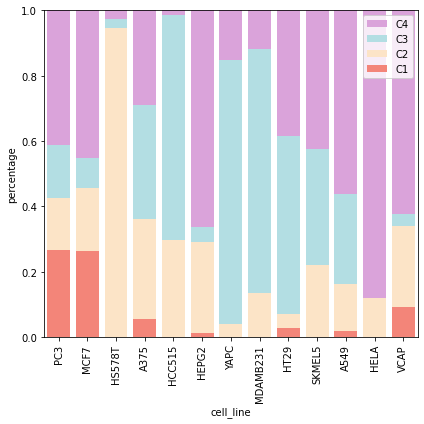

In [410]:
# arrange
cell_cl_arrg = []
for c in cluster_cell_percent.index:
    tmp_c = df(cluster_cell_percent.loc[c, :])
    tmp_c = tmp_c[tmp_c[c] > .25].sort_values(by=c, ascending=False).index
    for i in tmp_c:
        if i not in cell_cl_arrg:
            cell_cl_arrg.append(i)

# add the rest
for i in cluster_cell_percent.columns:
    if i not in cell_cl_arrg:
        cell_cl_arrg.append(i)
# cell_cl_arrg = cell_count_10.sort_values(by='cell_line', ascending=False).index

# visualize by stack bars
tmp_sum = 0
plt.figure(figsize=(6, 6))
stacked_cell_percent = cluster_cell_percent.copy().T
for c in ['C' + str(i + 1) for i in range(4)]:
    tmp_sum = tmp_sum +  cluster_cell_percent.T[c]
    stacked_cell_percent[c] = tmp_sum
for c in ['C' + str(4 - i) for i in range(4)]:
    sns.barplot(x=stacked_cell_percent.index, y=stacked_cell_percent[c], order=cell_cl_arrg,
                color=color_cluster[c], label=c, saturation=0.9)
plt.xticks(rotation=90)
plt.ylabel('percentage')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'cell_by_cluster_shift_0.7.pdf', transparent=True)
fig.savefig(panel_home + 'cell_by_cluster_shift_0.7.png', dpi=300, transparent=True)

In [216]:
cm.rainbow(np.linspace(0, 1, 10))

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.80392157e-01, 3.38158275e-01, 9.85162233e-01, 1.00000000e+00],
       [6.07843137e-02, 6.36474236e-01, 9.41089253e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [3.86274510e-01, 9.84086337e-01, 7.67362681e-01, 1.00000000e+00],
       [6.13725490e-01, 9.84086337e-01, 6.41213315e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 6.36474236e-01, 3.38158275e-01, 1.00000000e+00],
       [1.00000000e+00, 3.38158275e-01, 1.71625679e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [55]:
# genes that show consensus induction and consensus suppression in each clusters
g_cons_cluster = df(index=ec_hi_indicator.index, columns=['C' + str(i + 1) for i in range(4)])
for c in ec_hind_cluster['cluster'].unique():
    tmp_c = ec_hind_cluster[ec_hind_cluster['cluster'] == c].index
    tmp_g_indicator = ec_hi_indicator[tmp_c]
    g_cons_cluster[c] = tmp_g_indicator.sum(axis=1) / len(tmp_c)

In [56]:
g_cons_cluster.describe()

C1            C2            C3            C4
count  10174.000000  10174.000000  10174.000000  10174.000000
mean       0.033537      0.165296      0.080410      0.041600
std        0.392710      0.418522      0.369816      0.262794
min       -0.987310     -0.889952     -0.978441     -0.924370
25%       -0.218274     -0.166268     -0.124378     -0.098901
50%        0.065990      0.223684      0.131012      0.078216
75%        0.304569      0.523923      0.339967      0.213316
max        0.977157      0.882775      0.947761      0.929541

In [57]:
# consensus signature of each cluster
g_cons_cluster

C1        C2        C3        C4
KLHL21  -0.007614  0.055024 -0.137645  0.333549
MMP1     0.662437  0.745215 -0.083748  0.344538
RGS2     0.675127  0.200957 -0.316750  0.268261
INSIG1   0.776650  0.178230  0.338308 -0.168067
HSPA1A   0.578680 -0.088517 -0.174959 -0.142211
...           ...       ...       ...       ...
ACAT2   -0.464467  0.239234 -0.384743 -0.147382
ELAC2   -0.677665 -0.356459 -0.553068 -0.369748
C2CD5   -0.949239 -0.793062  0.393864 -0.470588
PLK1    -0.941624 -0.800239 -0.894693 -0.875242
SUV39H1 -0.967005 -0.590909 -0.915423 -0.728507

[10174 rows x 4 columns]

In [56]:
g_cons_cluster.T['CXCL10']

C1    0.121827
C2    0.696172
C3    0.238806
C4    0.308985
Name: CXCL10, dtype: float64

In [415]:
# pathway enrichment
gp_cons_nes = df(columns=g_cons_cluster.columns)
gp_cons_fdr = df(columns=g_cons_cluster.columns)
for c in g_cons_cluster.columns:
    tmp_result = gp.prerank(df(g_cons_cluster[c]).sort_values(by=c, ascending=False),
                            gene_sets='GO_Biological_Process_2021',
                            processes=16,
                            permutation_num=1000,
                            outdir=None, seed=0, min_size=10, max_size=200)
    gp_cons_nes[c] = tmp_result.res2d['nes']
    gp_cons_fdr[c] = tmp_result.res2d['fdr']

In [416]:
gp_cons_nes

C1        C2  \
Term                                                                     
DNA replication (GO:0006260)                       -2.986774 -3.588399   
DNA replication initiation (GO:0006270)            -2.659096 -2.866313   
DNA strand elongation involved in DNA replicati... -2.529227 -2.698471   
DNA-dependent DNA replication (GO:0006261)         -2.730894 -3.852649   
DNA-dependent DNA replication maintenance of fi... -2.375239 -2.297482   
...                                                      ...       ...   
protein dephosphorylation (GO:0006470)             -0.570806  0.892440   
regulation of neurogenesis (GO:0050767)            -0.532858  0.771808   
regulation of transcription by RNA polymerase I... -0.424907  0.670020   
vesicle coating (GO:0006901)                       -0.478622 -1.371475   
vesicle targeting, rough ER to cis-Golgi (GO:00... -0.482886 -1.442109   

                                                          C3        C4  
Term                                                                    
DNA replication (GO:0006260)                       -3.485592 -3.378827  
DNA replication initiation (GO:0006270)            -3.435180 -3.204770  
DNA strand elongation involved in DNA replicati... -2.799227 -2.770964  
DNA-dependent DNA replication (GO:0006261)         -3.561585 -3.190683  
DNA-dependent DNA replication maintenance of fi... -2.221607 -2.520209  
...                                                      ...       ...  
protein dephosphorylation (GO:0006470)              0.697095  1.425008  
regulation of neurogenesis (GO:0050767)             1.033335  1.260551  
regulation of transcription by RNA polymerase I... -1.345328 -0.804744  
vesicle coating (GO:0006901)                        0.645694  0.640850  
vesicle targeting, rough ER to cis-Golgi (GO:00...  0.652103  0.650406  

[3019 rows x 4 columns]

In [79]:
for g in gp_cons_nes.index:
    print(g)

DNA replication (GO:0006260)
DNA replication initiation (GO:0006270)
DNA strand elongation involved in DNA replication (GO:0006271)
DNA-dependent DNA replication (GO:0006261)
DNA-dependent DNA replication maintenance of fidelity (GO:0045005)
RNA 3'-end processing (GO:0031123)
RNA export from nucleus (GO:0006405)
RNA metabolic process (GO:0016070)
RNA methylation (GO:0001510)
RNA modification (GO:0009451)
RNA processing (GO:0006396)
RNA splicing (GO:0008380)
RNA splicing, via transesterification reactions (GO:0000375)
RNA splicing, via transesterification reactions with bulged adenosine as nucleophile (GO:0000377)
RNA transport (GO:0050658)
SRP-dependent cotranslational protein targeting to membrane (GO:0006614)
anaphase-promoting complex-dependent catabolic process (GO:0031145)
cotranslational protein targeting to membrane (GO:0006613)
cytoplasmic translation (GO:0002181)
double-strand break repair (GO:0006302)
double-strand break repair via homologous recombination (GO:0000724)
import

In [417]:
print(gp_cons_fdr.loc['autophagy of mitochondrion (GO:0000422)', :])

C1    0.182268
C2    0.963090
C3    0.020231
C4    0.016524
Name: autophagy of mitochondrion (GO:0000422), dtype: float64


In [418]:
print(gp_cons_nes.loc['autophagy of mitochondrion (GO:0000422)', :])

C1    1.456476
C2    0.687763
C3    2.044485
C4    2.083026
Name: autophagy of mitochondrion (GO:0000422), dtype: float64


In [419]:
print(gp_cons_fdr.loc['regulation of autophagy of mitochondrion (GO:1903146)', :])

C1    0.991267
C2    1.000000
C3    0.498571
C4    0.902311
Name: regulation of autophagy of mitochondrion (GO:1903146), dtype: float64


In [420]:
gp_cons_fdr_sig = gp_cons_fdr[gp_cons_fdr < 0.1].dropna(axis=0, how='all')
print(gp_cons_fdr_sig.shape)

gp_cons_nes_sig = gp_cons_nes[abs(gp_cons_nes) > 1.5].dropna(axis=0, how='all')
print(gp_cons_nes_sig.shape)

merge_sig = list(set(gp_cons_fdr_sig.index) & set(gp_cons_nes_sig.index))
print(len(merge_sig))

(1247, 4)
(1636, 4)
1241


In [421]:
gp_cons_nes.to_csv(panel_home + 'go_process_nes_0.7_shift.csv', sep=',')
gp_cons_fdr.to_csv(panel_home + 'go_process_fdr_0.7_shift.csv', sep=',')

In [422]:
gp_cons_signed_fdr = -np.sign(gp_cons_nes.loc[merge_sig, :]) * np.log10(gp_cons_fdr.loc[merge_sig, :] + 1e-4)

In [423]:
gp_cons_signed_fdr.to_csv(panel_home + 'go_process_signedlogfdr_0.7_shift.csv', sep=',')

In [57]:
gp_cons_nes = pd.read_csv(panel_home + 'go_process_nes_0.7_shift.csv', header=0, index_col=0,sep=',')
gp_cons_fdr = pd.read_csv(panel_home + 'go_process_fdr_0.7_shift.csv', header=0, index_col=0,sep=',')
gp_cons_signed_fdr = pd.read_csv(panel_home + 'go_process_signedlogfdr_0.7_shift.csv', header=0, index_col=0,sep=',')

In [58]:
gp_cons_signed_fdr

C1        C2  \
Term                                                                     
regulation of cellular senescence (GO:2000772)     -0.187155  0.073790   
hexose metabolic process (GO:0019318)               1.060159  0.219227   
positive regulation of cellular catabolic proce...  1.074390  0.110446   
receptor internalization (GO:0031623)               1.084442  0.529117   
defense response to Gram-positive bacterium (GO...  0.209457  1.140758   
...                                                      ...       ...   
double-strand break repair via homologous recom... -4.000000 -1.867292   
histone H4-K8 acetylation (GO:0043982)             -2.253236 -2.597813   
glucose homeostasis (GO:0042593)                    1.604487  0.346571   
negative regulation of platelet activation (GO:...  0.896913  1.148740   
nucleoside salvage (GO:0043174)                    -0.337307 -0.750089   

                                                          C3        C4  
Term                                                                    
regulation of cellular senescence (GO:2000772)     -1.698069 -0.722977  
hexose metabolic process (GO:0019318)               0.457808  0.445085  
positive regulation of cellular catabolic proce...  0.877784  1.164405  
receptor internalization (GO:0031623)               0.603229  0.665473  
defense response to Gram-positive bacterium (GO...  0.730936  0.793852  
...                                                      ...       ...  
double-strand break repair via homologous recom... -4.000000 -4.000000  
histone H4-K8 acetylation (GO:0043982)             -0.007939 -0.374052  
glucose homeostasis (GO:0042593)                    0.517492  0.702137  
negative regulation of platelet activation (GO:...  0.049180  0.978997  
nucleoside salvage (GO:0043174)                    -2.270766 -1.248012  

[1241 rows x 4 columns]

In [61]:
gp_cons_signed_fdr.sort_values(by='C1', ascending=False)

C1        C2  \
Term                                                                     
axonogenesis (GO:0007409)                           2.192857  0.900950   
axon guidance (GO:0007411)                          2.133044  1.105999   
steroid biosynthetic process (GO:0006694)           2.087131  0.872369   
protein localization to cilium (GO:0061512)         2.085220  0.701318   
plasma membrane organization (GO:0007009)           2.069615  0.155866   
...                                                      ...       ...   
RNA 3'-end processing (GO:0031123)                 -4.000000 -4.000000   
mitochondrial gene expression (GO:0140053)         -4.000000 -4.000000   
nucleocytoplasmic transport (GO:0006913)           -4.000000 -4.000000   
positive regulation of transcription by RNA pol... -4.000000 -1.649108   
rRNA processing (GO:0006364)                       -4.000000 -4.000000   

                                                          C3        C4  
Term                                                                    
axonogenesis (GO:0007409)                           0.501422  0.626399  
axon guidance (GO:0007411)                          0.534055  1.020305  
steroid biosynthetic process (GO:0006694)           0.606372  0.254858  
protein localization to cilium (GO:0061512)         0.702858  0.848715  
plasma membrane organization (GO:0007009)           1.222572  0.940376  
...                                                      ...       ...  
RNA 3'-end processing (GO:0031123)                 -4.000000 -4.000000  
mitochondrial gene expression (GO:0140053)         -3.392390 -4.000000  
nucleocytoplasmic transport (GO:0006913)           -4.000000 -4.000000  
positive regulation of transcription by RNA pol... -1.936774 -2.772422  
rRNA processing (GO:0006364)                       -4.000000 -4.000000  

[1241 rows x 4 columns]

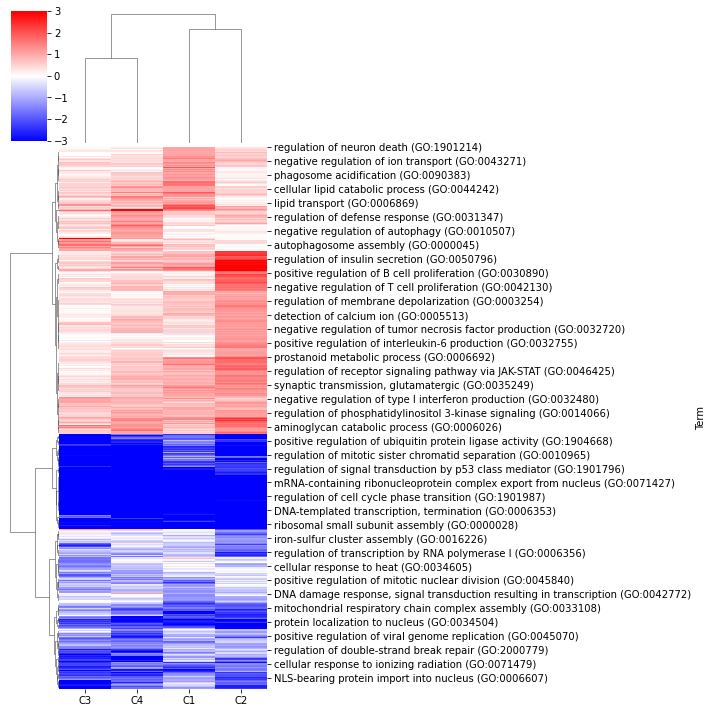

In [59]:
sns.clustermap(gp_cons_signed_fdr, vmin=-3, vmax=3, method='ward', cmap='bwr')

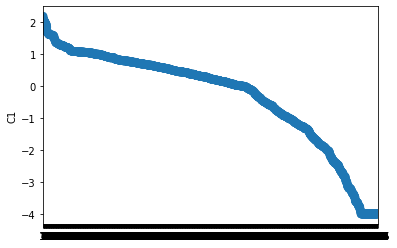

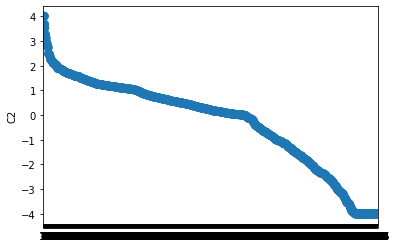

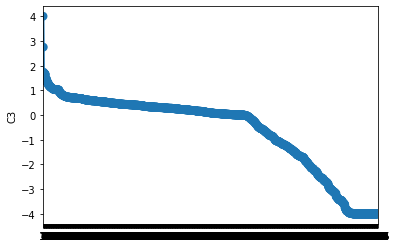

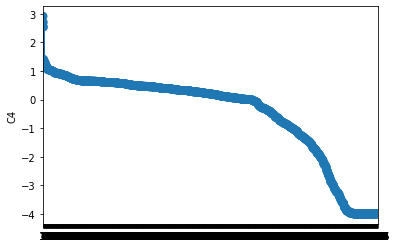

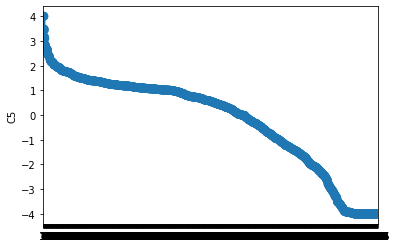

In [124]:
# lineplot
for c in gp_cons_signed_fdr.columns:
    tmp_c = df(gp_cons_signed_fdr[c]).sort_values(by=c, ascending=False)
    sns.pointplot(x=[i for i in range(tmp_c.shape[0])], y=tmp_c[c])
    plt.show()

C1


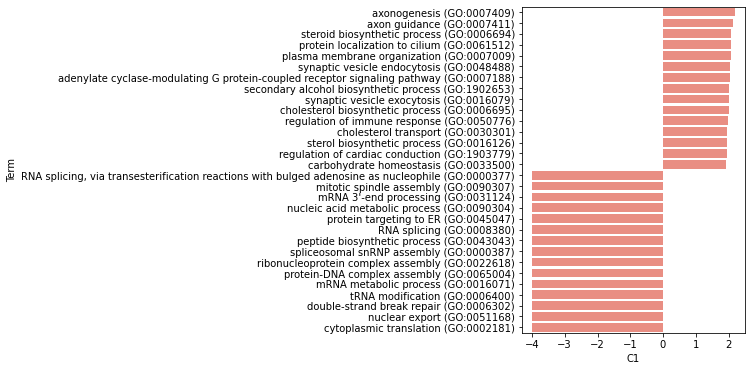

C2


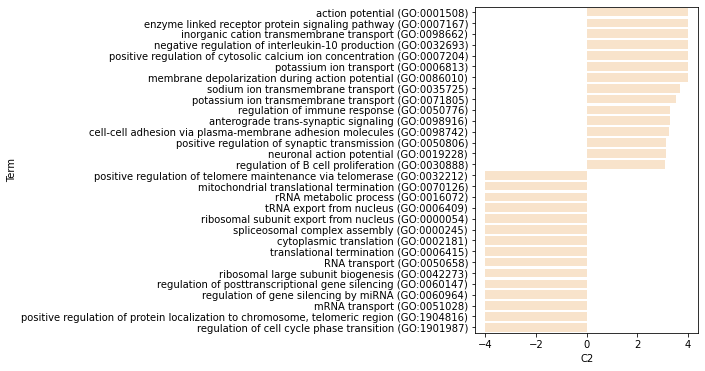

C3


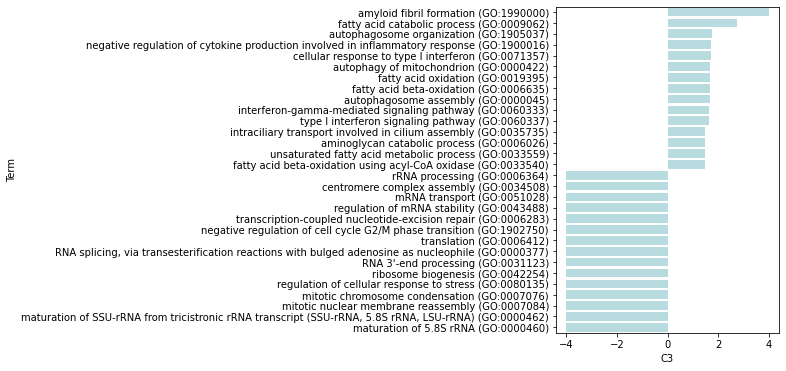

C4


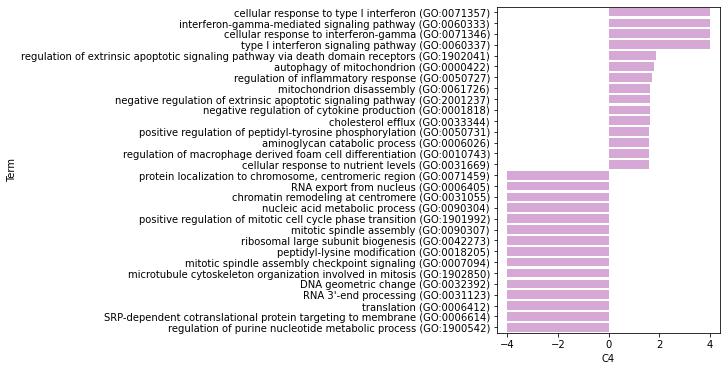

In [426]:
# bar plot
for c in gp_cons_signed_fdr.columns:
    print(c)
    # top 10 pos
    tmp_pos = gp_cons_signed_fdr.sort_values(by=c, ascending=False)[:15][c]
    # top 10 neg
    tmp_neg = gp_cons_signed_fdr.sort_values(by=c, ascending=True)[:15][c]
    
    # merged
    tmp_merged = pd.concat([tmp_pos, tmp_neg], axis=0)
    plt.figure(figsize=(4, 6))
    sns.barplot(x=tmp_merged, y=tmp_merged.index, color=color_cluster[c])
    plt.show()

In [60]:
# visual the pathway enrichment by stack plot
def enrich_stack(stack_matrix, order, enrichment, pathway, save_path=None):
    # assign color through enrichment
    import matplotlib.cm as cm
    import matplotlib.colors as colors

    norm = colors.Normalize(vmin=-3, vmax=3)
    f2rgb = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('bwr'))

    def f2hex(f2rgb, f):
        rgb = f2rgb.to_rgba(f)[:3]
        return '#%02x%02x%02x' % tuple([int(255 * fc) for fc in rgb])
    
    tmp_cluster = {}
    for c in enrichment.index:
        tmp_cluster[c] = f2hex(f2rgb, enrichment.loc[c, pathway])

    # visualize
    plt.figure(figsize=(10, 6))
    for c in ['C' + str(4 - i) for i in range(4)]:
        sns.barplot(x=stack_matrix.index, y=stack_matrix[c], order=order,
                    color=tmp_cluster[c], label=c)
    
    plt.xticks(rotation=90)
    plt.ylabel('percentage')
    plt.ylim(0, 1)
    plt.title(pathway)
    plt.legend()
    plt.tight_layout()
    if save_path is not None:
        fig = plt.gcf()
        fig.savefig(panel_home + save_path + '.pdf', transparent=True)
        fig.savefig(panel_home + save_path + '.png', dpi=300, transparent=True)
    plt.show()

In [428]:
# top pathways in each cluster
for c in gp_cons_signed_fdr.columns:
    print(c)
    # top 10 pos
    print(gp_cons_signed_fdr.sort_values(by=c, ascending=False)[:15][c])
    # top 10 neg
    # print(gp_cons_signed_fdr.sort_values(by=c, ascending=True)[:10][c])

C1
Term
axonogenesis (GO:0007409)                                                                 2.192857
axon guidance (GO:0007411)                                                                2.133044
steroid biosynthetic process (GO:0006694)                                                 2.087131
protein localization to cilium (GO:0061512)                                               2.085220
plasma membrane organization (GO:0007009)                                                 2.069615
synaptic vesicle endocytosis (GO:0048488)                                                 2.041067
adenylate cyclase-modulating G protein-coupled receptor signaling pathway (GO:0007188)    2.038562
secondary alcohol biosynthetic process (GO:1902653)                                       2.020943
synaptic vesicle exocytosis (GO:0016079)                                                  2.009582
cholesterol biosynthetic process (GO:0006695)                                             1.999032
re

In [343]:
10**-2.71

0.0019498445997580456

In [429]:
# top pathways in each cluster
for c in gp_cons_nes.columns:
    print(c)
    # top 10 pos
    print(gp_cons_nes.sort_values(by=c, ascending=False)[:15][c])

C1
Term
axonogenesis (GO:0007409)                                                                 2.252653
intraciliary transport involved in cilium assembly (GO:0035735)                           2.194853
synaptic vesicle exocytosis (GO:0016079)                                                  2.190501
axon guidance (GO:0007411)                                                                2.190432
steroid biosynthetic process (GO:0006694)                                                 2.171118
adenylate cyclase-modulating G protein-coupled receptor signaling pathway (GO:0007188)    2.152141
protein localization to cilium (GO:0061512)                                               2.150936
synaptic vesicle endocytosis (GO:0048488)                                                 2.136541
plasma membrane organization (GO:0007009)                                                 2.134165
regulation of immune response (GO:0050776)                                                2.114531
ca

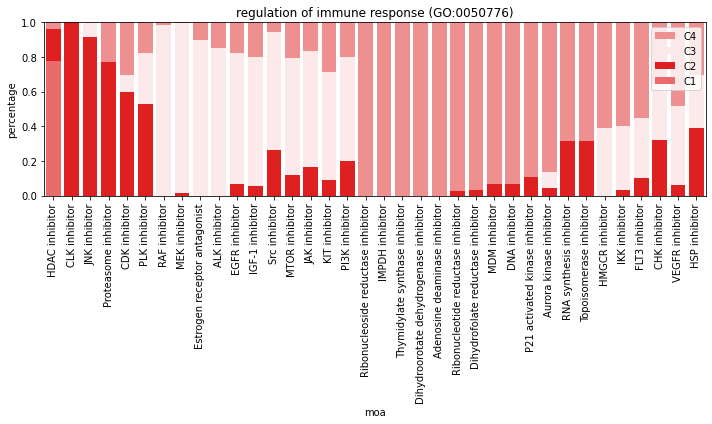

In [430]:
enrich_stack(stack_matrix=stacked_percent,
             order=cl_arrg,
             enrichment=df(gp_cons_signed_fdr.T['regulation of immune response (GO:0050776)']), 
             pathway='regulation of immune response (GO:0050776)',
             save_path=None)

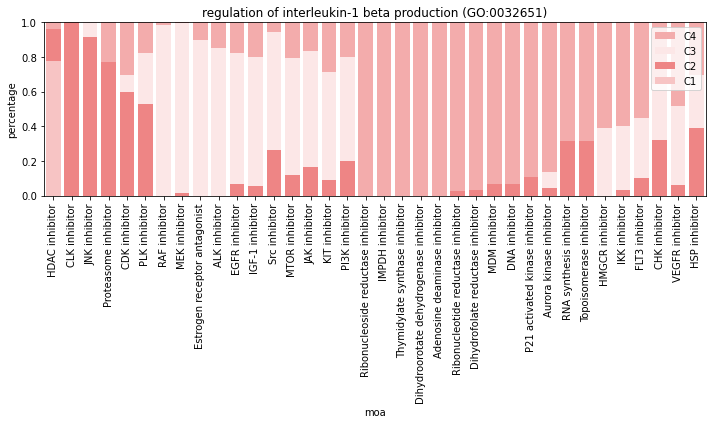

In [431]:
enrich_stack(stack_matrix=stacked_percent,
             order=cl_arrg,
             enrichment=df(gp_cons_signed_fdr.T['regulation of interleukin-1 beta production (GO:0032651)']), 
             pathway='regulation of interleukin-1 beta production (GO:0032651)',
             save_path=None)

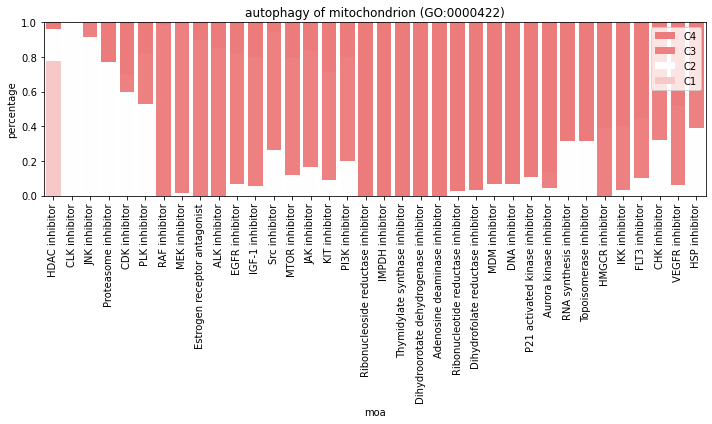

In [432]:
enrich_stack(stack_matrix=stacked_percent,
             order=cl_arrg,
             enrichment=df(gp_cons_signed_fdr.T['autophagy of mitochondrion (GO:0000422)']), 
             pathway='autophagy of mitochondrion (GO:0000422)',
             save_path=None)

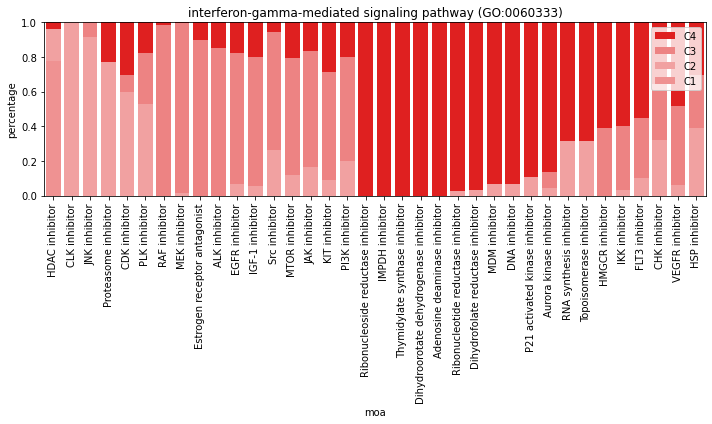

In [433]:
enrich_stack(stack_matrix=stacked_percent,
             order=cl_arrg,
             enrichment=df(gp_cons_signed_fdr.T['interferon-gamma-mediated signaling pathway (GO:0060333)']), 
             pathway='interferon-gamma-mediated signaling pathway (GO:0060333)',
             save_path=None)

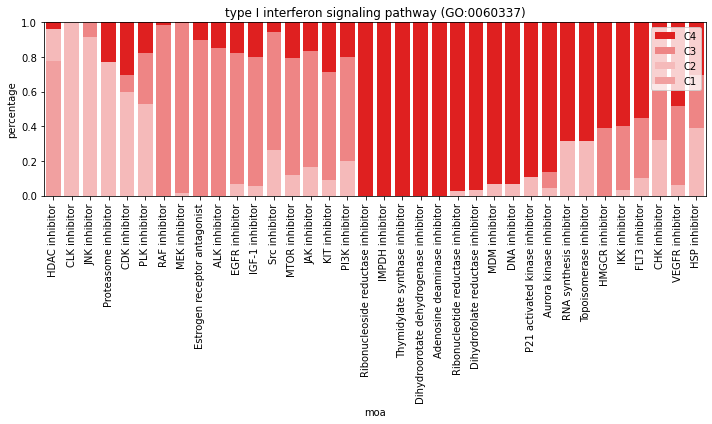

In [434]:
enrich_stack(stack_matrix=stacked_percent,
             order=cl_arrg,
             enrichment=df(gp_cons_signed_fdr.T['type I interferon signaling pathway (GO:0060337)']), 
             pathway='type I interferon signaling pathway (GO:0060337)',
             save_path=None)

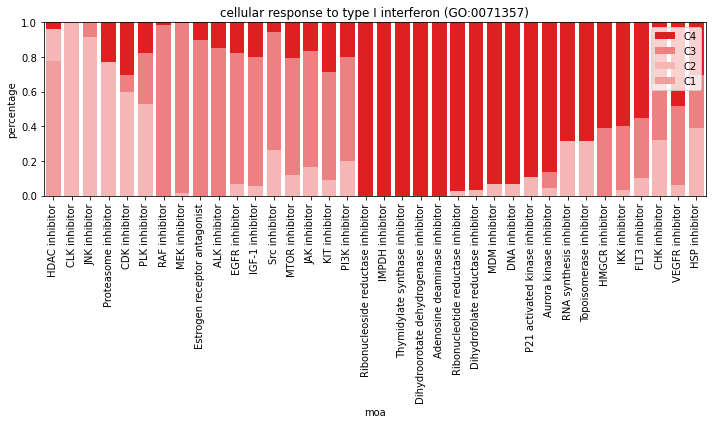

In [435]:
enrich_stack(stack_matrix=stacked_percent,
             order=cl_arrg,
             enrichment=df(gp_cons_signed_fdr.T['cellular response to type I interferon (GO:0071357)']), 
             pathway='cellular response to type I interferon (GO:0071357)',
             save_path=None)

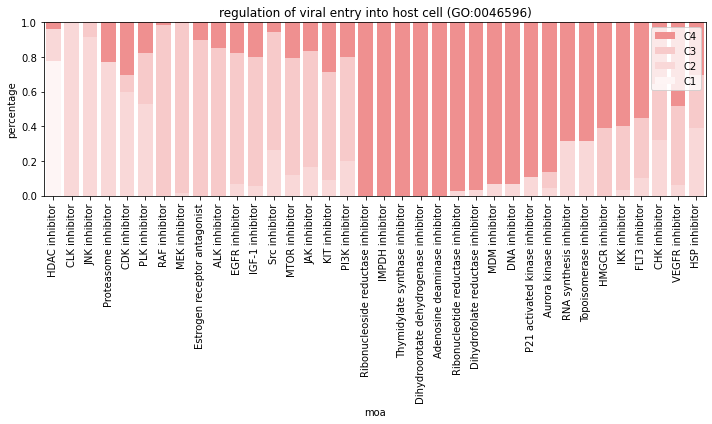

In [436]:
enrich_stack(stack_matrix=stacked_percent,
             order=cl_arrg,
             enrichment=df(gp_cons_signed_fdr.T['regulation of viral entry into host cell (GO:0046596)']), 
             pathway='regulation of viral entry into host cell (GO:0046596)',
             save_path=None)

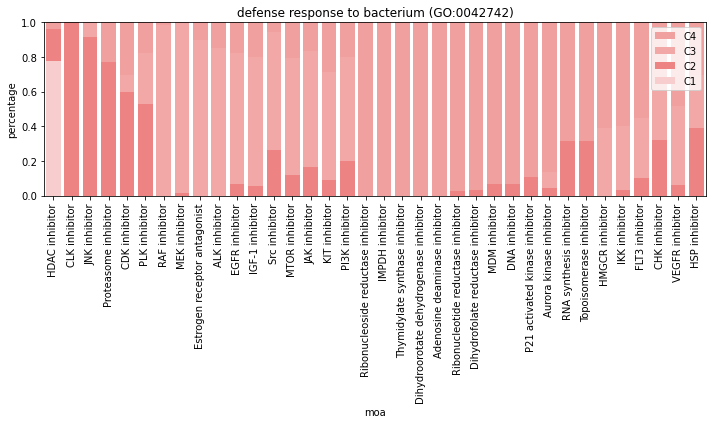

In [437]:
enrich_stack(stack_matrix=stacked_percent,
             order=cl_arrg,
             enrichment=df(gp_cons_signed_fdr.T['defense response to bacterium (GO:0042742)']), 
             pathway='defense response to bacterium (GO:0042742)',
             save_path=None)

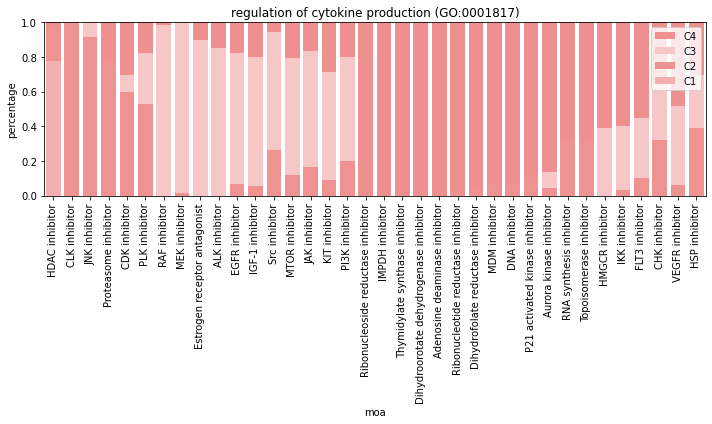

In [438]:
enrich_stack(stack_matrix=stacked_percent,
             order=cl_arrg,
             enrichment=df(gp_cons_signed_fdr.T['regulation of cytokine production (GO:0001817)']), 
             pathway='regulation of cytokine production (GO:0001817)',
             save_path=None)

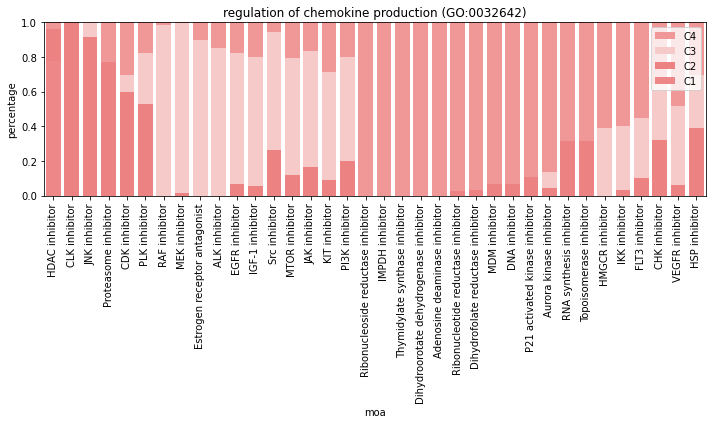

In [439]:
enrich_stack(stack_matrix=stacked_percent,
             order=cl_arrg,
             enrichment=df(gp_cons_signed_fdr.T['regulation of chemokine production (GO:0032642)']), 
             pathway='regulation of chemokine production (GO:0032642)',
             save_path=None)

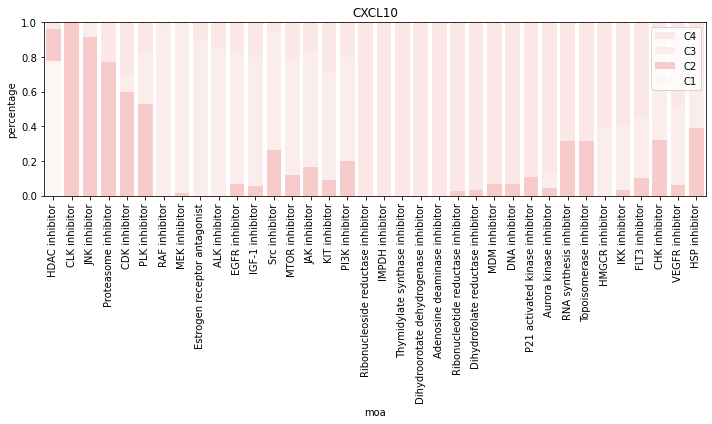

In [440]:
enrich_stack(stack_matrix=stacked_percent,
             order=cl_arrg,
             enrichment=df(g_cons_cluster.T['CXCL10']), 
             pathway='CXCL10',
             save_path=None)

In [464]:
df(g_cons_cluster.T['CXCL10'])

CXCL10
C1  0.121827
C2  0.696172
C3  0.238806
C4  0.308985

In [479]:
gp_cons_signed_fdr.sort_values(by='C2', ascending=False)[:10]

C1        C2  \
Term                                                                     
action potential (GO:0001508)                       1.000451  4.000000   
enzyme linked receptor protein signaling pathwa...  1.113255  4.000000   
inorganic cation transmembrane transport (GO:00...  1.616895  4.000000   
negative regulation of interleukin-10 productio...  0.747796  4.000000   
positive regulation of cytosolic calcium ion co...  0.936126  4.000000   
potassium ion transport (GO:0006813)                0.895308  4.000000   
membrane depolarization during action potential...  0.977180  4.000000   
sodium ion transmembrane transport (GO:0035725)     1.310836  3.680137   
potassium ion transmembrane transport (GO:0071805)  1.050654  3.532339   
regulation of immune response (GO:0050776)          1.985941  3.271277   

                                                          C3        C4  
Term                                                                    
action potential (GO:0001508)                       0.691281  0.814251  
enzyme linked receptor protein signaling pathwa...  0.388783  1.035551  
inorganic cation transmembrane transport (GO:00...  1.331720  1.492886  
negative regulation of interleukin-10 productio...  0.184043  0.813860  
positive regulation of cytosolic calcium ion co...  0.532982  1.064789  
potassium ion transport (GO:0006813)                0.730557  1.186479  
membrane depolarization during action potential...  0.549556  0.702891  
sodium ion transmembrane transport (GO:0035725)     1.026116  1.161212  
potassium ion transmembrane transport (GO:0071805)  0.722300  1.147854  
regulation of immune response (GO:0050776)          0.297862  1.484922

In [441]:
gp_cons_signed_fdr.sort_values(by='C3', ascending=False)[:10]

C1        C2  \
Term                                                                     
amyloid fibril formation (GO:1990000)               0.450220  0.050488   
fatty acid catabolic process (GO:0009062)           0.586413  0.607586   
autophagosome organization (GO:1905037)             1.036082 -0.072992   
negative regulation of cytokine production invo...  0.739749  1.652282   
cellular response to type I interferon (GO:0071...  1.289446  0.976123   
autophagy of mitochondrion (GO:0000422)             0.739052  0.016288   
fatty acid oxidation (GO:0019395)                   0.291956  0.387031   
fatty acid beta-oxidation (GO:0006635)              0.289757  0.474266   
autophagosome assembly (GO:0000045)                 0.782912 -0.113081   
interferon-gamma-mediated signaling pathway (GO...  1.475684  1.243213   

                                                          C3        C4  
Term                                                                    
amyloid fibril formation (GO:1990000)               4.000000  1.184128  
fatty acid catabolic process (GO:0009062)           2.750401  0.642822  
autophagosome organization (GO:1905037)             1.736205  1.359112  
negative regulation of cytokine production invo...  1.708875  1.282026  
cellular response to type I interferon (GO:0071...  1.703324  4.000000  
autophagy of mitochondrion (GO:0000422)             1.691832  1.779258  
fatty acid oxidation (GO:0019395)                   1.678509  0.438773  
fatty acid beta-oxidation (GO:0006635)              1.677108  0.702237  
autophagosome assembly (GO:0000045)                 1.668338  1.348898  
interferon-gamma-mediated signaling pathway (GO...  1.648683  4.000000

In [463]:
gp_cons_nes.sort_values(by='C4', ascending=False)[:20]

C1        C2  \
Term                                                                     
cellular response to type I interferon (GO:0071...  1.844035  1.561404   
type I interferon signaling pathway (GO:0060337)    1.832192  1.540363   
interferon-gamma-mediated signaling pathway (GO...  1.915089  1.688179   
cellular response to interferon-gamma (GO:0071346)  2.021998  1.700090   
regulation of extrinsic apoptotic signaling pat...  1.406219  0.767557   
regulation of inflammatory response (GO:0050727)    1.399802  1.648981   
autophagy of mitochondrion (GO:0000422)             1.456476  0.687763   
regulation of macrophage derived foam cell diff...  1.177940  1.283557   
negative regulation of cytokine production (GO:...  1.805777  1.892312   
cellular response to nutrient levels (GO:0031669)   1.796804  1.061685   
aminoglycan catabolic process (GO:0006026)          1.492040  1.690418   
positive regulation of peptidyl-tyrosine phosph...  1.441313  1.720954   
cholesterol efflux (GO:0033344)                     1.761153  1.130630   
mitochondrion disassembly (GO:0061726)              1.620702  0.748005   
negative regulation of extrinsic apoptotic sign...  0.964776  1.157583   
cation transport (GO:0006812)                       1.463461  2.079859   
negative regulation of extrinsic apoptotic sign...  1.359755  0.731640   
regulation of extrinsic apoptotic signaling pat... -1.194154  0.956922   
inorganic cation transmembrane transport (GO:00...  1.964285  2.292476   
cholesterol transport (GO:0030301)                  2.095321  1.292006   

                                                          C3        C4  
Term                                                                    
cellular response to type I interferon (GO:0071...  2.060601  2.511335  
type I interferon signaling pathway (GO:0060337)    2.091528  2.507897  
interferon-gamma-mediated signaling pathway (GO...  2.062179  2.443090  
cellular response to interferon-gamma (GO:0071346)  1.712332  2.369591  
regulation of extrinsic apoptotic signaling pat...  1.075939  2.114860  
regulation of inflammatory response (GO:0050727)    1.518820  2.086287  
autophagy of mitochondrion (GO:0000422)             2.044485  2.083026  
regulation of macrophage derived foam cell diff...  1.123536  2.043742  
negative regulation of cytokine production (GO:...  1.904064  2.041697  
cellular response to nutrient levels (GO:0031669)   1.750660  2.027873  
aminoglycan catabolic process (GO:0006026)          1.993986  2.023609  
positive regulation of peptidyl-tyrosine phosph...  1.322939  2.017475  
cholesterol efflux (GO:0033344)                     1.557410  2.014237  
mitochondrion disassembly (GO:0061726)              1.934774  2.013997  
negative regulation of extrinsic apoptotic sign...  1.073266  2.008158  
cation transport (GO:0006812)                       1.402498  1.989200  
negative regulation of extrinsic apoptotic sign...  0.880343  1.976617  
regulation of extrinsic apoptotic signaling pat...  1.520918  1.969755  
inorganic cation transmembrane transport (GO:00...  1.931667  1.967821  
cholesterol transport (GO:0030301)                  1.595815  1.966288

In [480]:
gp_cons_nes.sort_values(by='C1', ascending=False)[:20]

C1        C2  \
Term                                                                     
axonogenesis (GO:0007409)                           2.252653  1.527517   
intraciliary transport involved in cilium assem...  2.194853  1.009194   
synaptic vesicle exocytosis (GO:0016079)            2.190501  1.706707   
axon guidance (GO:0007411)                          2.190432  1.620691   
steroid biosynthetic process (GO:0006694)           2.171118  1.513047   
adenylate cyclase-modulating G protein-coupled ...  2.152141  2.022600   
protein localization to cilium (GO:0061512)         2.150936  1.422034   
synaptic vesicle endocytosis (GO:0048488)           2.136541  1.288375   
plasma membrane organization (GO:0007009)           2.134165  0.995339   
regulation of immune response (GO:0050776)          2.114531  2.226066   
carbohydrate homeostasis (GO:0033500)               2.099765  1.558852   
sterol biosynthetic process (GO:0016126)            2.097155 -0.715724   
cholesterol transport (GO:0030301)                  2.095321  1.292006   
cholesterol biosynthetic process (GO:0006695)       2.094661 -0.888593   
secondary alcohol biosynthetic process (GO:1902...  2.093098 -0.882941   
regulation of cardiac conduction (GO:1903779)       2.075751  1.768904   
receptor-mediated endocytosis (GO:0006898)          2.061756  1.631380   
ceramide biosynthetic process (GO:0046513)          2.035617  1.355435   
cholesterol metabolic process (GO:0008203)          2.022004  0.708155   
cellular response to interferon-gamma (GO:0071346)  2.021998  1.700090   

                                                          C3        C4  
Term                                                                    
axonogenesis (GO:0007409)                           1.417022  1.385949  
intraciliary transport involved in cilium assem...  1.974532  1.085297  
synaptic vesicle exocytosis (GO:0016079)            1.414265  1.552176  
axon guidance (GO:0007411)                          1.442414  1.711362  
steroid biosynthetic process (GO:0006694)           1.521095  1.056431  
adenylate cyclase-modulating G protein-coupled ...  1.448974  1.654315  
protein localization to cilium (GO:0061512)         1.615517  1.558030  
synaptic vesicle endocytosis (GO:0048488)           1.850711  1.333333  
plasma membrane organization (GO:0007009)           1.899042  1.638653  
regulation of immune response (GO:0050776)          1.182784  1.941896  
carbohydrate homeostasis (GO:0033500)               1.586694  1.663880  
sterol biosynthetic process (GO:0016126)            1.048521 -0.707559  
cholesterol transport (GO:0030301)                  1.595815  1.966288  
cholesterol biosynthetic process (GO:0006695)       0.976203 -0.798328  
secondary alcohol biosynthetic process (GO:1902...  1.053404 -0.919002  
regulation of cardiac conduction (GO:1903779)       1.368996  1.451084  
receptor-mediated endocytosis (GO:0006898)          1.302996  1.508137  
ceramide biosynthetic process (GO:0046513)          1.089310  1.376503  
cholesterol metabolic process (GO:0008203)          1.411003  1.527673  
cellular response to interferon-gamma (GO:0071346)  1.712332  2.369591

In [65]:
gp_cons_signed_fdr.sort_values(by='C1', ascending=False)[:20]

C1        C2  \
Term                                                                     
axonogenesis (GO:0007409)                           2.192857  0.900950   
axon guidance (GO:0007411)                          2.133044  1.105999   
steroid biosynthetic process (GO:0006694)           2.087131  0.872369   
protein localization to cilium (GO:0061512)         2.085220  0.701318   
plasma membrane organization (GO:0007009)           2.069615  0.155866   
synaptic vesicle endocytosis (GO:0048488)           2.041067  0.490931   
adenylate cyclase-modulating G protein-coupled ...  2.038562  2.215970   
secondary alcohol biosynthetic process (GO:1902...  2.020943 -0.129712   
synaptic vesicle exocytosis (GO:0016079)            2.009582  1.294567   
cholesterol biosynthetic process (GO:0006695)       1.999032 -0.135273   
regulation of immune response (GO:0050776)          1.985941  3.271277   
cholesterol transport (GO:0030301)                  1.967157  0.494901   
sterol biosynthetic process (GO:0016126)            1.948651 -0.023628   
regulation of cardiac conduction (GO:1903779)       1.937625  1.470438   
carbohydrate homeostasis (GO:0033500)               1.931993  0.973752   
receptor-mediated endocytosis (GO:0006898)          1.887688  1.130037   
intraciliary transport involved in cilium assem...  1.854144  0.166392   
ceramide biosynthetic process (GO:0046513)          1.744963  0.591546   
cellular response to interferon-gamma (GO:0071346)  1.697823  1.274184   
regulation of calcium ion transport (GO:0051924)    1.680963  1.510932   

                                                          C3        C4  
Term                                                                    
axonogenesis (GO:0007409)                           0.501422  0.626399  
axon guidance (GO:0007411)                          0.534055  1.020305  
steroid biosynthetic process (GO:0006694)           0.606372  0.254858  
protein localization to cilium (GO:0061512)         0.702858  0.848715  
plasma membrane organization (GO:0007009)           1.222572  0.940376  
synaptic vesicle endocytosis (GO:0048488)           1.116099  0.565246  
adenylate cyclase-modulating G protein-coupled ...  0.537083  0.962336  
secondary alcohol biosynthetic process (GO:1902...  0.198921 -0.134810  
synaptic vesicle exocytosis (GO:0016079)            0.497045  0.844039  
cholesterol biosynthetic process (GO:0006695)       0.144685 -0.043243  
regulation of immune response (GO:0050776)          0.297862  1.484922  
cholesterol transport (GO:0030301)                  0.698984  1.507034  
sterol biosynthetic process (GO:0016126)            0.195880 -0.005264  
regulation of cardiac conduction (GO:1903779)       0.454082  0.702708  
carbohydrate homeostasis (GO:0033500)               0.687207  0.969177  
receptor-mediated endocytosis (GO:0006898)          0.401335  0.791394  
intraciliary transport involved in cilium assem...  1.462545  0.284558  
ceramide biosynthetic process (GO:0046513)          0.224371  0.619606  
cellular response to interferon-gamma (GO:0071346)  0.845700  4.000000  
regulation of calcium ion transport (GO:0051924)    0.106553  0.633822

In [67]:
10 ** -1.98

0.010471285480508996

In [442]:
gp_cons_signed_fdr.sort_values(by='C4', ascending=False)[:10]

C1        C2  \
Term                                                                     
cellular response to type I interferon (GO:0071...  1.289446  0.976123   
interferon-gamma-mediated signaling pathway (GO...  1.475684  1.243213   
cellular response to interferon-gamma (GO:0071346)  1.697823  1.274184   
type I interferon signaling pathway (GO:0060337)    1.269994  0.933311   
regulation of extrinsic apoptotic signaling pat...  0.674991  0.038762   
autophagy of mitochondrion (GO:0000422)             0.739052  0.016288   
regulation of inflammatory response (GO:0050727)    0.663897  1.161529   
mitochondrion disassembly (GO:0061726)              0.951010  0.031898   
negative regulation of extrinsic apoptotic sign...  0.176818  0.317513   
negative regulation of cytokine production (GO:...  1.221096  1.813180   

                                                          C3        C4  
Term                                                                    
cellular response to type I interferon (GO:0071...  1.703324  4.000000  
interferon-gamma-mediated signaling pathway (GO...  1.648683  4.000000  
cellular response to interferon-gamma (GO:0071346)  0.845700  4.000000  
type I interferon signaling pathway (GO:0060337)    1.632765  4.000000  
regulation of extrinsic apoptotic signaling pat...  0.216484  1.875515  
autophagy of mitochondrion (GO:0000422)             1.691832  1.779258  
regulation of inflammatory response (GO:0050727)    0.607437  1.717458  
mitochondrion disassembly (GO:0061726)              1.330437  1.652604  
negative regulation of extrinsic apoptotic sign...  0.214347  1.646737  
negative regulation of cytokine production (GO:...  1.231911  1.630720

Text(0.5, 0, 'signed(-log10FDR) of C-stimulus-FA')

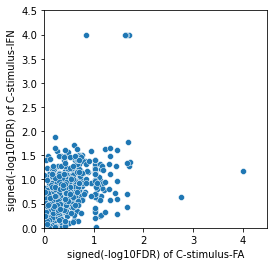

In [476]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x='C3', y='C4', data=gp_cons_signed_fdr)
plt.ylim(0, 4.5)
plt.xlim(0, 4.5)
plt.ylabel('signed(-log10FDR) of C-stimulus-IFN')
plt.xlabel('signed(-log10FDR) of C-stimulus-FA')

Text(0.5, 0, 'signed(-log10FDR) of C-immune-HDAC')

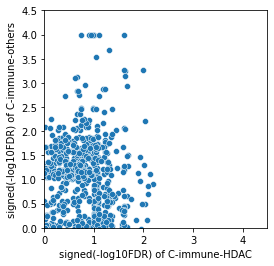

In [477]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x='C1', y='C2', data=gp_cons_signed_fdr)
plt.ylim(0, 4.5)
plt.xlim(0, 4.5)
plt.ylabel('signed(-log10FDR) of C-immune-others')
plt.xlabel('signed(-log10FDR) of C-immune-HDAC')

In [548]:
def pathway_bubble(merged_signP, merged_nes, c1, c2, save_path=None):
    
    # add NR difference
    merged_signP['NES_diff'] = merged_nes.loc[merged_signP.index, c2] - merged_nes.loc[merged_signP.index, c1]
    merged_signP['signP_diff'] = merged_signP[c2] - merged_signP[c1]
    
    f, ax = plt.subplots(figsize=(4, 4))
    tmp = merged_signP[merged_signP[c2] > 0]
    tmp = tmp[tmp[c1] > 0]
    ax.scatter(x=tmp[c1], y=tmp[c2],
               s=abs(tmp['signP_diff']) * 100, linewidths=0.5, edgecolors='k',
               c=tmp['NES_diff'], cmap=plt.cm.Spectral, vmin=-1, vmax=1, alpha=0.8)

    for g in tmp[tmp['signP_diff'] >= 2].index:
            plt.text(x=tmp.loc[g, c1] + 0.1, y=tmp.loc[g, c2] + 0.1, s=g, fontsize=12, c='b')
    for g in tmp[tmp['signP_diff'] <= -2].index:
            plt.text(x=tmp.loc[g, c1] + 0.1, y=tmp.loc[g, c2] + 0.1, s=g, fontsize=12, c='r')
    for g in tmp[abs(tmp['signP_diff']) <= 0.2].index:
        if tmp.loc[g, c1] >= -np.log10(0.05):
            plt.text(x=tmp.loc[g, c1] + 0.1, y=tmp.loc[g, c2] + 0.1, s=g, fontsize=12, c='k')

    plt.ylim(0.5, 4.5)
    plt.xlim(0.5, 4.5)
    plt.xlabel('signed(-log10FDR) of ' + c1)
    plt.ylabel('signed(-log10FDR) of ' + c2)
    ax.axline((1, 1), slope=1, ls='--', c='k')
    plt.yticks(rotation=90)
    fig = plt.gcf()
    
    if save_path is not None:
        fig.savefig(panel_home + save_path + '.png', dpi=300, transparent=True)
        fig.savefig(panel_home + save_path + '.pdf', transparent=True)
    
    return

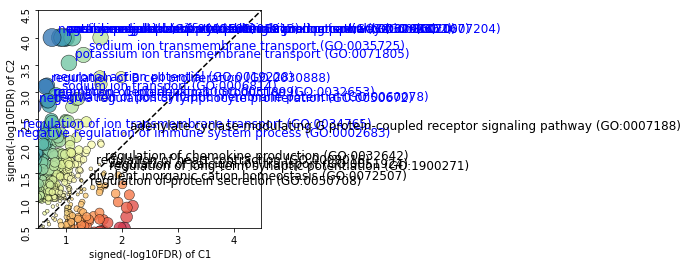

In [549]:
pathway_bubble(merged_signP=gp_cons_signed_fdr, merged_nes=gp_cons_nes,
               c1='C1', c2='C2', save_path='sub_super_C1')

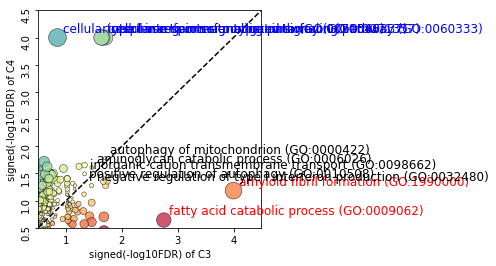

In [550]:
pathway_bubble(merged_signP=gp_cons_signed_fdr, merged_nes=gp_cons_nes,
               c1='C3', c2='C4', save_path='sub_super_C2')

# Super cluster

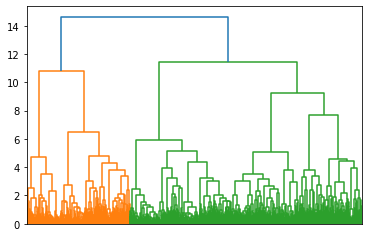

In [58]:
# super cluster
hierarchy.set_link_color_palette(None)
dend_super = dendrogram(linkage(distanceMatrix_1, method='ward'), 
                  color_threshold=12,
                  no_labels=True,
                  leaf_font_size=1)

In [59]:
# genes that show consensus induction and consensus suppression in each clusters
g_cons_super = df(index=ec_hi_indicator.index, columns=['super_C' + str(i + 1) for i in range(2)])
for c in ec_hind_cluster_super['cluster'].unique():
    tmp_c = ec_hind_cluster_super[ec_hind_cluster_super['cluster'] == c].index
    tmp_g_indicator = ec_hi_indicator[tmp_c]
    g_cons_super[c] = tmp_g_indicator.sum(axis=1) / len(tmp_c)

In [60]:
g_cons_super

super_C1  super_C2
KLHL21   0.034959  0.127134
MMP1     0.718699  0.156920
RGS2     0.352846  0.011987
INSIG1   0.369919  0.053760
HSPA1A   0.125203 -0.156556
...           ...       ...
ACAT2    0.013821 -0.251362
ELAC2   -0.459350 -0.450054
C2CD5   -0.843089 -0.091900
PLK1    -0.845528 -0.883763
SUV39H1 -0.711382 -0.810389

[10174 rows x 2 columns]

In [61]:
# pathway enrichment
gp_cons_nes_super = df(columns=g_cons_super.columns)
gp_cons_fdr_super = df(columns=g_cons_super.columns)
for c in g_cons_super.columns:
    tmp_result = gp.prerank(df(g_cons_super[c]).sort_values(by=c, ascending=False),
                            gene_sets='GO_Biological_Process_2021',
                            processes=16,
                            permutation_num=1000,
                            outdir=None, seed=0, min_size=10, max_size=200)
    gp_cons_nes_super[c] = tmp_result.res2d['nes']
    gp_cons_fdr_super[c] = tmp_result.res2d['fdr']

In [360]:
gp_cons_nes_super.to_csv(panel_home + 'super_go_process_nes_0.7_shift.csv', sep=',')
gp_cons_fdr_super.to_csv(panel_home + 'super_go_process_fdr_0.7_shift.csv', sep=',')

In [197]:
gp_cons_nes_super = pd.read_csv(panel_home + 'super_go_process_nes_0.7_shift.csv', header=0, index_col=0, sep=',')
gp_cons_fdr_super = pd.read_csv(panel_home + 'super_go_process_fdr_0.7_shift.csv', header=0, index_col=0, sep=',')

In [361]:
gp_cons_nes_super

super_C1  super_C2
Term                                                                  
DNA duplex unwinding (GO:0032508)                  -2.637314 -2.550686
DNA geometric change (GO:0032392)                  -2.659314 -2.468236
DNA replication (GO:0006260)                       -3.590394 -3.464459
DNA replication initiation (GO:0006270)            -2.956612 -3.336830
DNA replication-independent nucleosome assembly... -2.701325 -2.762367
...                                                      ...       ...
contractile actin filament bundle assembly (GO:... -0.481170  0.475431
morphogenesis of an epithelium (GO:0002009)        -0.443242  0.686531
stress fiber assembly (GO:0043149)                 -0.473494  0.483468
regulation of lamellipodium morphogenesis (GO:2... -0.479579  0.716446
neuron apoptotic process (GO:0051402)              -0.493946 -0.712857

[3019 rows x 2 columns]

In [365]:
gp_cons_fdr_super_sig = gp_cons_fdr_super[gp_cons_fdr_super < 0.1].dropna(axis=0, how='all')
print(gp_cons_fdr_super_sig.shape)

gp_cons_nes_super_sig = gp_cons_nes_super[abs(gp_cons_nes_super) > 1.5].dropna(axis=0, how='all')
print(gp_cons_nes_super_sig.shape)

merge_sig_super = list(set(gp_cons_fdr_super_sig.index) & set(gp_cons_nes_super_sig.index))
print(len(merge_sig_super))

(1055, 2)
(1295, 2)
1045


In [199]:
gp_cons_signed_fdr_super = -np.sign(gp_cons_nes_super) * np.log10(gp_cons_fdr_super + 1e-4)

In [201]:
gp_cons_signed_fdr_super.to_csv(panel_home + 'super_go_process_signedlogfdr_0.7_shift.csv',sep=',')

Text(0.5, 0, 'signed(-log10FDR) of major C1')

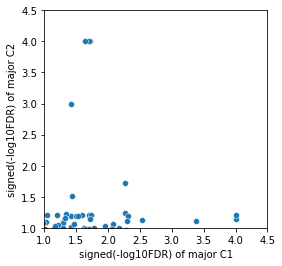

In [473]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x='super_C1', y='super_C2', data=gp_cons_signed_fdr_super)
plt.ylim(1, 4.5)
plt.xlim(1, 4.5)
plt.ylabel('signed(-log10FDR) of major C2')
plt.xlabel('signed(-log10FDR) of major C1')

In [494]:
# add NR difference
gp_cons_signed_fdr_super['NES_diff'] = gp_cons_nes_super.loc[merge_sig_super, 'super_C2'] - gp_cons_nes_super.loc[merge_sig_super, 'super_C1']
gp_cons_signed_fdr_super['signP_diff'] = gp_cons_signed_fdr_super['super_C2'] - gp_cons_signed_fdr_super['super_C1']

In [514]:
gp_cons_signed_fdr_super.sort_values(by='signP_diff')[-10:]

super_C1  super_C2  \
Term                                                                     
cellular response to type I interferon (GO:0071...  1.718004  4.000000   
type I interferon signaling pathway (GO:0060337)    1.702398  4.000000   
posttranscriptional regulation of gene expressi... -3.428921 -1.124512   
interferon-gamma-mediated signaling pathway (GO...  1.640278  4.000000   
histone H4-K8 acetylation (GO:0043982)             -2.577934 -0.165407   
regulation of RNA metabolic process (GO:0051252)   -3.459877 -1.010191   
histone H4-K5 acetylation (GO:0043981)             -2.701308 -0.182233   
regulation of alternative mRNA splicing, via sp... -3.520315 -0.915937   
histone H4-K16 acetylation (GO:0043984)            -3.148846 -0.228022   
production of miRNAs involved in gene silencing... -3.733164 -0.734663   

                                                    NES_diff  signP_diff  
Term                                                                      
cellular response to type I interferon (GO:0071...  0.463414    2.281996  
type I interferon signaling pathway (GO:0060337)    0.466863    2.297602  
posttranscriptional regulation of gene expressi...  0.837148    2.304409  
interferon-gamma-mediated signaling pathway (GO...  0.532746    2.359722  
histone H4-K8 acetylation (GO:0043982)              1.162625    2.412526  
regulation of RNA metabolic process (GO:0051252)    0.899400    2.449686  
histone H4-K5 acetylation (GO:0043981)              1.183665    2.519075  
regulation of alternative mRNA splicing, via sp...  0.969160    2.604378  
histone H4-K16 acetylation (GO:0043984)             1.282297    2.920824  
production of miRNAs involved in gene silencing...  1.108760    2.998501

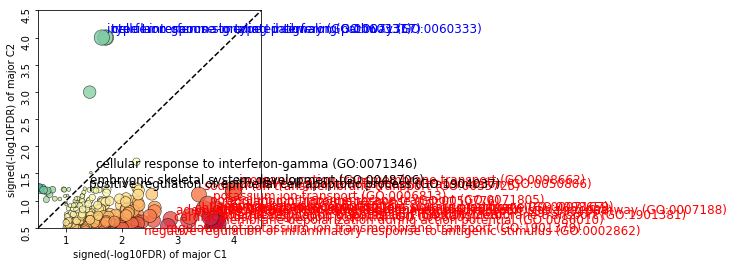

In [551]:
f, ax = plt.subplots(figsize=(4, 4))
tmp = gp_cons_signed_fdr_super[gp_cons_signed_fdr_super['super_C2'] > 0]
tmp = tmp[tmp['super_C1'] > 0]
ax.scatter(x=tmp['super_C1'], y=tmp['super_C2'],
           s=abs(tmp['signP_diff']) * 100, linewidths=0.5, edgecolors='k',
           c=tmp['NES_diff'], cmap=plt.cm.Spectral, vmin=-1, vmax=1, alpha=0.8)

for g in tmp[tmp['signP_diff'] >= 2].index:
    plt.text(x=tmp.loc[g, 'super_C1'] + 0.1, y=tmp.loc[g, 'super_C2'] + 0.1, s=g, fontsize=12, c='b')
for g in tmp[tmp['signP_diff'] <= -2].index:
    plt.text(x=tmp.loc[g, 'super_C1'] + 0.1, y=tmp.loc[g, 'super_C2'] + 0.1, s=g, fontsize=12, c='r')
for g in tmp[abs(tmp['signP_diff']) <= 0.2].index:
    if tmp.loc[g, 'super_C1'] >= -np.log10(0.05):
        plt.text(x=tmp.loc[g, 'super_C1'] + 0.1, y=tmp.loc[g, 'super_C2'] + 0.1, s=g, fontsize=12, c='k')

plt.ylim(0.5, 4.5)
plt.xlim(0.5, 4.5)
plt.xlabel('signed(-log10FDR) of major C1')
plt.ylabel('signed(-log10FDR) of major C2')
ax.axline((1, 1), slope=1, ls='--', c='k')
plt.yticks(rotation=90)
fig = plt.gcf()
fig.savefig(panel_home + 'super_cluster_bubble.png', dpi=300, transparent=True)
fig.savefig(panel_home + 'super_cluster_bubble.pdf', transparent=True)

In [467]:
gp_cons_signed_fdr_super.sort_values(by='super_C1', ascending=False)[:50]

super_C1  super_C2
Term                                                                  
inorganic cation transmembrane transport (GO:00...  4.000000  1.213833
positive regulation of synaptic transmission (G...  4.000000  1.148653
inorganic cation import across plasma membrane ...  3.729635  0.720259
chemical synaptic transmission (GO:0007268)         3.709962  0.580373
regulation of immune response (GO:0050776)          3.687067  0.840094
positive regulation of potassium ion transmembr...  3.660048  0.584251
membrane depolarization during action potential...  3.627610  0.484530
enzyme linked receptor protein signaling pathwa...  3.608789  0.721034
action potential (GO:0001508)                       3.587815  0.747562
anterograde trans-synaptic signaling (GO:0098916)   3.587815  0.696520
potassium ion transport (GO:0006813)                3.537597  0.935489
potassium ion transmembrane transport (GO:0071805)  3.471721  0.848467
sodium ion transmembrane transport (GO:0035725)     3.380206  1.112513
chloride transport (GO:0006821)                     3.217044  0.709909
positive regulation of cation transmembrane tra...  3.191879  0.644839
adenylate cyclase-modulating G protein-coupled ...  2.870666  0.663842
cardiac muscle cell action potential (GO:0086001)   2.824754  0.533604
regulation of potassium ion transmembrane trans...  2.687651  0.337197
sodium ion transport (GO:0006814)                   2.587013  0.870532
positive regulation of cytosolic calcium ion co...  2.585020  0.801635
long-term synaptic potentiation (GO:0060291)        2.566623  0.635333
cell-cell adhesion via plasma-membrane adhesion...  2.536575  1.118565
neuronal action potential (GO:0019228)              2.500784  0.719316
potassium ion import across plasma membrane (GO...  2.362962  0.613835
regulation of cytokine production involved in i...  2.307756  1.193005
positive regulation of phagocytosis (GO:0050766)    2.307498  0.916246
negative regulation of inflammatory response to...  2.298777  0.282589
metal ion homeostasis (GO:0055065)                  2.290897  1.111785
positive regulation of potassium ion transport ...  2.290299  0.393152
membrane depolarization (GO:0051899)                2.288449  0.581010
glycosaminoglycan catabolic process (GO:0006027)    2.287734  0.967241
inflammatory response (GO:0006954)                  2.284369  0.903842
positive regulation of ERK1 and ERK2 cascade (G...  2.284129  0.601166
regulation of interleukin-6 production (GO:0032...  2.283126  0.744959
vasculature development (GO:0001944)                2.282510  0.426482
negative regulation of inflammatory response (G...  2.278940  0.557688
regulation of long-term synaptic potentiation (...  2.273673  0.634901
oligosaccharide metabolic process (GO:0009311)      2.270365  1.232682
icosanoid metabolic process (GO:0006690)            2.260211  1.716711
negative regulation of B cell activation (GO:00...  2.219552  0.563812
regulation of inflammatory response to antigeni...  2.210676  0.240788
calcium ion transport (GO:0006816)                  2.205521  0.814334
cardiac muscle cell action potential involved i...  2.201615  0.427379
modulation of chemical synaptic transmission (G...  2.200887  0.579873
positive regulation of MAPK cascade (GO:0043410)    2.181693  0.577830
axon guidance (GO:0007411)                          2.175813  0.859146
membrane depolarization during cardiac muscle c...  2.173298  0.507299
regulation of cytokine production (GO:0001817)      2.168039  0.998237
chloride transmembrane transport (GO:1902476)       2.160823  0.321919
T cell activation involved in immune response (...  2.140595  0.279675

In [460]:
10 ** (-2.75)

0.0017782794100389228

In [448]:
gp_cons_nes_super.sort_values(by='super_C1', ascending=False)[:10]

super_C1  super_C2
Term                                                                  
inorganic cation transmembrane transport (GO:00...  2.504751  1.863847
positive regulation of synaptic transmission (G...  2.446148  1.843280
sodium ion transmembrane transport (GO:0035725)     2.392980  1.828419
potassium ion transmembrane transport (GO:0071805)  2.376346  1.659689
potassium ion transport (GO:0006813)                2.375339  1.722285
anterograde trans-synaptic signaling (GO:0098916)   2.366947  1.509461
membrane depolarization during action potential...  2.366361  1.316524
positive regulation of potassium ion transmembr...  2.357281  1.408844
regulation of immune response (GO:0050776)          2.330109  1.644857
chemical synaptic transmission (GO:0007268)         2.321288  1.398139

In [373]:
gp_cons_signed_fdr_super.sort_values(by='super_C2', ascending=False)[:10]

super_C1  super_C2
Term                                                                  
cellular response to type I interferon (GO:0071...  1.718004  4.000000
type I interferon signaling pathway (GO:0060337)    1.702398  4.000000
interferon-gamma-mediated signaling pathway (GO...  1.640278  4.000000
aminoglycan catabolic process (GO:0006026)          1.422435  2.995895
autophagosome assembly (GO:0000045)                 0.097827  1.841353
autophagosome organization (GO:1905037)             0.198066  1.752429
icosanoid metabolic process (GO:0006690)            2.260211  1.716711
amyloid fibril formation (GO:1990000)               0.047684  1.706066
autophagy of mitochondrion (GO:0000422)             0.192136  1.587785
cellular response to interferon-gamma (GO:0071346)  1.443676  1.515162

In [141]:
gp_cons_signed_fdr_super.sort_values(by='super_C1', ascending=False)[:10]

NameError: name 'gp_cons_signed_fdr_super' is not defined

In [461]:
gp_cons_nes_super.sort_values(by='super_C2', ascending=False)[:20]

super_C1  super_C2
Term                                                                  
interferon-gamma-mediated signaling pathway (GO...  1.834696  2.367442
cellular response to type I interferon (GO:0071...  1.872998  2.336412
type I interferon signaling pathway (GO:0060337)    1.865551  2.332413
aminoglycan catabolic process (GO:0006026)          1.751631  2.247389
autophagosome assembly (GO:0000045)                 0.878475  2.101852
autophagosome organization (GO:1905037)             1.014397  2.081319
amyloid fibril formation (GO:1990000)               0.778015  2.065151
icosanoid metabolic process (GO:0006690)            2.051445  2.058480
autophagy of mitochondrion (GO:0000422)             1.006358  2.037887
cellular response to interferon-gamma (GO:0071346)  1.761044  2.020545
fatty acid beta-oxidation using acyl-CoA oxidas...  1.033404  2.008546
mitochondrion disassembly (GO:0061726)              1.194516  1.987824
intra-Golgi vesicle-mediated transport (GO:0006...  0.680973  1.984926
regulation of autophagosome assembly (GO:2000785)   0.667877  1.979443
amyloid precursor protein catabolic process (GO...  0.860397  1.957312
negative regulation of cytokine production (GO:...  1.865261  1.936436
oligosaccharide metabolic process (GO:0009311)      2.051185  1.936296
cellular response to nutrient levels (GO:0031669)   1.325401  1.931241
negative regulation of type I interferon produc...  1.281702  1.929359
positive regulation of autophagy (GO:0010508)       0.923431  1.916083

In [375]:
# super C1: direct regulation of immune response
# super C2: autophagy and stimulus response

In [376]:
# super C1: immune-HDAC, immune-others
# super C2: autophagy-fatty, autophagy-IFN

In [62]:
# pathway enrichment on pure immune sets
gp_cons_nes_im = df(columns=g_cons_cluster.columns)
gp_cons_fdr_im = df(columns=g_cons_cluster.columns)
for c in g_cons_cluster.columns:
    tmp_result = gp.prerank(df(g_cons_cluster[c]).sort_values(by=c, ascending=False),
                            gene_sets=gsea_home + 'gene_sets/WolfEtAl_71_Symbols.gmt',
                            processes=16,
                            permutation_num=1000,
                            outdir=None, seed=0, min_size=5, max_size=200)
    gp_cons_nes_im[c] = tmp_result.res2d['nes']
    gp_cons_fdr_im[c] = tmp_result.res2d['fdr']

In [73]:
# pathway enrichment: super cluster
gp_cons_nes_super_im = df(columns=g_cons_super.columns)
gp_cons_fdr_super_im = df(columns=g_cons_super.columns)
for c in g_cons_super.columns:
    tmp_result = gp.prerank(df(g_cons_super[c]).sort_values(by=c, ascending=False),
                            gene_sets=gsea_home + 'gene_sets/WolfEtAl_71_Symbols.gmt',
                            processes=16,
                            permutation_num=1000,
                            outdir=None, seed=0, min_size=10, max_size=200)
    gp_cons_nes_super_im[c] = tmp_result.res2d['nes']
    gp_cons_fdr_super_im[c] = tmp_result.res2d['fdr']

In [74]:
gp_cons_signed_fdr_super_im = -np.sign(gp_cons_nes_super_im) * np.log10(gp_cons_fdr_super_im + 1e-4)

In [75]:
gp_cons_signed_fdr_super_im

super_C1  super_C2
Term                                               
CHANG_CORE_SERUM_RESPONSE_UP    -4.000000 -4.000000
CSF1_response                    4.000000  2.541072
Immune_cell_Cluster_21214954     4.000000  2.928150
KEGG_HEMATOPOIETIC_CELL_LINEAGE  4.000000  1.791789
LCK_19272155                     4.000000  0.947456
Module11_Prolif_score           -4.000000 -4.000000
Module4_TcellBcell_score         4.000000  0.640977
Module5_TcellBcell_score         4.000000  1.452980
STAT1_score                      3.659751  2.855147
Tcell_21978456                   3.634300  0.412429
T_cell_PCA_16704732              3.604451  0.720808
Immune_NSCLC_score               3.568862  2.881106
TAMsurr_TcClassII_ratio          3.500059  1.652900
Bcell_receptors_score            3.400931  0.582988
CD103neg_mean_25446897           3.253900  1.303569
LIexpression_score               3.158322  0.825449
TcClassII_score                  3.049305  1.414033
LYMPHS_PCA_16704732             -2.316092 -0.809628
Module3_IFN_score                2.055779  3.193849
Minterferon_Cluster_21214954     2.001660  4.000000
Troester_WoundSig_19887484       1.821172  0.714053
IL2_score_21050467               1.798222  0.081275
CD8_PCA_16704732                 1.784983  0.274068
MCD3_CD8_21214954                1.782623  0.268964
Interferon_19272155              1.686480  2.503450
Interferon_Cluster_21214954      1.243596  4.000000
IL12_score_21050467              1.232105  0.634720
MHC.II_19272155                  1.216172  1.411779
ZHANG_INTERFERON_RESPONSE        1.185913  2.181808
MDACC.FNA.1_20805453             1.153886  0.368984
IFN_21978456                     1.123706  2.061215
TGFB_PCA_17349583                1.119273  0.587024
TGFB_score_21050467              0.645485  0.351037
IL4_score_21050467               0.628528  0.413222
IFNG_score_21050467              0.117030  1.283737
Rotterdam_ERneg_PCA_15721472     0.084292  0.384239

In [76]:
# read pathway
immune_class = pd.read_csv(data_home + 'immuneSig/signature_class.csv', header=0, index_col=0, sep=',')
print(immune_class.head())

                                class
signatures                           
MHC1_21978456    Antigen Presentation
MHC2_21978456    Antigen Presentation
MHC.I_19272155   Antigen Presentation
MHC.II_19272155  Antigen Presentation
PD1_data                  Check Point


In [77]:
super_fdr_annot = gp_cons_signed_fdr_super_im.copy()
super_fdr_annot['class'] = immune_class['class']

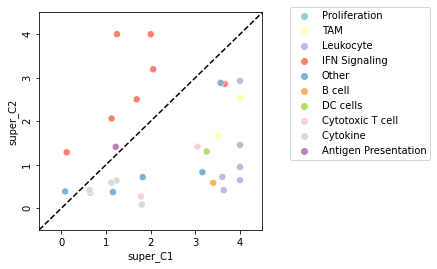

In [107]:
f, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='super_C1', y='super_C2', hue='class', data=super_fdr_annot, s=50, palette='Set3')
ax.axline((1, 1), slope=1, ls='--', c='k')
plt.ylim(-.5, 4.5)
plt.xlim(-.5, 4.5)
plt.yticks(rotation=90)
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [63]:
gp_cons_signed_fdr_im = -np.sign(gp_cons_nes_im) * np.log10(gp_cons_fdr_im + 1e-4)

In [64]:
gp_cons_signed_fdr_im

C1        C2        C3        C4
Term                                                                   
CHANG_CORE_SERUM_RESPONSE_UP    -4.000000 -4.000000 -4.000000 -4.000000
CSF1_response                    4.000000  4.000000  0.946857  4.000000
Immune_cell_Cluster_21214954     4.000000  4.000000  1.765054  4.000000
KEGG_HEMATOPOIETIC_CELL_LINEAGE  4.000000  4.000000  0.438491  2.639189
LCK_19272155                     4.000000  4.000000  0.181845  2.450703
Module11_Prolif_score           -4.000000 -4.000000 -4.000000 -4.000000
Module4_TcellBcell_score         4.000000  4.000000  0.008483  2.153990
STAT1_score                      4.000000  4.000000  1.685875  3.426672
T_cell_PCA_16704732              4.000000  1.396369  0.374958  1.314097
Immune_NSCLC_score               2.802688  2.972244  1.867239  1.908515
Module3_IFN_score                2.136490  2.464365  2.708029  4.000000
TcClassII_score                  2.133764  2.209804  0.382230  1.550139
MCD3_CD8_21214954                2.119607  1.583926  0.552916  0.000043
CD103neg_mean_25446897           2.055015  1.494027  0.665394  0.948532
IL12_score_21050467              1.985280  2.040197  0.053625  0.855793
Interferon_19272155              1.937807  0.988023  1.692215  2.469452
Module5_TcellBcell_score         1.936902  4.000000  0.288192  3.093889
STAT1_19272155                   1.932179  1.643308  0.451369  1.358845
TAMsurr_TcClassII_ratio          1.924420  2.979459  0.368037  1.899872
LIexpression_score               1.838214  3.013498  0.254550  0.943377
IFN_21978456                     1.829612  0.900602  1.494743  2.426488
Bcell_receptors_score            1.826299  2.768265  0.167569  0.787839
Interferon_Cluster_21214954      1.825316  0.888546  4.000000  4.000000
Tcell_21978456                   1.786605  3.059086  0.060790  1.110816
Minterferon_Cluster_21214954     1.639613  2.437128  4.000000  4.000000
MHC.II_19272155                  1.621208  1.185203  0.874640  1.557171
MHC1_21978456                    1.430379  0.917587  0.938369  2.487379
ZHANG_INTERFERON_RESPONSE        1.237527  0.812504  1.835708  3.144247
LYMPHS_PCA_16704732             -1.206555 -1.882668 -0.235406 -1.017841
CD8_PCA_16704732                 1.095440  1.373515 -0.002534  1.268756
IR7_score                        1.084680  0.981529  0.484218  0.360085
IL2_score_21050467               0.995351  1.412784  0.000043  0.728247
MHC2_21978456                    0.993399  0.838039  0.619344  0.946813
TGFB_score_21050467              0.992508  0.832989  0.057403  0.986373
MDACC.FNA.1_20805453             0.929464  0.820408  0.655606  0.077077
TGFB_PCA_17349583                0.880421  1.299493  0.049234  0.502051
IGG_Cluster_21214954             0.490280  0.824228  0.119248  0.809769
IL4_score_21050467               0.408172  0.835378  0.170498  1.073690
Troester_WoundSig_19887484       0.331700  2.601853  0.185182  1.442818
IFNG_score_21050467              0.329764  0.230129  0.554030  2.513789
Chemokine12_score                0.036886  2.941849 -0.099895  0.689241
IL13_score_21050467              0.017644  0.446918  0.068653  0.776348
Rotterdam_ERneg_PCA_15721472     0.011943  0.358196  0.467834  0.056474
CD103pos_mean_25446897          -0.000018  0.804471 -0.160283 -0.005168
Buck14_score                     0.000043  0.402820  0.170352  0.358924

In [66]:
gp_cons_signed_fdr_im_annot = gp_cons_signed_fdr_im.copy()
gp_cons_signed_fdr_im_annot['class'] = immune_class['class']

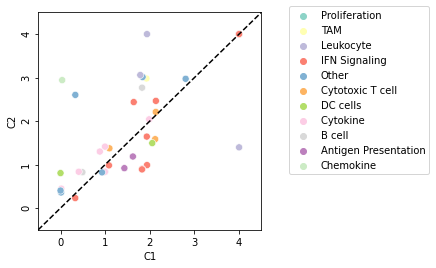

In [108]:
f, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='C1', y='C2', hue='class', data=gp_cons_signed_fdr_im_annot, s=50, palette='Set3')
ax.axline((1, 1), slope=1, ls='--', c='k')
plt.ylim(-.5, 4.5)
plt.xlim(-.5, 4.5)
plt.yticks(rotation=90)
ax.legend(bbox_to_anchor=(1.1, 1.05))

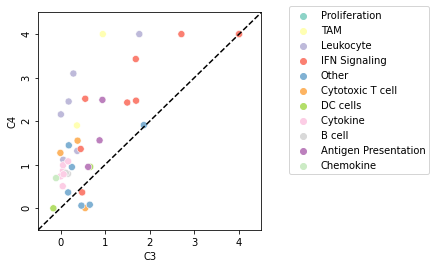

In [109]:
f, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='C3', y='C4', hue='class', data=gp_cons_signed_fdr_im_annot, s=50, palette='Set3')
ax.axline((1, 1), slope=1, ls='--', c='k')
plt.ylim(-.5, 4.5)
plt.xlim(-.5, 4.5)
plt.yticks(rotation=90)
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [110]:
immune_class[immune_class['class'] == 'Leukocyte']

class
signatures                             
Tcell_21978456                Leukocyte
LCK_19272155                  Leukocyte
Immune_cell_Cluster_21214954  Leukocyte
LYMPHS_PCA_16704732           Leukocyte
T_cell_PCA_16704732           Leukocyte
Module4_TcellBcell_score      Leukocyte
Module5_TcellBcell_score      Leukocyte
GP2_ImmuneTcellBcell_score    Leukocyte
Tcell_receptors_score         Leukocyte

In [112]:
immune_class[immune_class['class'] == 'IFN Signaling']

class
signatures                                 
STAT1_score                   IFN Signaling
IFNG_score_21050467           IFN Signaling
IFN_21978456                  IFN Signaling
Interferon_19272155           IFN Signaling
STAT1_19272155                IFN Signaling
Interferon_Cluster_21214954   IFN Signaling
IR7_score                     IFN Signaling
Module3_IFN_score             IFN Signaling
GP11_Immune_IFN               IFN Signaling
Minterferon_Cluster_21214954  IFN Signaling

In [116]:
immune_class[immune_class['class'] == 'TAM']

class
signatures                   
CSF1_response             TAM
TAMsurr_score             TAM
TAMsurr_TcClassII_ratio   TAM

(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

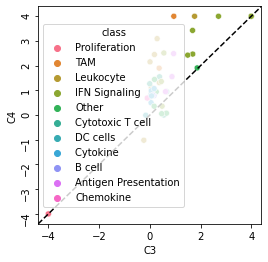

In [84]:
f, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='C3', y='C4', hue='class', data=gp_cons_signed_fdr_im_annot)
ax.axline((1, 1), slope=1, ls='--', c='k')
plt.yticks(rotation=90)

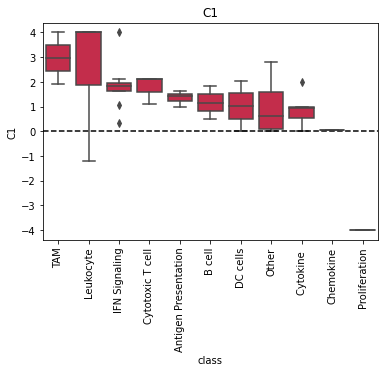

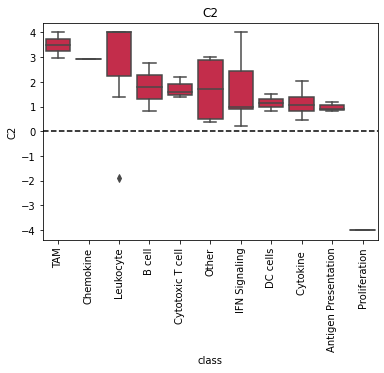

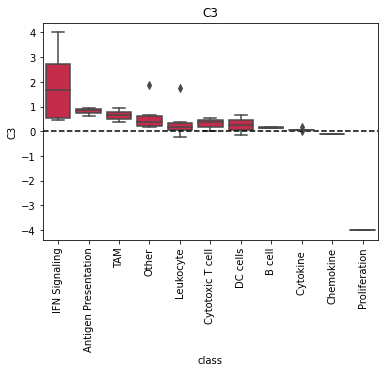

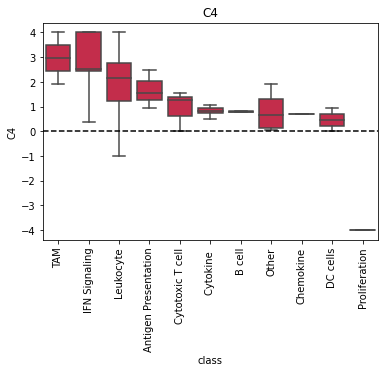

In [115]:
for c in gp_cons_signed_fdr_im.columns:
    sns.boxplot(x='class',
                y=c,
                order=df(gp_cons_signed_fdr_im_annot.groupby('class').mean()).sort_values(by=c, ascending=False).index,
                data=gp_cons_signed_fdr_im_annot,
                color='crimson')
    plt.xticks(rotation=90)
    plt.title(c)
    plt.axhline(y=0., ls='--', c='k')
    plt.show()

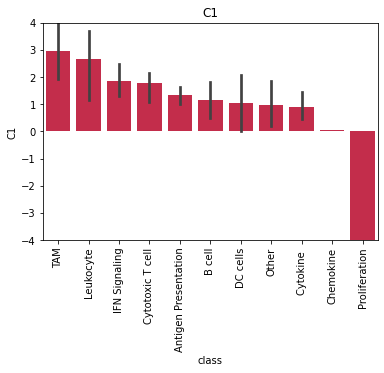

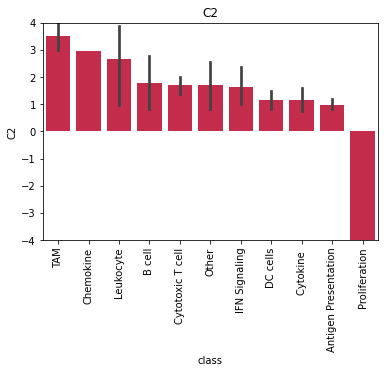

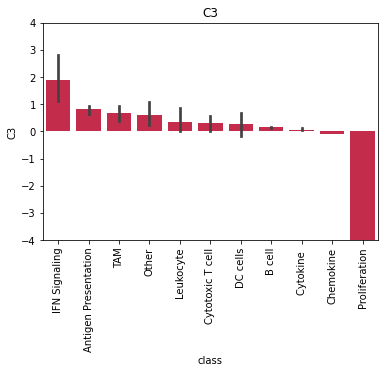

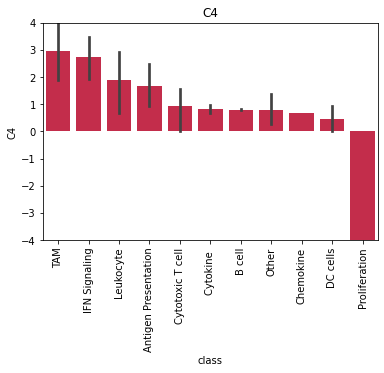

In [88]:
for c in gp_cons_signed_fdr_im.columns:
    sns.barplot(x='class',
                y=c,
                order=df(gp_cons_signed_fdr_im_annot.groupby('class').mean()).sort_values(by=c, ascending=False).index,
                data=gp_cons_signed_fdr_im_annot,
                color='crimson')
    plt.xticks(rotation=90)
    plt.ylim(-4, 4)
    plt.title(c)
    plt.show()

<AxesSubplot:ylabel='class'>

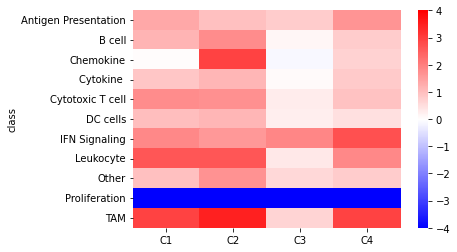

In [68]:
sns.heatmap(gp_cons_signed_fdr_im_annot.groupby('class').mean(), cmap='bwr', vmin=-4, vmax=4)

In [91]:
short_immune = ['HLA-A', 'HLA-B', 'HLA-C', 'B2M', 'TAP1', 'TAP2',
                'CD8A', 'GZMB', 'GZMA', 'IFNGR1',
                'IFNGR2', 'CXCL10', 'IFNA1', 'IFNA2',
                'IFI44', 'IFI44L', 'IFI27', 'PDCD1', 'CD247']

In [93]:
g_cons_immune = g_cons_cluster[g_cons_cluster.index.isin(short_immune)]
g_cons_immune

C1        C2        C3        C4
GZMA    0.286802  0.588517  0.014096  0.323206
CD247   0.565990  0.797847  0.082919  0.243697
IFI27   0.743655  0.480861  0.600332  0.573368
CD8A    0.236041  0.683014  0.117745  0.202327
HLA-C   0.393401  0.580144  0.503317  0.481577
IFNGR1  0.639594  0.270335  0.320066  0.365223
HLA-B   0.408629  0.409091  0.511609  0.482870
IFNGR2 -0.444162  0.062201 -0.011609  0.166128
IFI44   0.197970  0.216507  0.199834  0.175824
IFI44L  0.408629  0.214115  0.401327  0.138979
B2M     0.119289 -0.185407  0.001658  0.056238
HLA-A   0.395939  0.435407  0.332504  0.365869
TAP1    0.423858  0.421053  0.479270  0.605688
CXCL10  0.121827  0.696172  0.238806  0.308985
TAP2   -0.030457  0.614833 -0.108624  0.131222

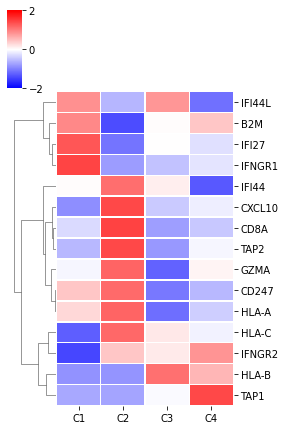

In [103]:
sns.clustermap(g_cons_immune, cmap='bwr', linewidth=.2,
               col_cluster=False, figsize=(4, 6),
               method='ward', z_score=0, vmin=-2, vmax=2)

In [110]:
g_cons_super_immune = g_cons_super.rank()[g_cons_super.index.isin(short_immune)]

In [111]:
g_cons_super_immune

super_C1  super_C2
GZMA      8308.5    6557.0
CD247    10079.5    6299.5
IFI27     9095.0   10026.0
CD8A      8830.0    6160.0
HLA-C     8623.5    9755.0
IFNGR1    7134.0    8762.5
HLA-B     7380.5    9767.0
IFNGR2    2922.5    4831.5
IFI44     5374.0    6530.0
IFI44L    6027.5    7598.5
B2M       3012.5    3970.5
HLA-A     7522.5    8815.0
TAP1      7511.5    9945.0
CXCL10    8535.0    7943.5
TAP2      7371.0    3869.0

# Genes from the GO sets

In [113]:
ec_hind_cluster

cluster               cmap_name  \
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10      C4           BRD-K92317137   
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10      C4            narciclasine   
CPC006_RMUGS_6H:H17                            C2                 BI-2536   
ASG003_A549_24H:K19                            C4           BRD-K63750851   
DPK.CP001_A549_24H:BRD-A12230535:10            C4                nutlin-3   
...                                           ...                     ...   
REP.A022_HELA_24H:K19                          C4                MLN-4924   
REP.B008_HELA_24H:O13                          C4                   SN-38   
REP.B005_HELA_24H:G19                          C4                 TAS-103   
REP.A010_HELA_24H:P10                          C4  fluocinolone-acetonide   
REP.B001_HELA_24H:P03                          C2                amikacin   

                                           shift_ability    CXCL10  \
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10       0.801968 -0.952700   
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10       0.719976  1.381000   
CPC006_RMUGS_6H:H17                             0.705704  0.249750   
ASG003_A549_24H:K19                             1.039512 -0.509247   
DPK.CP001_A549_24H:BRD-A12230535:10             0.999257  0.956595   
...                                                  ...       ...   
REP.A022_HELA_24H:K19                           0.707637  0.325247   
REP.B008_HELA_24H:O13                           0.705767  1.932700   
REP.B005_HELA_24H:G19                           0.704492  3.083677   
REP.A010_HELA_24H:P10                           0.704172  0.310154   
REP.B001_HELA_24H:P03                           0.704060  1.428591   

                                                               moa  
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10            Not available  
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10     LIM kinase activator  
CPC006_RMUGS_6H:H17                                  PLK inhibitor  
ASG003_A549_24H:K19                                  Not available  
DPK.CP001_A549_24H:BRD-A12230535:10                  MDM inhibitor  
...                                                            ...  
REP.A022_HELA_24H:K19                                Not available  
REP.B008_HELA_24H:O13                      Topoisomerase inhibitor  
REP.B005_HELA_24H:G19                      Topoisomerase inhibitor  
REP.A010_HELA_24H:P10                       Corticosteroid agonist  
REP.B001_HELA_24H:P03                                Not available  

[3983 rows x 5 columns]

In [114]:
reg_immune = []
with open('/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/GSEA/gene_sets/GOBP_REGULATION_OF_IMMUNE_RESPONSE.v2022.1.Hs.gmt', 'r') as f:
    for lines in f:
        lines = lines.rstrip().split('\t')
        reg_immune.extend(lines[2:])

In [116]:
ifng_immune = []
with open('/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/GSEA/gene_sets/GOBP_INTERFERON_GAMMA_MEDIATED_SIGNALING_PATHWAY.v2022.1.Hs.gmt', 'r') as f:
    for lines in f:
        lines = lines.rstrip().split('\t')
        ifng_immune.extend(lines[2:])

In [117]:
ifn1_immune = []
with open('/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/GSEA/gene_sets/GOBP_RESPONSE_TO_TYPE_I_INTERFERON.v2022.1.Hs.gmt', 'r') as f:
    for lines in f:
        lines = lines.rstrip().split('\t')
        ifn1_immune.extend(lines[2:])

In [118]:
set(reg_immune) & set(ifn1_immune)

{'ADAR',
 'CACTIN',
 'CDC37',
 'CNOT7',
 'DCST1',
 'FADD',
 'IFNA2',
 'IFNB1',
 'IFNK',
 'IKBKE',
 'IRAK1',
 'IRF3',
 'IRF7',
 'ISG15',
 'LSM14A',
 'MAVS',
 'METTL3',
 'MIR21',
 'MMP12',
 'MUL1',
 'MYD88',
 'NLRC5',
 'OAS1',
 'OAS3',
 'PTPN1',
 'PTPN11',
 'PTPN2',
 'PTPN6',
 'RNF185',
 'SAMHD1',
 'STAT2',
 'STING1',
 'TBK1',
 'TRAF3',
 'TREX1',
 'TRIM41',
 'TRIM56',
 'TRIM6',
 'TTLL12',
 'TYK2',
 'UBE2K',
 'USP18',
 'USP27X',
 'USP29',
 'WNT5A',
 'YTHDF2',
 'YTHDF3',
 'ZBP1'}

In [119]:
set(reg_immune) & set(ifng_immune)

{'ARG1',
 'CDC37',
 'HCK',
 'HPX',
 'IFNG',
 'IRF1',
 'IRGM',
 'JAK2',
 'MED1',
 'NLRC5',
 'NMI',
 'NR1H2',
 'NR1H3',
 'OTOP1',
 'PARP14',
 'PARP9',
 'PPARG',
 'PTPN2',
 'SOCS1',
 'TXK'}

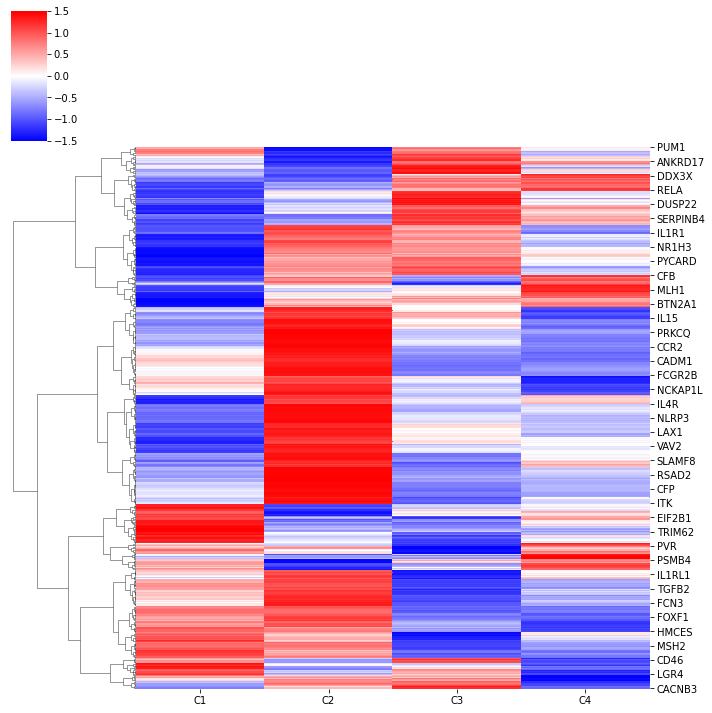

In [130]:
sns.clustermap(g_cons_cluster[g_cons_cluster.index.isin(reg_immune)],
               method='ward', vmin=-1.5, vmax=1.5, col_cluster=False,
               z_score=0, cmap='bwr')

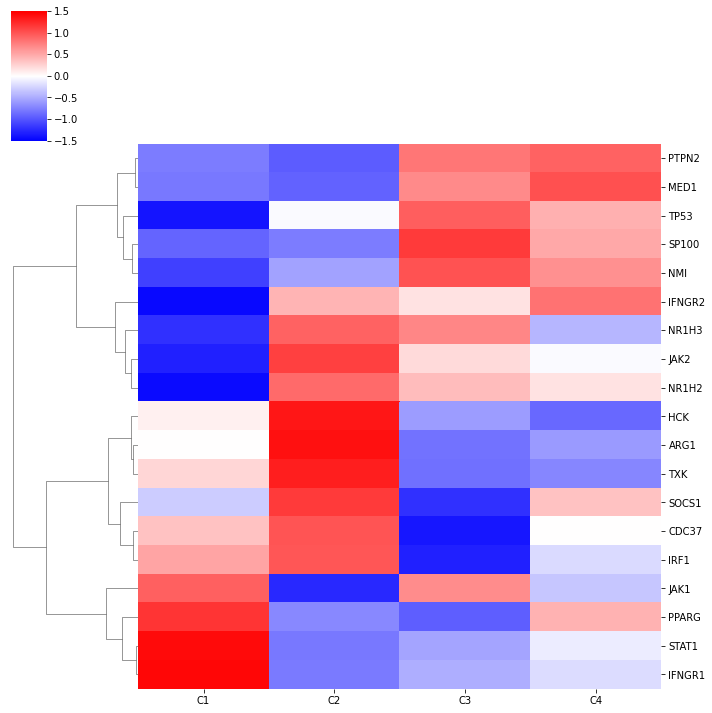

In [129]:
sns.clustermap(g_cons_cluster[g_cons_cluster.index.isin(ifng_immune)],
               method='ward', vmin=-1.5, vmax=1.5, col_cluster=False,
               z_score=0, cmap='bwr')

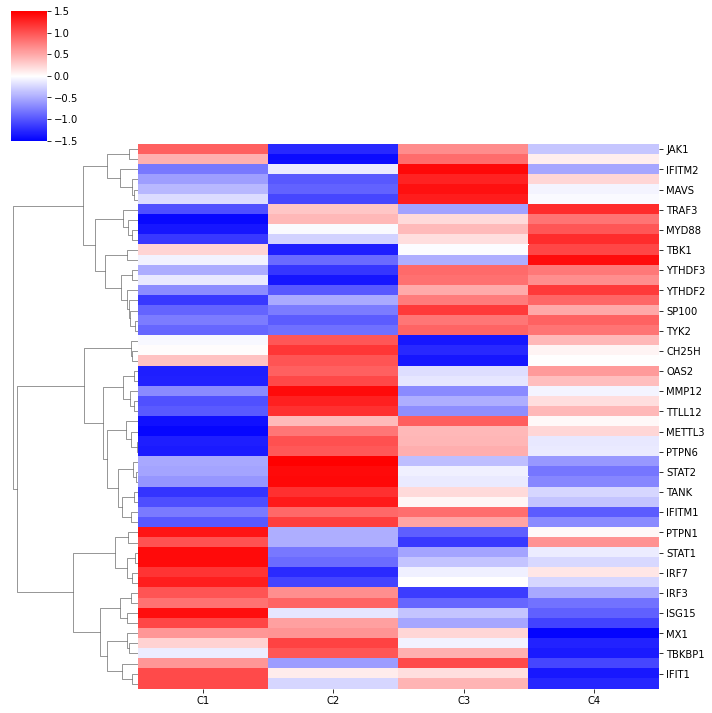

In [131]:
sns.clustermap(g_cons_cluster[g_cons_cluster.index.isin(ifn1_immune)],
               method='ward', vmin=-1.5, vmax=1.5, col_cluster=False,
               z_score=0, cmap='bwr')

In [134]:
for c in g_cons_cluster.columns:
    tmp_result = gp.prerank(df(g_cons_cluster[c]).sort_values(by=c, ascending=False),
                            gene_sets=gsea_home + 'gene_sets/GOBP_INTERFERON_GAMMA_MEDIATED_SIGNALING_PATHWAY.v2022.1.Hs.gmt',
                            processes=16,
                            permutation_num=1000,
                            format='pdf',
                            outdir=panel_home + 'gsea/IFNG_' + c, seed=0, min_size=5, max_size=200)

In [135]:
for c in g_cons_cluster.columns:
    tmp_result = gp.prerank(df(g_cons_cluster[c]).sort_values(by=c, ascending=False),
                            gene_sets=gsea_home + 'gene_sets/GOBP_RESPONSE_TO_TYPE_I_INTERFERON.v2022.1.Hs.gmt',
                            processes=16,
                            permutation_num=1000,
                            format='pdf',
                            outdir=panel_home + 'gsea/IFN1_' + c, seed=0, min_size=5, max_size=200)

In [139]:
for c in g_cons_cluster.columns:
    tmp_result = gp.prerank(df(g_cons_cluster[c]).sort_values(by=c, ascending=False),
                            gene_sets=gsea_home + 'gene_sets/GOBP_REGULATION_OF_IMMUNE_RESPONSE.v2022.1.Hs.gmt',
                            processes=16,
                            permutation_num=1000,
                            format='pdf',
                            outdir=panel_home + 'gsea/regulation_immune_' + c, seed=0, min_size=5, max_size=1000)

In [140]:
for c in g_cons_super.columns:
    tmp_result = gp.prerank(df(g_cons_super[c]).sort_values(by=c, ascending=False),
                            gene_sets=gsea_home + 'gene_sets/GOBP_REGULATION_OF_IMMUNE_RESPONSE.v2022.1.Hs.gmt',
                            processes=16,
                            permutation_num=1000,
                            format='pdf',
                            outdir=panel_home + 'gsea/regulation_immune_' + c, seed=0, min_size=5, max_size=1000)

In [144]:
ec_bing_short_immune = ec_bing_matrix_hi[ec_bing_matrix_hi.index.isin(short_immune)]

In [145]:
ec_bing_short_immune

CPC006_EFO27_6H:BRD-K92317137-001-04-0:10  \
GZMA                                      1.45315   
CD247                                     1.40695   
IFI27                                     1.35690   
CD8A                                      1.30095   
HLA-C                                     0.97465   
IFNGR1                                    0.94125   
HLA-B                                    -0.05875   
IFNGR2                                   -0.09975   
IFI44                                    -0.12535   
IFI44L                                   -0.21595   
B2M                                      -0.46145   
HLA-A                                    -0.68045   
TAP1                                     -0.86135   
CXCL10                                   -0.95270   
TAP2                                     -3.35140   

        CPC006_EFO27_6H:BRD-K06792661-001-01-9:10  CPC006_RMUGS_6H:H17  \
GZMA                                      0.16070              1.63570   
CD247                                     2.69335              0.27625   
IFI27                                     1.52415              0.63470   
CD8A                                      0.69480              1.88260   
HLA-C                                     0.27105              0.87745   
IFNGR1                                    0.18290              0.53865   
HLA-B                                     1.83920              1.03805   
IFNGR2                                   -0.19230             -0.45850   
IFI44                                     0.71870              0.42590   
IFI44L                                   -0.53420              0.04045   
B2M                                       1.87305             -0.60765   
HLA-A                                     2.40970              0.39425   
TAP1                                     -0.21525              0.93760   
CXCL10                                    1.38100              0.24975   
TAP2                                      0.82045             -0.49085   

        ASG003_A549_24H:K19  DPK.CP001_A549_24H:BRD-A12230535:10  \
GZMA               3.165747                             1.473881   
CD247              2.292495                            -0.043575   
IFI27              1.740852                             0.718312   
CD8A               1.336546                             0.017942   
HLA-C              2.084291                             0.975762   
IFNGR1             1.021704                             1.580228   
HLA-B              1.510685                             1.071045   
IFNGR2            -0.136710                            -0.074180   
IFI44             -0.371696                             0.109322   
IFI44L            -1.181487                             0.715220   
B2M                0.187507                            -0.407274   
HLA-A              0.249990                            -0.081842   
TAP1               2.503947                             3.623080   
CXCL10            -0.509247                             0.956595   
TAP2               0.103321                             0.147036   

        HOG002_A549_24H:BRD-A68009927-003-02-9:0.3704  REP.A018_A549_24H:J19  \
GZMA                                         0.769816                1.70520   
CD247                                        1.309162                0.52975   
IFI27                                        0.815820               -0.25700   
CD8A                                         0.367355                1.12985   
HLA-C                                        1.948919                0.92470   
IFNGR1                                       0.137175                1.68665   
HLA-B                                        1.525964                1.28730   
IFNGR2                                      -0.725247               -0.29395   
IFI44                                       -0.348062               -0.90460   
IFI44L                                      -0.939762               -0.41125   
B2M  

In [148]:
ec_hind_cluster['color'] = ec_hind_cluster['cluster'].map(color_cluster)

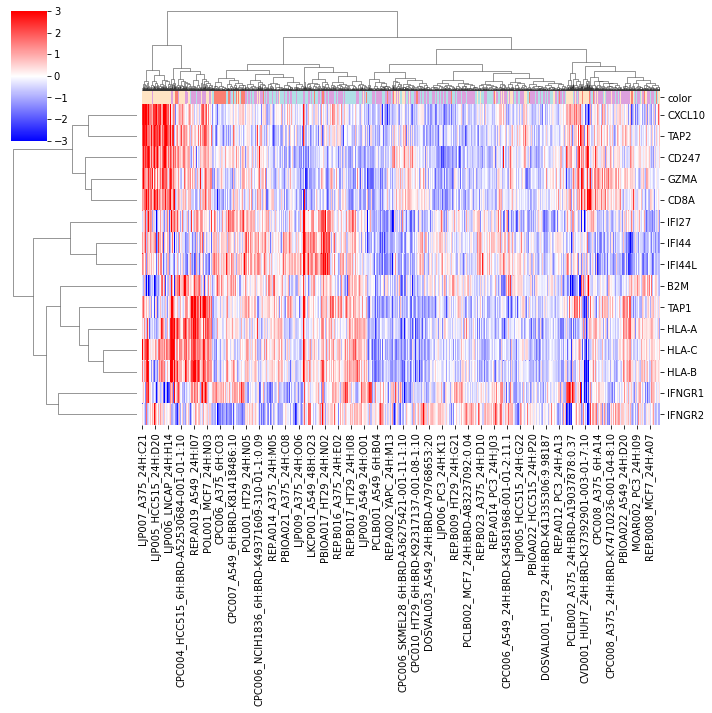

In [156]:
sns.clustermap(ec_bing_short_immune, cmap='bwr', z_score=0,
               col_colors=ec_hind_cluster['color'],
               vmin=-3, vmax=3, method='ward')

In [158]:
short_immune_order = ['HLA-A', 'HLA-B', 'HLA-C', 'TAP1', 'TAP2', 'B2M', 'CD247',
                      'IFI27', 'IFI44', 'IFI44L', 'IFNGR1', 'IFNGR2', 'CXCL10',
                      'CD8A', 'GZMA']

/home/dyang-server/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


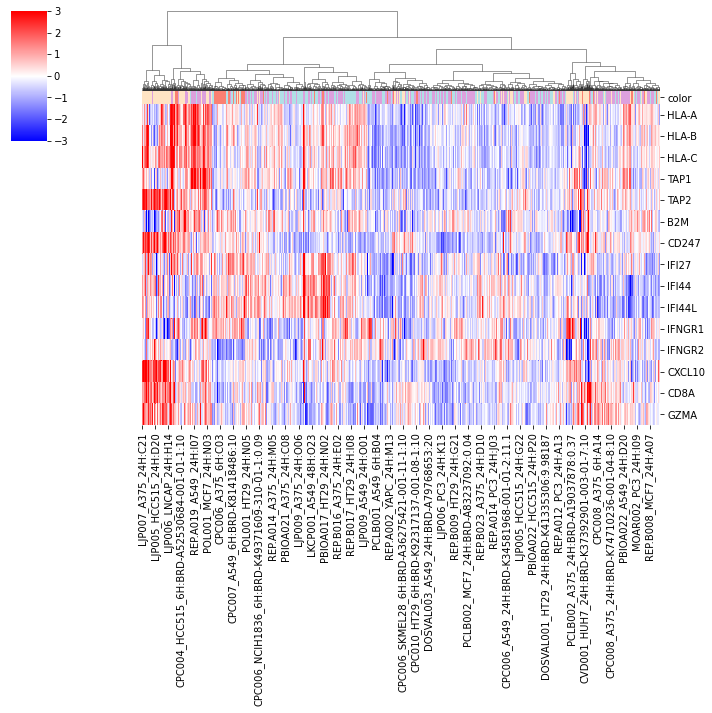

In [160]:
sns.clustermap(ec_bing_short_immune.loc[short_immune_order, :], cmap='bwr', z_score=0,
               col_colors=ec_hind_cluster['color'],row_cluster=False,
               vmin=-3, vmax=3, method='ward')

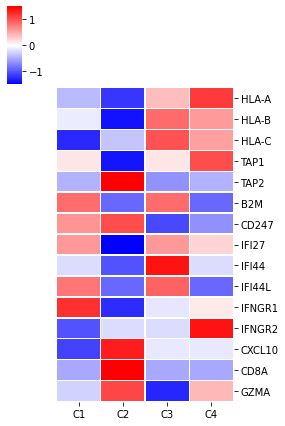

In [175]:
sns.clustermap(g_cons_immune.rank().loc[short_immune_order, :], cmap='bwr', linewidth=.2,
               col_cluster=False, figsize=(4, 6), row_cluster=False,
               method='ward', z_score=0)

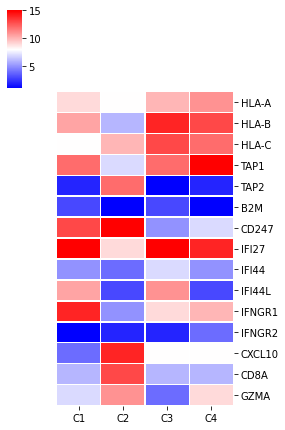

In [180]:
sns.clustermap(g_cons_immune.rank().loc[short_immune_order, :], cmap='bwr', linewidth=.2,
               col_cluster=False, figsize=(4, 6), row_cluster=False,
               method='ward', z_score=None)

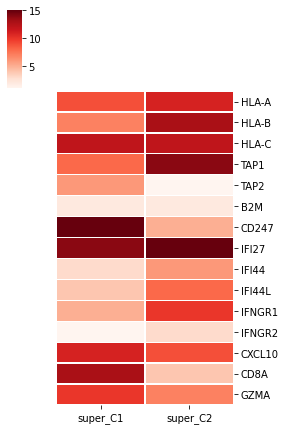

In [166]:
sns.clustermap(g_cons_super_immune.rank().loc[short_immune_order, :], cmap='Reds', linewidth=.2,
               col_cluster=False, figsize=(4, 6), row_cluster=False,
               method='ward')

In [167]:
g_cons_super_immune

super_C1  super_C2
GZMA      8308.5    6557.0
CD247    10079.5    6299.5
IFI27     9095.0   10026.0
CD8A      8830.0    6160.0
HLA-C     8623.5    9755.0
IFNGR1    7134.0    8762.5
HLA-B     7380.5    9767.0
IFNGR2    2922.5    4831.5
IFI44     5374.0    6530.0
IFI44L    6027.5    7598.5
B2M       3012.5    3970.5
HLA-A     7522.5    8815.0
TAP1      7511.5    9945.0
CXCL10    8535.0    7943.5
TAP2      7371.0    3869.0

In [168]:
g_cons_super

super_C1  super_C2
KLHL21   0.034959  0.127134
MMP1     0.718699  0.156920
RGS2     0.352846  0.011987
INSIG1   0.369919  0.053760
HSPA1A   0.125203 -0.156556
...           ...       ...
ACAT2    0.013821 -0.251362
ELAC2   -0.459350 -0.450054
C2CD5   -0.843089 -0.091900
PLK1    -0.845528 -0.883763
SUV39H1 -0.711382 -0.810389

[10174 rows x 2 columns]

In [176]:
# check only HDAC
hdac_sub = ec_bing_matrix_hi[ec_hind_cluster[ec_hind_cluster['cluster'] == 'C1'].index]
hdac_sub_apc = hdac_sub[hdac_sub.index.isin(short_immune)]

In [177]:
hdac_sub_apc

CPC012_A549_24H:BRD-K81418486:10  PCLB001_A549_6H:B04  \
GZMA                             0.83470            -0.236772   
CD247                            0.73870             0.744007   
IFI27                            1.82040             0.403900   
CD8A                            -0.27060            -1.320201   
HLA-C                           -0.58095            -0.605700   
IFNGR1                           0.81520             1.456059   
HLA-B                            0.10170            -0.671879   
IFNGR2                          -1.03945            -0.524815   
IFI44                           -0.26680            -0.054599   
IFI44L                           0.43885            -0.098383   
B2M                              0.70840            -0.755259   
HLA-A                           -0.09290             0.129913   
TAP1                            -0.75495            -0.099665   
CXCL10                          -0.55880             0.119487   
TAP2                            -0.22755             0.040364   

        CPC012_A549_6H:BRD-K81418486:10  CPC007_A549_6H:BRD-K81418486:10  \
GZMA                           0.266089                        -0.397130   
CD247                          1.311930                         1.443260   
IFI27                          0.879740                         2.101245   
CD8A                          -1.000734                         0.457838   
HLA-C                          0.144453                         0.209614   
IFNGR1                         1.780829                         1.815521   
HLA-B                          0.283450                         1.570998   
IFNGR2                        -1.802296                        -2.154741   
IFI44                          0.818116                         1.457500   
IFI44L                         1.953183                         0.992741   
B2M                           -0.296435                         1.318091   
HLA-A                          0.357122                         2.882269   
TAP1                          -0.404143                        -0.126961   
CXCL10                        -0.230817                         0.264172   
TAP2                          -2.189029                        -0.330409   

        CRCGN007_A549_24H:BRD-K81418486:2.22  \
GZMA                                 -0.5157   
CD247                                -0.1223   
IFI27                                 1.4211   
CD8A                                  0.2746   
HLA-C                                 0.7577   
IFNGR1                                1.1586   
HLA-B                                 0.8795   
IFNGR2                               -1.8051   
IFI44                                 1.0945   
IFI44L                                1.3032   
B2M                                   0.0977   
HLA-A                                 0.7506   
TAP1                                  0.1865   
CXCL10                               -1.3167   
TAP2                                 -0.6286   

        CPC014_A549_6H:BRD-A39646320-001-01-3:10  REP.A021_A549_24H:J12  \
GZMA                                     0.21330              -0.492876   
CD247                                    0.66160               0.154415   
IFI27                                    1.15200              -0.240554   
CD8A                                     0.10605               0.078467   
HLA-C                                    0.91060              -0.099053   
IFNGR1                                   0.34740               0.658049   
HLA-B                                    1.00120              -0.215255   
IFNGR2                                  -1.37605              -0.946029   
IFI44                                    0.68735              -0.033739   
IFI44L                                   0.87005               0.049866   
B2M                                      0.70910              -0.137733   
HLA-A                                    2.23165               0.328898   
TAP1  

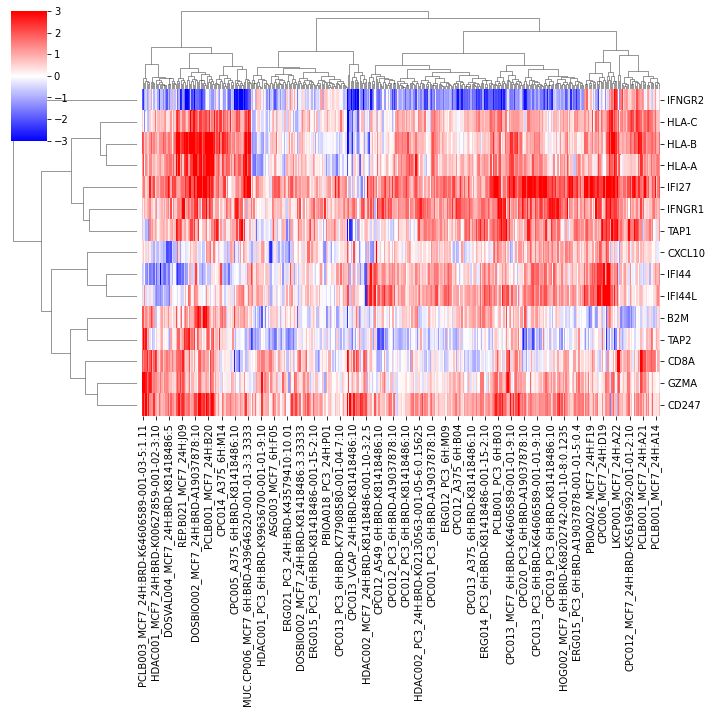

In [179]:
sns.clustermap(hdac_sub_apc, method='ward', vmin=-3, vmax=3, cmap='bwr')

/home/dyang-server/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


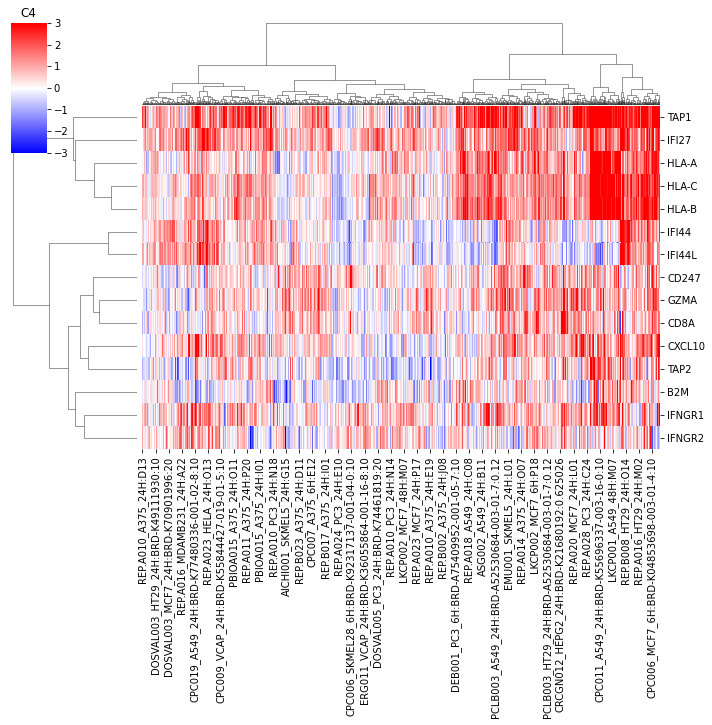

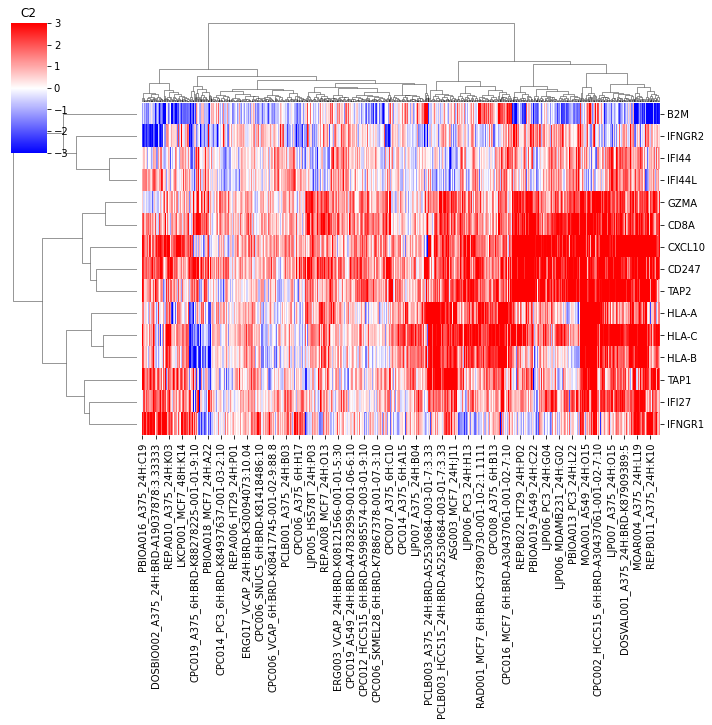

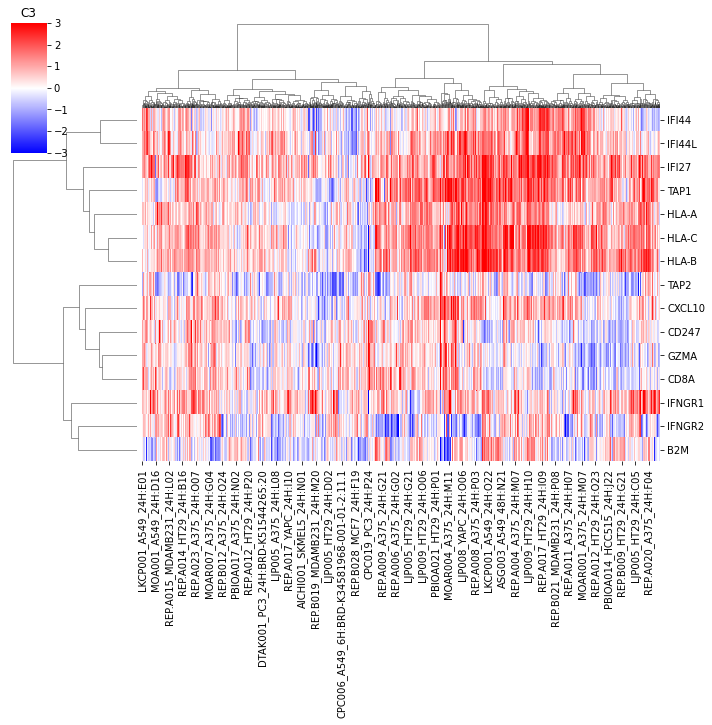

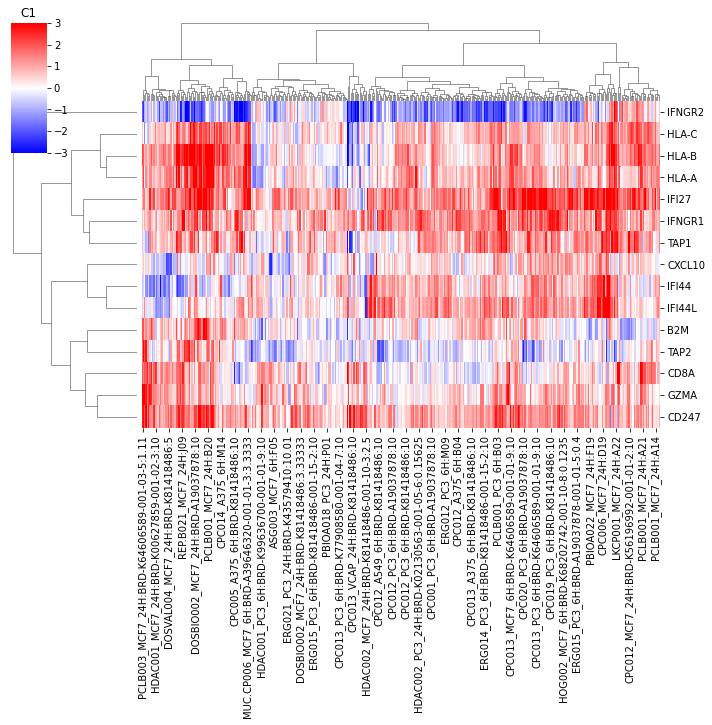

In [181]:
# check each cluster
for c in ec_hind_cluster['cluster'].unique():
    tmp_sub = ec_bing_matrix_hi[ec_hind_cluster[ec_hind_cluster['cluster'] == c].index]
    tmp_sub_apc = tmp_sub[tmp_sub.index.isin(short_immune)]
    sns.clustermap(tmp_sub_apc, method='ward', vmin=-3, vmax=3, cmap='bwr')
    plt.title(c)

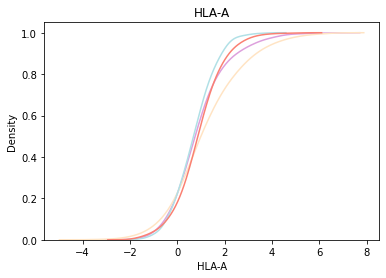

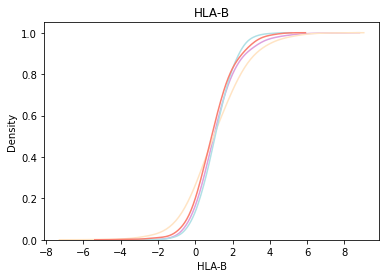

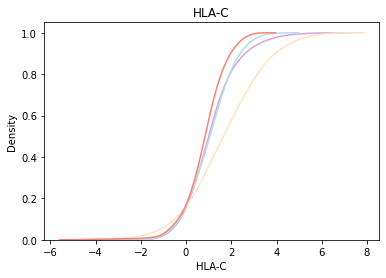

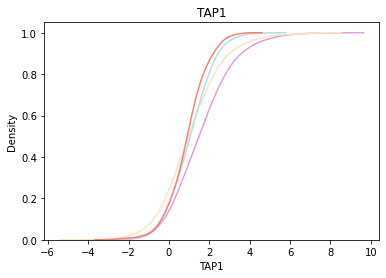

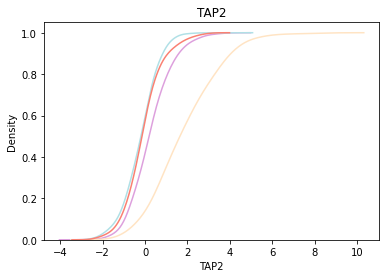

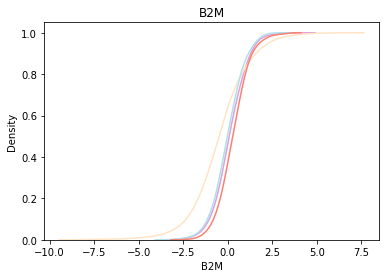

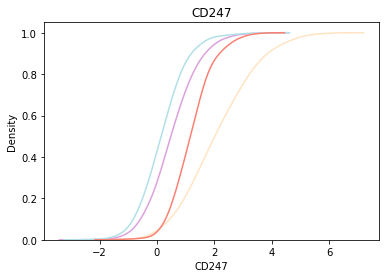

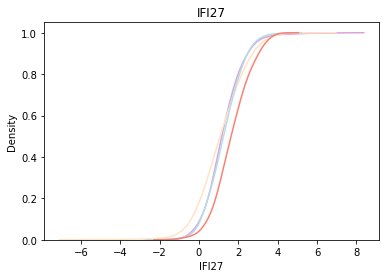

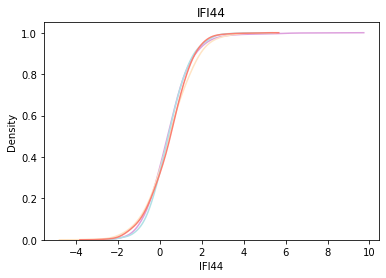

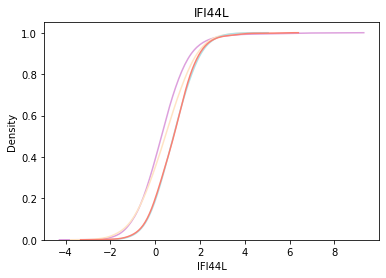

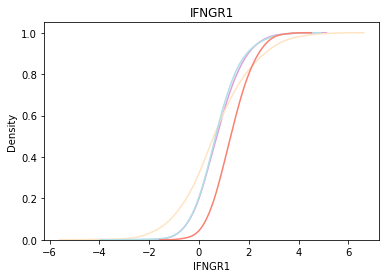

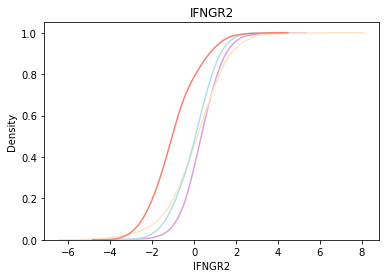

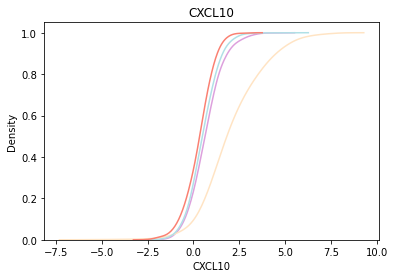

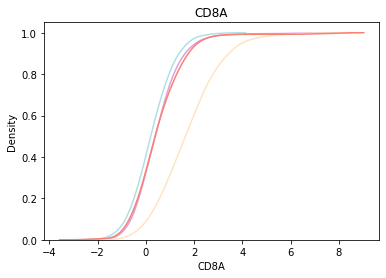

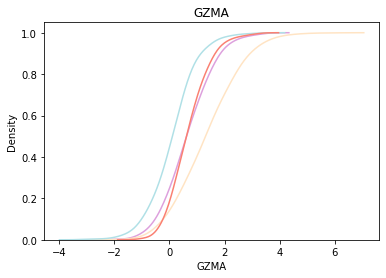

In [189]:
# check each gene
for g in short_immune_order:
    tmp_ec = df(ec_bing_matrix_hi.loc[g, :])
    for c in ec_hind_cluster['cluster'].unique():
        tmp_sub = tmp_ec.loc[ec_hind_cluster[ec_hind_cluster['cluster'] == c].index, :]
        sns.kdeplot(tmp_sub[g], c=color_cluster[c], cumulative=True, label=c)
    plt.title(g)
    plt.show()

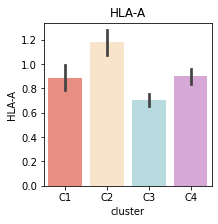

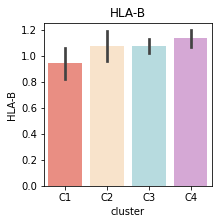

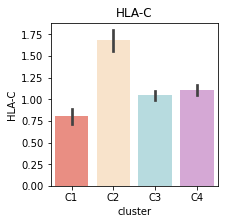

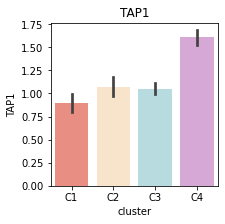

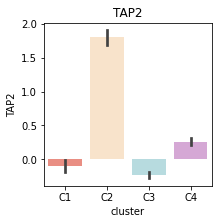

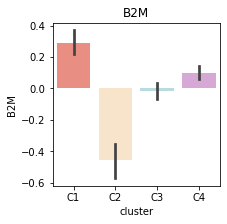

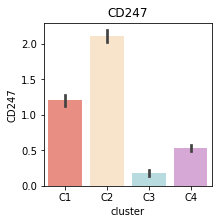

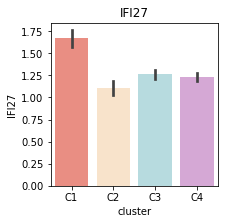

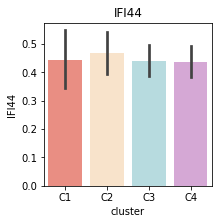

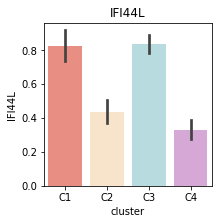

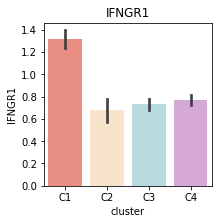

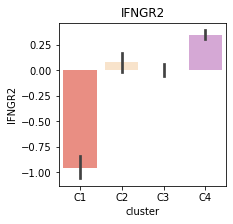

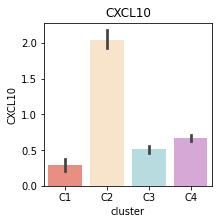

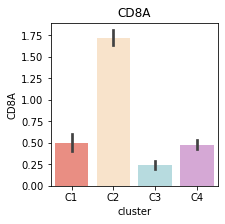

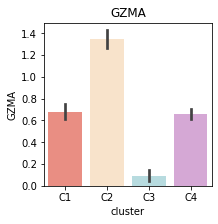

In [193]:
# check each gene
for g in short_immune_order:
    plt.figure(figsize=(3, 3))
    tmp_ec = df(ec_bing_matrix_hi.loc[g, :])
    tmp_ec['cluster'] = ec_hind_cluster['cluster']
    sns.barplot(x='cluster', y=g, data=tmp_ec, palette=color_cluster, order=['C' + str(i + 1) for i in range(4)])
    plt.title(g)
    plt.show()

# Pathway enrichment on all R-to-S

In [117]:
ec_bing_matrix_hi

CPC006_EFO27_6H:BRD-K92317137-001-04-0:10  \
KLHL21                                   10.000000   
MMP1                                      9.341949   
RGS2                                      8.918900   
INSIG1                                    8.578950   
HSPA1A                                    8.239650   
...                                            ...   
ACAT2                                    -6.768500   
ELAC2                                    -6.782250   
C2CD5                                    -7.004500   
PLK1                                     -7.193000   
SUV39H1                                  -7.884750   

         CPC006_EFO27_6H:BRD-K06792661-001-01-9:10  CPC006_RMUGS_6H:H17  \
KLHL21                                     2.88645              3.31375   
MMP1                                      -0.35515              1.23920   
RGS2                                       5.89750              5.59530   
INSIG1                                     2.06455              3.73680   
HSPA1A                                    -0.33205              0.53315   
...                                            ...                  ...   
ACAT2                                     -2.06300              1.57885   
ELAC2                                     -2.71810              1.63950   
C2CD5                                      0.42095             -2.91210   
PLK1                                      -2.47720             -1.61770   
SUV39H1                                   -1.26620             -5.64715   

         ASG003_A549_24H:K19  DPK.CP001_A549_24H:BRD-A12230535:10  \
KLHL21             -1.810632                             0.224005   
MMP1                0.689376                             1.368765   
RGS2                0.052903                             0.486148   
INSIG1             -0.747121                             0.574568   
HSPA1A             -1.707182                            -0.784140   
...                      ...                                  ...   
ACAT2               2.920269                            -0.301646   
ELAC2              -1.472492                            -2.441083   
C2CD5               1.600716                            -1.102817   
PLK1               -4.022735                           -10.000000   
SUV39H1            -1.551958                            -9.992019   

         HOG002_A549_24H:BRD-A68009927-003-02-9:0.3704  REP.A018_A549_24H:J19  \
KLHL21                                        0.760992                1.26095   
MMP1                                          0.772916                0.21135   
RGS2                                         -5.129492                0.96605   
INSIG1                                       -0.999715               -1.27055   
HSPA1A                                        0.630172               -3.60740   
...                                                ...                    ...   
ACAT2                                        -1.440423                0.99725   
ELAC2                                        -1.046757               -4.14380   
C2CD5                                        -2.149980               -2.49395   
PLK1                                         -7.512629              -10.00000   
SUV39H1                                      -7.375328              -10.00000   

         ASG003_A549_24H:L16  REP.A018_A549_24H:J20  PBIOA015_A549_24H:O19  \
KLHL21             -0.736466                1.32105                0.36045   
MMP1               -0.388389                0.20580               -0.23400   
RGS2                0.152337                2.30600               -3.37660   
INSIG1              1.727886               -2.00595                1.38510   
HSPA1A             -0.551486               -0.97395               -0.84455   
...                      ...                    ...                    ...   
ACAT2               0.131630               -4.27925                0.44785   
ELAC2              -1.307251     

In [118]:
# pathway enrichment on pure immune sets
gp_nes_im = df(columns=ec_bing_matrix_hi.columns)
gp_fdr_im = df(columns=ec_bing_matrix_hi.columns)
for c in ec_bing_matrix_hi.columns:
    tmp_result = gp.prerank(df(ec_bing_matrix_hi[c]).sort_values(by=c, ascending=False),
                            gene_sets=gsea_home + 'gene_sets/WolfEtAl_71_Symbols.gmt',
                            processes=16,
                            permutation_num=100,
                            outdir=None, seed=0, min_size=5, max_size=200)
    gp_nes_im[c] = tmp_result.res2d['nes']
    gp_fdr_im[c] = tmp_result.res2d['fdr']

In [120]:
gp_nes_im.to_csv(gsea_home + '3983_immune_nes.csv', sep=',')
gp_fdr_im.to_csv(gsea_home + '3983_immune_fdr.csv', sep=',')

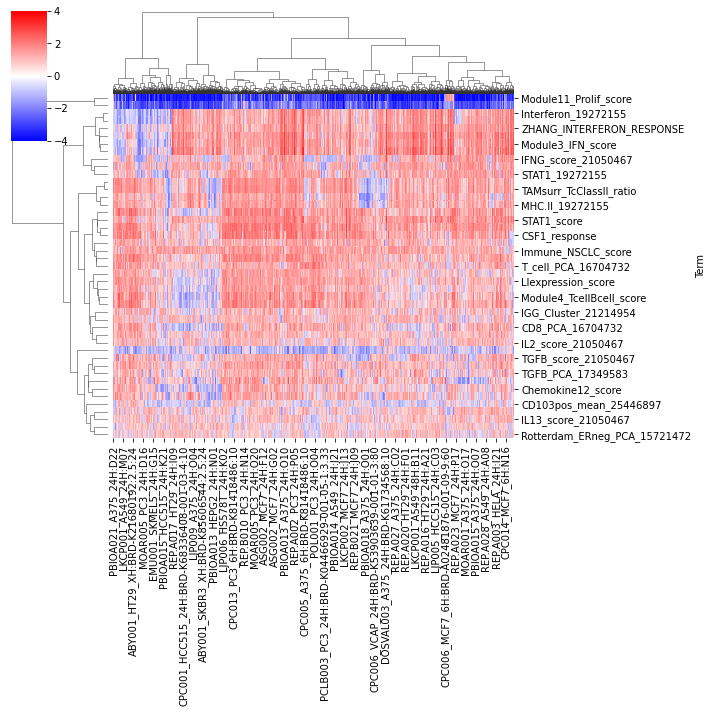

In [124]:
sns.clustermap(gp_nes_im, cmap='bwr', vmin=-4., vmax=4., method='ward')

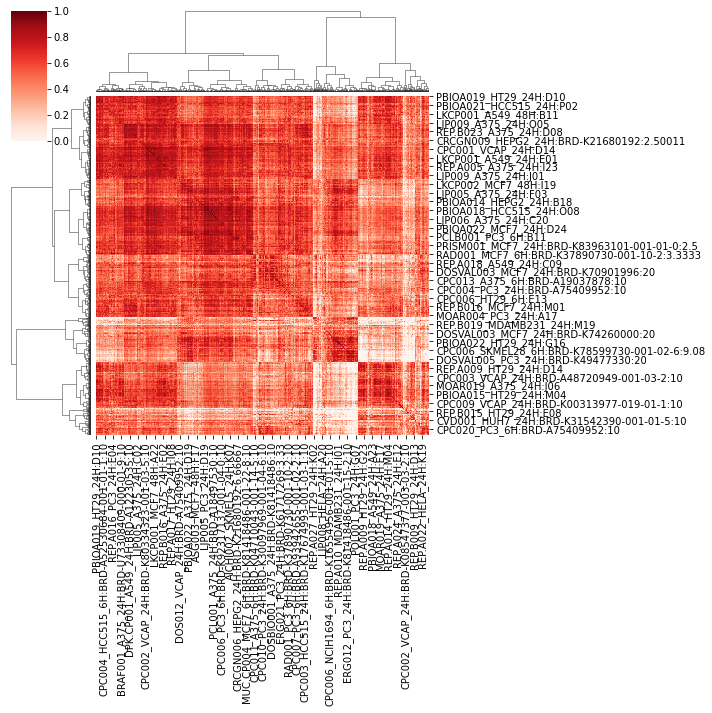

In [126]:
sns.clustermap(gp_nes_im.corr(), cmap='Reds', vmin=0., vmax=1., method='ward')

In [127]:
gp_nes_im_corr = gp_nes_im.corr()

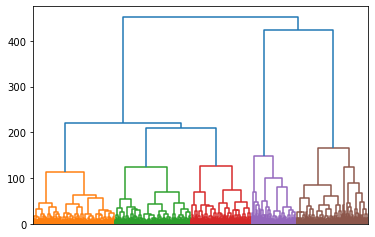

In [130]:
# super cluster
hierarchy.set_link_color_palette(None)
dend_im = dendrogram(linkage(gp_nes_im_corr, method='ward'), 
                     color_threshold=200,
                     no_labels=True,
                     leaf_font_size=1)

In [133]:
cluster_size_im = {}
for c in set(dend_im['color_list']):
    print(c)
    print(len([i for i in dend_im['color_list'] if i == c]) + 1)
    cluster_size_im[c] = len([i for i in dend_im['color_list'] if i == c]) + 1

C5
852
C4
530
C1
975
C2
904
C0
5
C3
722


In [136]:
# assign cluster
ec_im_cluster = df(index=gp_nes_im_corr.index, columns=['cluster'])
tmp_ind = 0
for i in range(5):
    tmp_c = i + 1
    tmp_c_name = 'C' + str(tmp_c)

    for j in range(cluster_size_im[tmp_c_name]):
        ec_im_cluster.at[ec_im_cluster.index[dend_1['leaves'][tmp_ind + j]], 'cluster'] = tmp_c_name
    tmp_ind = tmp_ind + cluster_size_im[tmp_c_name]

ec_im_cluster['cmap_name'] = sig_info['cmap_name']
ec_im_cluster['shift_ability'] = shift_ability['shift_ability']
ec_im_cluster['CXCL10'] = ec_bing_matrix_hi.T['CXCL10']

In [137]:
ec_im_cluster

cluster               cmap_name  \
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10      C5           BRD-K92317137   
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10      C5            narciclasine   
CPC006_RMUGS_6H:H17                            C1                 BI-2536   
ASG003_A549_24H:K19                            C5           BRD-K63750851   
DPK.CP001_A549_24H:BRD-A12230535:10            C3                nutlin-3   
...                                           ...                     ...   
REP.A022_HELA_24H:K19                          C4                MLN-4924   
REP.B008_HELA_24H:O13                          C5                   SN-38   
REP.B005_HELA_24H:G19                          C5                 TAS-103   
REP.A010_HELA_24H:P10                          C5  fluocinolone-acetonide   
REP.B001_HELA_24H:P03                          C1                amikacin   

                                           shift_ability    CXCL10  
CPC006_EFO27_6H:BRD-K92317137-001-04-0:10       0.801968 -0.952700  
CPC006_EFO27_6H:BRD-K06792661-001-01-9:10       0.719976  1.381000  
CPC006_RMUGS_6H:H17                             0.705704  0.249750  
ASG003_A549_24H:K19                             1.039512 -0.509247  
DPK.CP001_A549_24H:BRD-A12230535:10             0.999257  0.956595  
...                                                  ...       ...  
REP.A022_HELA_24H:K19                           0.707637  0.325247  
REP.B008_HELA_24H:O13                           0.705767  1.932700  
REP.B005_HELA_24H:G19                           0.704492  3.083677  
REP.A010_HELA_24H:P10                           0.704172  0.310154  
REP.B001_HELA_24H:P03                           0.704060  1.428591  

[3983 rows x 4 columns]

<AxesSubplot:xlabel='cluster', ylabel='shift_ability'>

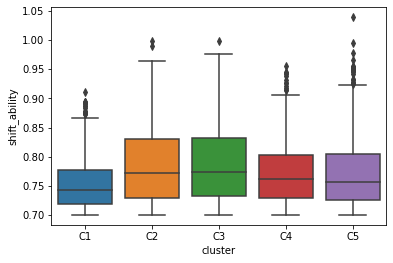

In [143]:
sns.boxplot(x='cluster', y='shift_ability', order=['C' + str(i + 1) for i in range(5)], data=ec_im_cluster)

<AxesSubplot:xlabel='cluster', ylabel='CXCL10'>

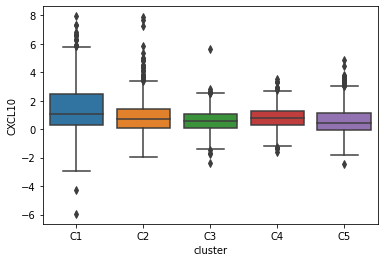

In [144]:
sns.boxplot(x='cluster', y='CXCL10', order=['C' + str(i + 1) for i in range(5)], data=ec_im_cluster)

(36, 1)


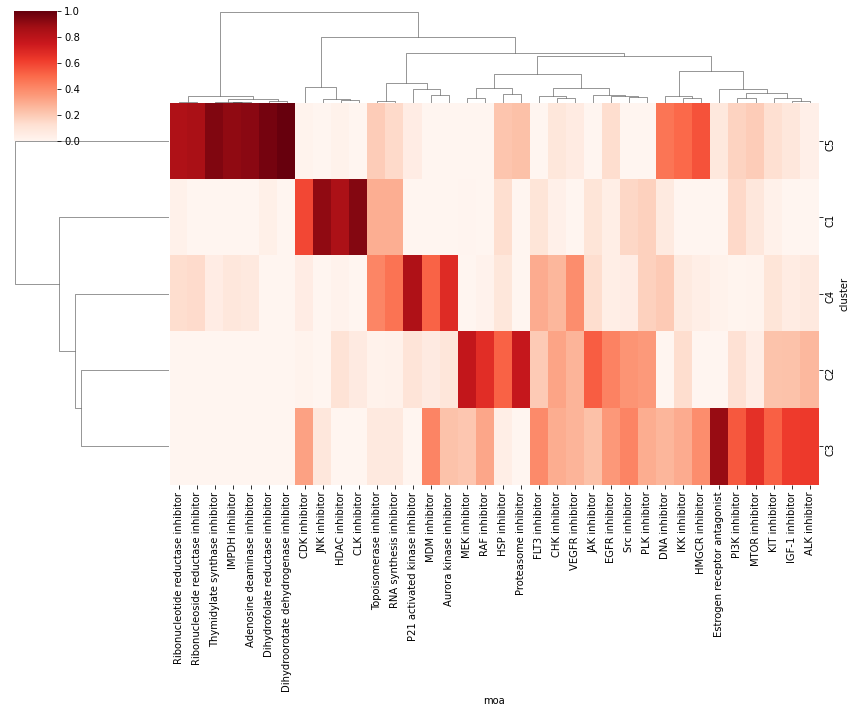

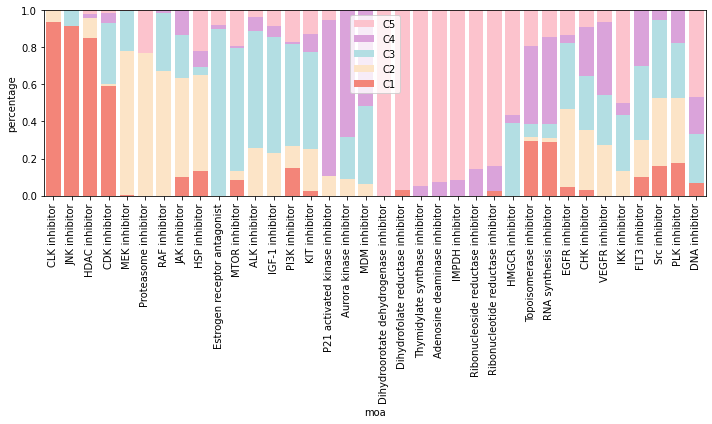

In [151]:
ec_im_cluster['moa'] = 'Not available'
for s in ec_im_cluster.index:
    ec_im_cluster.at[s, 'moa'] = compound_info.loc[ec_im_cluster.loc[s, 'cmap_name'], 'moa']
ec_im_cluster['moa'] = ec_hind_cluster['moa'].fillna('Not available')

cluster_moa = pd.crosstab(ec_im_cluster['cluster'], ec_im_cluster['moa'])

# exlude moa with too few entries
moa_count = df(ec_im_cluster['moa'].value_counts())
moa_count_10 = moa_count[moa_count['moa'] >= 10]
moa_count_10 = moa_count_10.drop(index='Not available')
print(moa_count_10.shape)

cluster_moa_selected = cluster_moa[moa_count_10.index]

cluster_moa_se_percent = cluster_moa_selected / cluster_moa_selected.sum(axis=0)
sns.clustermap(cluster_moa_se_percent, figsize=(12, 10),
               cmap='Reds', method='ward', vmin=0, vmax=1)

# assign cluster color
color_cluster = {'C1': 'salmon',
                 'C2': 'bisque',
                 'C3': 'powderblue',
                 'C4': 'plum',
                 'C5': 'pink'}
# arrange
cl_arrg = []
for c in cluster_moa_se_percent.index:
    tmp_c = df(cluster_moa_se_percent.loc[c, :])
    tmp_c = tmp_c[tmp_c[c] > .5].sort_values(by=c, ascending=False).index
    for i in tmp_c:
        if i not in cl_arrg:
            cl_arrg.append(i)

# add the rest
for i in cluster_moa_se_percent.columns:
    if i not in cl_arrg:
        cl_arrg.append(i)

# visualize by stack bars
tmp_sum = 0
plt.figure(figsize=(10, 6))
stacked_percent = cluster_moa_se_percent.copy().T
for c in ['C' + str(i + 1) for i in range(5)]:
    tmp_sum = tmp_sum +  cluster_moa_se_percent.T[c]
    stacked_percent[c] = tmp_sum
for c in ['C' + str(5 - i) for i in range(5)]:
    sns.barplot(x=stacked_percent.index, y=stacked_percent[c], order=cl_arrg,
                color=color_cluster[c], label=c, saturation=0.9)
plt.xticks(rotation=90)
plt.ylabel('percentage')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'moa_by_cluster_shift_0.7_imspecific.pdf', transparent=True)
fig.savefig(panel_home + 'moa_by_cluster_shift_0.7_imspecific.png', dpi=300, transparent=True)

In [163]:
gp_nes_im_with_cluster = gp_nes_im.copy().T


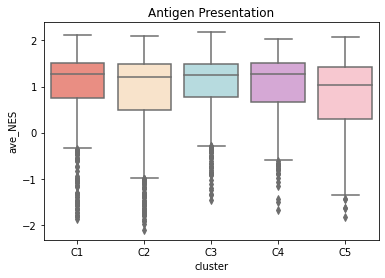

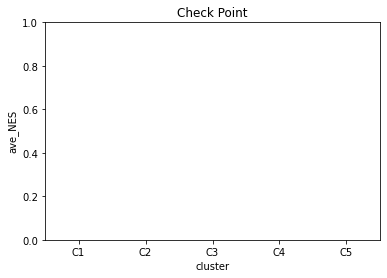

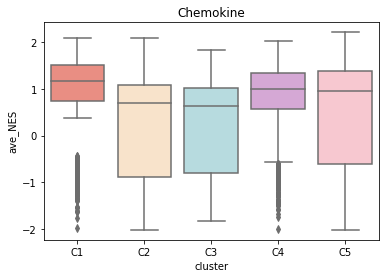

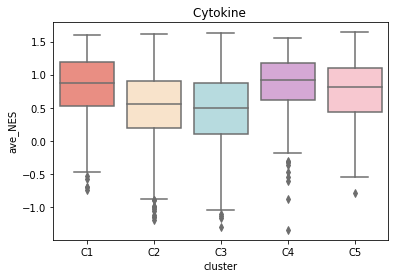

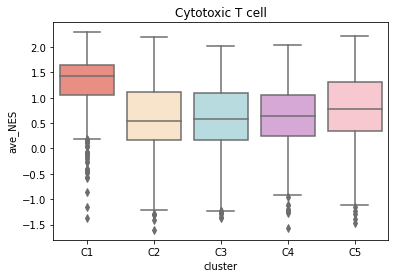

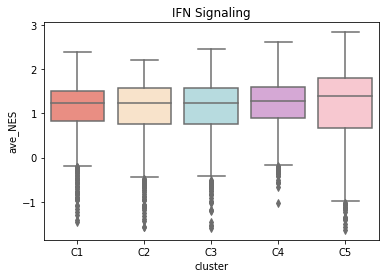

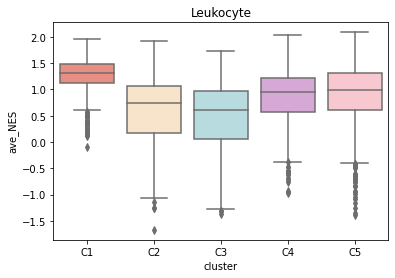

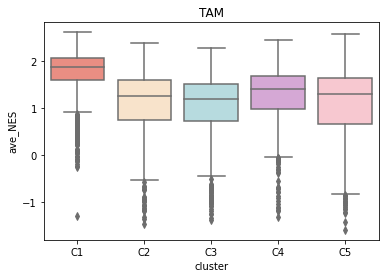

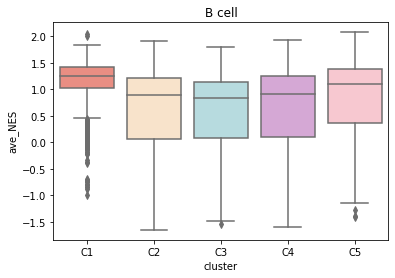

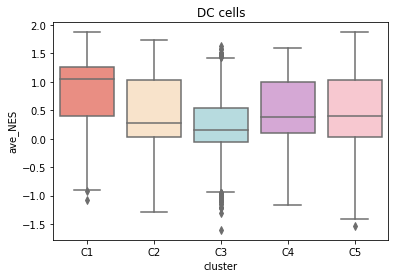

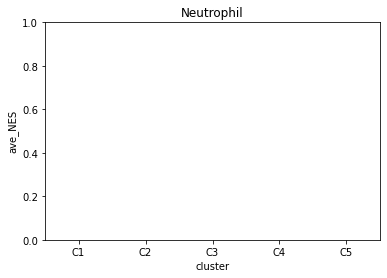

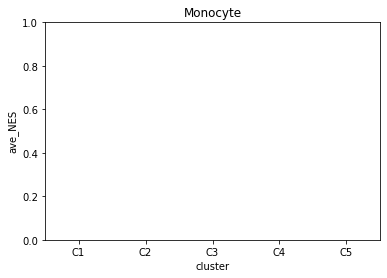

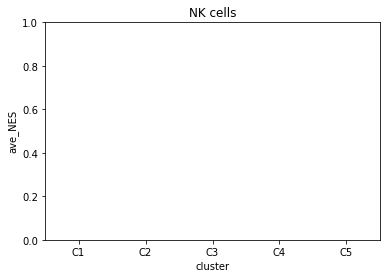

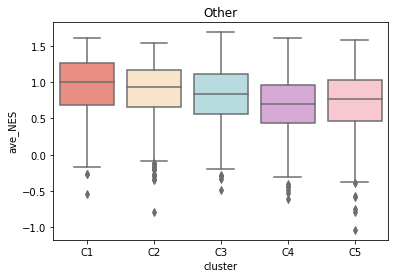

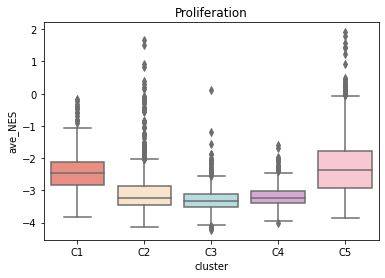

In [171]:
# immune response by cluster
for c in immune_class['class'].unique():
    tmp_c = immune_class[immune_class['class'] == c].index
    sub_nes = df(gp_nes_im_with_cluster.T[gp_nes_im_with_cluster.columns.isin(tmp_c)].T.mean(axis=1)).rename(columns={0: 'ave_NES'})
    sub_nes['cluster'] = ec_im_cluster['cluster']
    sns.boxplot(x='cluster', y='ave_NES',
                order=['C' + str(i + 1) for i in range(5)], data=sub_nes, palette=color_cluster)
    
    plt.title(c)
    plt.show()